In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# matplot libs sexy colors
# skyblue and darkblue and midnightblue
# darkgreen
# darkcyan and teal
# darkviolet and indigo
# darkorange and orangered
# 

# GWAS AD data (Rosmap)

## 1. Obtaining dictionary of AD GWAS associated genes and the variant names

In [ ]:
# I don't have these files anymore on the server
# But they are available on the mac

import os
import pandas as pd
import pickle

# Directory containing the files
directory = './gwas_genes_dict/'

# Initialize an empty dictionary to store the gene to variants mapping
gene_variants_dict = {}

# Iterate through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory, filename)
        # Read the file into a DataFrame
        df = pd.read_csv(filepath, sep='\t')
        
        # Iterate through each row in the DataFrame
        for index, row in df.iterrows():
            gene_id = row['Gene stable ID']
            variant_name = row['Variant name']
            
            # Add the variant to the list of variants for the gene in the dictionary
            if gene_id not in gene_variants_dict:
                gene_variants_dict[gene_id] = []
            gene_variants_dict[gene_id].append(variant_name)

# Save the dictionary to a pickle file
output_pickle_file = 'gene_variants_dict_AD.pkl'
# with open(output_pickle_file, 'wb') as f:
#     pickle.dump(gene_variants_dict, f)

print(f"Dictionary saved to {output_pickle_file}")


Dictionary saved to gene_variants_dict_AD.pkl


In [ ]:
gene_variants_dict

In [6]:
import pickle
with open('ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'wb') as f:
    pickle.dump(gene_variants_dict, f)

NameError: name 'gene_variants_dict' is not defined

In [12]:
# Calculate the number of keys in the dictionary
num_keys = len(gene_variants_dict)
print(f"Number of keys (gene IDs) in the dictionary: {num_keys}")

# Calculate the mean number of values (variants) per key in the dictionary
if num_keys > 0:
    mean_values = sum(len(variants) for variants in gene_variants_dict.values()) / num_keys
    print(f"Average number of variants per gene: {mean_values:.2f}")
else:
    print("The dictionary is empty.")

Number of keys (gene IDs) in the dictionary: 113
Average number of variants per gene: 46106.13


In [8]:
import pickle
with open('ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_variants_dict = pickle.load(f)

In [9]:
# Calculate the number of keys in the dictionary
num_keys = len(gene_variants_dict)
print(f"Number of keys (gene IDs) in the dictionary: {num_keys}")

# Calculate the mean number of values (variants) per key in the dictionary
if num_keys > 0:
    mean_values = sum(len(variants) for variants in gene_variants_dict.values()) / num_keys
    print(f"Average number of variants per gene: {mean_values:.2f}")
else:
    print("The dictionary is empty.")

Number of keys (gene IDs) in the dictionary: 113
Average number of variants per gene: 215.45


In [ ]:
# Filtering the dict to reduce number of snps

In [ ]:
# How many snps are the same as phenotype associated

import pickle

# Load the SNP list from the text file
snp_list_path = './all_snps_list_phenotype_associated.txt'
with open(snp_list_path, 'r') as file:
    snp_set = set(file.read().splitlines())

# Count how many SNPs in the dictionary are in the SNP list
matching_snps_count = 0
total_snps_count = 0

for variants in gene_variants_dict.values():
    for snp in variants:
        total_snps_count += 1
        if snp in snp_set:
            matching_snps_count += 1

print(f"Total SNPs in dictionary: {total_snps_count}")
print(f"Matching SNPs: {matching_snps_count}")
print(f"Percentage of Matching SNPs: {(matching_snps_count / total_snps_count * 100):.2f}%")


Total SNPs in dictionary: 5209993
Matching SNPs: 24346
Percentage of Matching SNPs: 0.47%


In [13]:
# How many snps are the same as phenotype associated

import pickle

# Load the SNP list from the text file
snp_list_path = './ad_shap_gwas/snps_list/all_snps_list_clinically_associated.txt'
with open(snp_list_path, 'r') as file:
    snp_set = set(file.read().splitlines())

# Count how many SNPs in the dictionary are in the SNP list
matching_snps_count = 0
total_snps_count = 0

for variants in gene_variants_dict.values():
    for snp in variants:
        total_snps_count += 1
        if snp in snp_set:
            matching_snps_count += 1

print(f"Total SNPs in dictionary: {total_snps_count}")
print(f"Matching SNPs: {matching_snps_count}")
print(f"Percentage of Matching SNPs: {(matching_snps_count / total_snps_count * 100):.2f}%")


Total SNPs in dictionary: 5209993
Matching SNPs: 1928
Percentage of Matching SNPs: 0.04%


In [14]:
import pickle

# Load the SNP list from the text file
snp_list_path = './ad_shap_gwas/snps_list/all_snps_list_clinically_associated.txt'
with open(snp_list_path, 'r') as file:
    snp_set = set(file.read().splitlines())

# Filter the dictionary to only include SNPs that are in the snp_set
filtered_dict = {}
for gene, variants in gene_variants_dict.items():
    filtered_snps = [snp for snp in variants if snp in snp_set]
    if filtered_snps:  # Only add gene if there are any matching SNPs
        filtered_dict[gene] = filtered_snps

# Save the filtered dictionary to a new pickle file
filtered_pickle_file = 'gene_variants_dict_AD_filt_clinical.pkl'
with open(filtered_pickle_file, 'wb') as f:
    pickle.dump(filtered_dict, f)

print(f"Filtered dictionary saved to {filtered_pickle_file}")


Filtered dictionary saved to gene_variants_dict_AD_filt_clinical.pkl


In [17]:
import pickle
with open('./ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    filtered_dict_phen = pickle.load(f)

In [3]:
import pickle
with open('./ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_clinical.pkl', 'rb') as f:
    filtered_dict = pickle.load(f)

In [12]:
# Calculate the number of keys in the dictionary
num_keys = len(filtered_dict)
print(f"Number of keys (gene IDs) in the dictionary: {num_keys}")

# Calculate the mean number of values (variants) per key in the dictionary
if num_keys > 0:
    mean_values = sum(len(variants) for variants in filtered_dict.values()) / num_keys
    print(f"Average number of variants per gene: {mean_values:.2f}")
else:
    print("The dictionary is empty.")

Number of keys (gene IDs) in the dictionary: 55
Average number of variants per gene: 35.05


In [19]:
# Flatten the lists of values in each dictionary and convert to sets
set1 = set(v for values in filtered_dict_phen.values() for v in values)
set2 = set(v for values in filtered_dict.values() for v in values)

# Calculate the intersection of the two sets
overlap = set1.intersection(set2)

# Print the results
print(f"Number of overlapping values: {len(overlap)}")

Number of overlapping values: 1876


In [16]:
filtered_dict

{'ENSG00000073969': ['rs2146247619', 'rs2146266663'],
 'ENSG00000103510': ['rs748699921',
  'rs2057483219',
  'rs2057538050',
  'rs2057538160',
  'rs2143966219',
  'rs2143966454',
  'rs2143985614'],
 'ENSG00000137845': ['rs483352912',
  'rs483352913',
  'rs483352914',
  'rs483352915',
  'rs483352916'],
 'ENSG00000198087': ['rs142643033',
  'rs267606710',
  'rs368795308',
  'rs545551160',
  'rs776297606',
  'rs1393955970',
  'rs1554181304',
  'rs1769050790'],
 'ENSG00000064687': ['rs189260652',
  'rs115536223',
  'rs538591288',
  'rs551118463',
  'rs547447016',
  'rs149949633',
  'rs200538373',
  'rs770510230',
  'rs779501556',
  'rs761115996',
  'rs777874744',
  'rs2144710743',
  'rs2144883649'],
 'ENSG00000081014': ['rs542940704',
  'rs141278078',
  'rs556450190',
  'rs569567659',
  'rs757657323',
  'rs760021635',
  'rs754944429',
  'rs773929706',
  'rs868844377',
  'rs1313275799',
  'rs1567269045',
  'rs1567230528',
  'rs1555456727',
  'rs1555462184',
  'rs2064899680',
  'rs206380122

## 2. Filtering chr tsv files and obtaining iid-snps matrix

In [ ]:
# TSV files were generated straight from the chr_dosage_gz files
# Script checks which rows in the tsv files are SNPs from the SNP dictionary
# At last, it creates a matrix which rows are rosmap individuals and cols are snps

In [6]:
# Load the gene-variant dictionary from the pickle file
# old dictionary.

import pickle

dict_path = './ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl'
with open(dict_path, 'rb') as f:
    gene_variants_dict = pickle.load(f)

# Collect all SNP IDs from the dictionary into a set for fast lookup
snp_set = set()
for snps in gene_variants_dict.values():
    snp_set.update(snps)

In [7]:
len(snp_set)

24078

In [19]:
df = pd.read_csv('./ad_shap_gwas//dosage_imputed_vcf_files/dosage_gz_files/AMP-AD_ROSMAP_Rush-Broad_AffymetrixGenechip6_Imputed_chr22.tsv', sep=' ', header=None)

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711
0,rs62224609,T,C,1.90811,1.90858,1.90811,1.90904,1.90811,1.90811,1.90904,...,1.90941,1.90941,1.90958,1.90941,1.90959,1.90941,1.90958,1.90959,1.90958,NaN
1,rs11089130,G,C,1.65161,1.65336,1.65161,1.65512,1.65161,1.65161,1.65511,...,1.66232,1.66232,1.66300,1.66232,1.66299,1.66232,1.66300,1.66299,1.66300,NaN
2,rs11089134,A,G,1.64777,1.64953,1.64777,1.65132,1.64777,1.64777,1.65131,...,1.65757,1.65757,1.65825,1.65757,1.65823,1.65757,1.65826,1.65823,1.65825,NaN
3,rs2843213,C,T,1.94153,1.94165,1.94153,1.94179,1.94153,1.94153,1.94179,...,1.94326,1.94326,1.94330,1.94326,1.94330,1.94326,1.94330,1.94330,1.94330,NaN
4,rs2096600,A,C,1.31489,1.31839,1.31489,1.32192,1.31489,1.31489,1.32191,...,1.32288,1.32288,1.32421,1.32288,1.32419,1.32288,1.32422,1.32419,1.32421,NaN


In [ ]:
import os
import pandas as pd
import pickle

# Load the gene-variant dictionary from the pickle file
dict_path = '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_clinical.pkl'
with open(dict_path, 'rb') as f:
    gene_variants_dict = pickle.load(f)

# Collect all SNP IDs from the dictionary into a set for fast lookup
snp_set = set()
for snps in gene_variants_dict.values():
    snp_set.update(snps)

# Directory containing the TSV files
directory = '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/dosage_imputed_vcf_files/dosage_gz_files/'
directory1 = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/dosage_imputed_vcf_files/chr_files_tsv/"

# Loop through all TSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.tsv'):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, sep=' ', header=None)

        # Filter the dataframe to keep only rows where the first column is in snp_set
        filtered_df = df[df[0].isin(snp_set)]

        # Count the rows in the filtered DataFrame
        row_count = filtered_df.shape[0]

        # Create new filename based on the last part of the original filename
        new_filename = filename.split('_')[-1]
        new_filepath = os.path.join(directory1, new_filename)

        # Save the filtered dataframe to a new TSV file
        filtered_df.to_csv(new_filepath, sep='\t', index=False, header=False)

        # Print information about the processing and row count
        print(f"Processed {filename}: {row_count} rows saved to {new_filename}")

print("All files have been processed.")


In [ ]:
import os
import pandas as pd
import pickle
from joblib import Parallel, delayed

def process_file(filename, directory, directory1, snp_set):
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath, sep=' ', header=None)

    # Filter the dataframe to keep only rows where the first column is in snp_set
    filtered_df = df[df[0].isin(snp_set)]

    # Count the rows in the filtered DataFrame
    row_count = filtered_df.shape[0]

    # Create new filename based on the last part of the original filename
    new_filename = filename.split('_')[-1]
    new_filepath = os.path.join(directory1, new_filename)

    # Save the filtered dataframe to a new TSV file
    filtered_df.to_csv(new_filepath, sep='\t', index=False, header=False)

    # Print information about the processing and row count
    return f"Processed {filename}: {row_count} rows saved to {new_filename}"

# Load the gene-variant dictionary from the pickle file
dict_path = '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_clinical.pkl'
with open(dict_path, 'rb') as f:
    gene_variants_dict = pickle.load(f)

# Collect all SNP IDs from the dictionary into a set for fast lookup
snp_set = set()
for snps in gene_variants_dict.values():
    snp_set.update(snps)

# Directory containing the TSV files
directory = '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/dosage_imputed_vcf_files/dosage_gz_files/'
directory1 = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/dosage_imputed_vcf_files/chr_files_tsv/"

# Get all TSV files
tsv_files = [f for f in os.listdir(directory) if f.endswith('.tsv')]

# Execute in parallel using joblib
results = Parallel(n_jobs=8)(delayed(process_file)(filename, directory, directory1, snp_set) for filename in tsv_files)

# Print results
for result in results:
    print(result)

print("All files have been processed.")


In [ ]:
# UNIX command to merge the tsv files into one tsv file (row-wise)
cat /path/to/directory/*.tsv > merged_file.tsv

In [ ]:
# just a check to see how many of the rows in the chr_concatinated can be mapped to my new dictionary (clinic)

In [ ]:
# Add header as the list of individuals to the tsv file
# Filter and keep only ROSMAP individuals
# Transpose the dataframe

In [ ]:
# Step by step

In [ ]:
import pandas as pd

# Load the TSV file without headers
tsv_file_path = '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/dosage_imputed_vcf_files/chr_concatinated.tsv'
df = pd.read_csv(tsv_file_path, sep='\s+', header=None, engine='python')

# Load the individual identifiers
individuals_file_path = '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/dosage_imputed_vcf_files/individuals.csv'
with open(individuals_file_path, 'r') as file:
    # Assuming each line contains one individual identifier
    headers = [line.strip() for line in file.readlines()]




In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710
0,rs72777665,T,A,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,1.28960,1.28864,2.00000,1.28953,2.00000,2.00000,2.00000,2.00000,1.28922,2.00000
1,rs35345466,A,T,0.93633,0.26569,0.03411,0.93413,0.95241,0.96472,0.94774,...,0.93148,0.00000,0.92957,0.00000,0.14522,1.84339,0.91914,1.15320,0.16229,0.16842
2,rs11257183,T,C,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,1.00000
3,rs16914105,C,T,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,2.00000,1.00000,2.00000,2.00000
4,rs7917618,G,A,2.00000,1.99896,1.99931,1.99999,1.99999,1.99907,2.00000,...,1.99911,1.99965,2.00000,2.00000,2.00000,1.99992,1.99649,2.00000,1.99894,1.99820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,rs36137267,T,C,1.02021,1.01901,0.98175,1.01908,1.99010,0.97431,1.97976,...,1.94194,0.03687,0.07033,0.09149,1.05846,1.01997,1.06632,1.85975,1.02561,1.97771
2961,rs6606291,C,T,1.89330,1.88121,1.88121,1.88121,1.88121,1.89330,1.88121,...,1.88489,1.89351,1.88489,1.89351,1.88489,1.88489,1.88484,1.89351,1.89351,1.88489
2962,rs12337435,C,A,1.00350,1.00536,1.99921,0.02163,1.99959,0.02076,1.00962,...,1.01501,1.99907,1.01535,1.99949,1.01626,1.00376,1.99873,1.00267,1.01543,2.00000
2963,rs12343184,T,C,1.00089,1.00113,1.99937,0.01343,1.99959,0.01337,1.00651,...,1.01438,1.99923,1.01441,1.99969,1.01460,1.00085,1.99906,1.00123,1.01452,2.00000


In [ ]:
# Assign the headers to the dataframe
df.columns = ['SNP_ID', "REF", "ALT"] + headers  # Prepend 'SNP_ID' for the first column


In [ ]:
df

,SNP_ID,REF,ALT,ROS10442701,ROS11444465,ROS21112011,ROS20297791,ROS11395417,ROS21174303,ROS10669174,...,MAP50406183,MAP50401426,ROS10263208,MAP50109053,MAP50104396,MAP33006377,MAP50402693,ROS11349821,ROS11099004,MAP29821047
0,rs72777665,T,A,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,1.28960,1.28864,2.00000,1.28953,2.00000,2.00000,2.00000,2.00000,1.28922,2.00000
1,rs35345466,A,T,0.93633,0.26569,0.03411,0.93413,0.95241,0.96472,0.94774,...,0.93148,0.00000,0.92957,0.00000,0.14522,1.84339,0.91914,1.15320,0.16229,0.16842
2,rs11257183,T,C,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,1.00000
3,rs16914105,C,T,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,2.00000,1.00000,2.00000,2.00000
4,rs7917618,G,A,2.00000,1.99896,1.99931,1.99999,1.99999,1.99907,2.00000,...,1.99911,1.99965,2.00000,2.00000,2.00000,1.99992,1.99649,2.00000,1.99894,1.99820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,rs36137267,T,C,1.02021,1.01901,0.98175,1.01908,1.99010,0.97431,1.97976,...,1.94194,0.03687,0.07033,0.09149,1.05846,1.01997,1.06632,1.85975,1.02561,1.97771
2961,rs6606291,C,T,1.89330,1.88121,1.88121,1.88121,1.88121,1.89330,1.88121,...,1.88489,1.89351,1.88489,1.89351,1.88489,1.88489,1.88484,1.89351,1.89351,1.88489
2962,rs12337435,C,A,1.00350,1.00536,1.99921,0.02163,1.99959,0.02076,1.00962,...,1.01501,1.99907,1.01535,1.99949,1.01626,1.00376,1.99873,1.00267,1.01543,2.00000
2963,rs12343184,T,C,1.00089,1.00113,1.99937,0.01343,1.99959,0.01337,1.00651,...,1.01438,1.99923,1.01441,1.99969,1.01460,1.00085,1.99906,1.00123,1.01452,2.00000


In [ ]:
# Function to remove the prefix "ROS" or "MAP" from column names
def remove_prefix(col_name):
    if col_name.startswith("ROS"):
        return col_name[3:]  # Remove the first 3 characters
    elif col_name.startswith("MAP"):
        return col_name[3:]  # Remove the first 3 characters
    else:
        return col_name

# Apply the function to each column name
df.columns = [remove_prefix(col) for col in df.columns]


In [ ]:
df

,SNP_ID,REF,ALT,10442701,11444465,21112011,20297791,11395417,21174303,10669174,...,50406183,50401426,10263208,50109053,50104396,33006377,50402693,11349821,11099004,29821047
0,rs72777665,T,A,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,1.28960,1.28864,2.00000,1.28953,2.00000,2.00000,2.00000,2.00000,1.28922,2.00000
1,rs35345466,A,T,0.93633,0.26569,0.03411,0.93413,0.95241,0.96472,0.94774,...,0.93148,0.00000,0.92957,0.00000,0.14522,1.84339,0.91914,1.15320,0.16229,0.16842
2,rs11257183,T,C,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,1.00000
3,rs16914105,C,T,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,2.00000,1.00000,2.00000,2.00000
4,rs7917618,G,A,2.00000,1.99896,1.99931,1.99999,1.99999,1.99907,2.00000,...,1.99911,1.99965,2.00000,2.00000,2.00000,1.99992,1.99649,2.00000,1.99894,1.99820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,rs36137267,T,C,1.02021,1.01901,0.98175,1.01908,1.99010,0.97431,1.97976,...,1.94194,0.03687,0.07033,0.09149,1.05846,1.01997,1.06632,1.85975,1.02561,1.97771
2961,rs6606291,C,T,1.89330,1.88121,1.88121,1.88121,1.88121,1.89330,1.88121,...,1.88489,1.89351,1.88489,1.89351,1.88489,1.88489,1.88484,1.89351,1.89351,1.88489
2962,rs12337435,C,A,1.00350,1.00536,1.99921,0.02163,1.99959,0.02076,1.00962,...,1.01501,1.99907,1.01535,1.99949,1.01626,1.00376,1.99873,1.00267,1.01543,2.00000
2963,rs12343184,T,C,1.00089,1.00113,1.99937,0.01343,1.99959,0.01337,1.00651,...,1.01438,1.99923,1.01441,1.99969,1.01460,1.00085,1.99906,1.00123,1.01452,2.00000


In [ ]:
# Clinical data for mapping

In [ ]:
ros_clinical = pd.read_csv("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/dosage_imputed_vcf_files/ROSMAP_clinical.csv")
ros_clinical

,projid,Study,msex,educ,race,spanish,apoe_genotype,age_at_visit_max,age_first_ad_dx,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,pmi,braaksc,ceradsc,cogdx,dcfdx_lv,individualID
0,10101589,ROS,1.0,20.0,1.0,2.0,34.0,90+,90+,90+,18.0,5.0,9.916667,4.0,2.0,4.0,4.0,R6939144
1,86767530,MAP,0.0,10.0,1.0,2.0,33.0,90+,90+,90+,18.0,10.0,6.500000,4.0,2.0,4.0,4.0,R3893503
2,9650662,MAP,0.0,15.0,1.0,2.0,23.0,90+,90+,90+,0.0,0.0,3.850000,3.0,2.0,4.0,4.0,R8937093
3,50402855,MAP,0.0,21.0,1.0,2.0,33.0,90+,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,1.0,R7139444
4,20544321,ROS,0.0,16.0,1.0,2.0,23.0,90+,90+,NaN,13.0,14.0,NaN,NaN,NaN,NaN,4.0,R4971237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,22207815,ROS,0.0,18.0,2.0,2.0,23.0,57.653661875427787,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,1.0,R5306025
3580,22207941,ROS,0.0,16.0,2.0,2.0,34.0,56.651608487337441,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,1.0,R6142763
3581,49333806,MAP,0.0,12.0,2.0,2.0,NaN,56.599589322381931,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,1.0,R4468842
3582,59720188,MAP,0.0,13.0,1.0,1.0,NaN,54.622861054072551,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,1.0,R9446033


In [ ]:
# Create a mapping dictionary from projid to individualID
mapping_dict = pd.Series(ros_clinical['individualID'].values, index=ros_clinical['projid']).to_dict()

# Ensure all keys and values in the mapping dictionary are strings
mapping_dict = {str(key): str(value) for key, value in mapping_dict.items()}

# Ensure all column names in df1 are strings
df.columns = df.columns.astype(str)

# Rename the columns of the first DataFrame using the mapping dictionary
df.rename(columns=mapping_dict, inplace=True)

In [ ]:
# Remove the REF and ALT columns
df.drop(columns=['REF', 'ALT'], inplace=True)

In [ ]:
df

,SNP_ID,R3627269,R6655598,R7540069,R5789564,R7047807,R8375980,R4641987,R1801421,R3322663,...,R6835201,R5313591,R5647192,R7914294,R3450006,R3649358,R8075334,R4847810,R4131479,R8093392
0,rs72777665,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,1.28960,1.28864,2.00000,1.28953,2.00000,2.00000,2.00000,2.00000,1.28922,2.00000
1,rs35345466,0.93633,0.26569,0.03411,0.93413,0.95241,0.96472,0.94774,0.00008,0.08625,...,0.93148,0.00000,0.92957,0.00000,0.14522,1.84339,0.91914,1.15320,0.16229,0.16842
2,rs11257183,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000,1.00000,1.00000,...,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,1.00000
3,rs16914105,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,2.00000,1.00000,2.00000,2.00000
4,rs7917618,2.00000,1.99896,1.99931,1.99999,1.99999,1.99907,2.00000,1.99859,1.99950,...,1.99911,1.99965,2.00000,2.00000,2.00000,1.99992,1.99649,2.00000,1.99894,1.99820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,rs36137267,1.02021,1.01901,0.98175,1.01908,1.99010,0.97431,1.97976,1.03732,2.00000,...,1.94194,0.03687,0.07033,0.09149,1.05846,1.01997,1.06632,1.85975,1.02561,1.97771
2961,rs6606291,1.89330,1.88121,1.88121,1.88121,1.88121,1.89330,1.88121,1.88121,1.89318,...,1.88489,1.89351,1.88489,1.89351,1.88489,1.88489,1.88484,1.89351,1.89351,1.88489
2962,rs12337435,1.00350,1.00536,1.99921,0.02163,1.99959,0.02076,1.00962,1.99981,1.01454,...,1.01501,1.99907,1.01535,1.99949,1.01626,1.00376,1.99873,1.00267,1.01543,2.00000
2963,rs12343184,1.00089,1.00113,1.99937,0.01343,1.99959,0.01337,1.00651,1.99981,1.00401,...,1.01438,1.99923,1.01441,1.99969,1.01460,1.00085,1.99906,1.00123,1.01452,2.00000


In [ ]:

# Transpose the dataframe
transposed_df = df.set_index('SNP_ID').transpose()

# Save the transposed dataframe to a pickle file
pickle_file_path = 'rosmap_gwas_snps_matrix.pkl'
transposed_df.to_pickle(pickle_file_path)

In [ ]:
df = pd.read_pickle("rosmap_gwas_snps_matrix.pkl")
df

SNP_ID,rs72777665,rs35345466,rs11257183,rs16914105,rs7917618,rs2271564,rs7099368,rs920964,rs2458663,rs1177701,...,rs34674752,rs12550729,rs12549149,rs11136254,rs34173062,rs36137267,rs6606291,rs12337435,rs12343184,rs28886421
R3627269,2.00000,0.93633,1.0,1.0,2.00000,1.0,0.0,2.00000,1.0,1.00000,...,1.67278,1.99141,1.99307,1.99163,1.88831,1.02021,1.89330,1.00350,1.00089,2.00000
R6655598,2.00000,0.26569,2.0,2.0,1.99896,1.0,1.0,1.99729,1.0,0.99990,...,1.95673,1.98918,1.98849,1.98779,1.90800,1.01901,1.88121,1.00536,1.00113,1.98999
R7540069,2.00000,0.03411,2.0,2.0,1.99931,2.0,2.0,1.99272,2.0,1.99984,...,1.95586,1.99446,1.99502,1.99358,1.83608,0.98175,1.88121,1.99921,1.99937,1.99000
R5789564,2.00000,0.93413,1.0,2.0,1.99999,2.0,1.0,1.21695,1.0,1.00008,...,1.96835,1.00098,0.99897,0.99872,1.92303,1.01908,1.88121,0.02163,0.01343,1.97996
R7047807,2.00000,0.95241,2.0,2.0,1.99999,1.0,1.0,1.21641,1.0,0.99986,...,1.97187,1.99207,1.99313,1.99163,1.83777,1.99010,1.88121,1.99959,1.99959,1.97997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R3649358,2.00000,1.84339,2.0,1.0,1.99992,2.0,1.0,2.00000,1.0,0.99999,...,1.96900,1.07577,1.09246,1.09309,1.93213,1.01997,1.88489,1.00376,1.00085,2.00000
R8075334,2.00000,0.91914,1.0,2.0,1.99649,1.0,1.0,2.00000,0.0,0.00012,...,1.89073,1.99686,1.99477,1.99593,1.86481,1.06632,1.88484,1.99873,1.99906,1.98954
R4847810,2.00000,1.15320,2.0,1.0,2.00000,2.0,0.0,2.00000,1.0,0.00000,...,1.96669,1.99747,1.99496,1.99598,1.84143,1.85975,1.89351,1.00267,1.00123,2.00000
R4131479,1.28922,0.16229,2.0,2.0,1.99894,1.0,1.0,1.99910,2.0,1.99850,...,1.82715,1.99638,1.99503,1.99590,1.88012,1.02561,1.89351,1.01543,1.01452,2.00000


## 3. Plink files and obtaining iid-snps matrix

In [8]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
import pickle


plink_file_prefix = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/Rosmap_plink_files/ROSMAP_arrayGenotype"
output_dir = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/Rosmap_plink_files/"


with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_variants_dict = pickle.load(f)
    
# Create a set to store unique SNP identifiers
valid_snp_ids_phenotype = set()
# Loop through each list in the dictionary and add all items to the set
for snp_list in gene_variants_dict.values():
    valid_snp_ids_phenotype.update(snp_list)

 
        
try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim)
    fam_df = pd.DataFrame(fam) 

    
    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    # bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    snps_without_missing_values_mask = np.ones(len(genotypes_arr[0]), dtype=bool)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask & bim_df.index.isin(valid_snp_ids_phenotype) # It's a boolean!

    # Check the number of SNPs to keep (number of True values)
    num_snps_to_keep = np.sum(snps_to_keep_mask)
    print(f"Number of SNPs to keep: {num_snps_to_keep}")

    # Check the total number of SNPs
    total_snps = len(snps_to_keep_mask)
    print(f"Total number of SNPs: {total_snps}")

    # Optionally, print the proportion of SNPs to keep
    proportion_snps_to_keep = num_snps_to_keep / total_snps
    print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")

    # Get the list of SNP IDs to keep
    snps_to_keep = bim_df.index[snps_to_keep_mask].tolist()

    # Filter the genotype array to keep only SNPs without any -1 values and with known alleles
    genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

    # Create a DataFrame with EPR identifiers as rows and SNPs as columns
    final_df = pd.DataFrame(genotypes_filtered, index=fam_df['iid'], columns=snps_to_keep)


    print(f"Final DataFrame shape: {final_df.shape}")

    # Extract base name for the output files
    base_name = "ROSMAP_genotypes"

    final_df.to_csv(f'{output_dir}{base_name}.csv')
    
    print("DataFrame has been saved in chunks as csv files.")

except Exception as e:
    print(f"An error occurred: {e}")


BIM and FAM files loaded successfully.
BIM DataFrame processed successfully.
Genotype array created successfully.
Number of SNPs to keep: 428
Total number of SNPs: 750173
Proportion of SNPs to keep: 0.00
Final DataFrame shape: (1708, 428)
DataFrame has been saved in chunks as csv files.


## 4. Filtering iid-snps matrix

In [ ]:
# Filtering based on the filtered samples (samples of interests from clustering)

In [ ]:
matrix = pd.read_pickle("rosmap_gwas_snps_matrix.pkl")
matrix

SNP_ID,rs72777665,rs35345466,rs11257183,rs16914105,rs7917618,rs2271564,rs7099368,rs920964,rs2458663,rs1177701,...,rs34674752,rs12550729,rs12549149,rs11136254,rs34173062,rs36137267,rs6606291,rs12337435,rs12343184,rs28886421
R3627269,2.00000,0.93633,1.0,1.0,2.00000,1.0,0.0,2.00000,1.0,1.00000,...,1.67278,1.99141,1.99307,1.99163,1.88831,1.02021,1.89330,1.00350,1.00089,2.00000
R6655598,2.00000,0.26569,2.0,2.0,1.99896,1.0,1.0,1.99729,1.0,0.99990,...,1.95673,1.98918,1.98849,1.98779,1.90800,1.01901,1.88121,1.00536,1.00113,1.98999
R7540069,2.00000,0.03411,2.0,2.0,1.99931,2.0,2.0,1.99272,2.0,1.99984,...,1.95586,1.99446,1.99502,1.99358,1.83608,0.98175,1.88121,1.99921,1.99937,1.99000
R5789564,2.00000,0.93413,1.0,2.0,1.99999,2.0,1.0,1.21695,1.0,1.00008,...,1.96835,1.00098,0.99897,0.99872,1.92303,1.01908,1.88121,0.02163,0.01343,1.97996
R7047807,2.00000,0.95241,2.0,2.0,1.99999,1.0,1.0,1.21641,1.0,0.99986,...,1.97187,1.99207,1.99313,1.99163,1.83777,1.99010,1.88121,1.99959,1.99959,1.97997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R3649358,2.00000,1.84339,2.0,1.0,1.99992,2.0,1.0,2.00000,1.0,0.99999,...,1.96900,1.07577,1.09246,1.09309,1.93213,1.01997,1.88489,1.00376,1.00085,2.00000
R8075334,2.00000,0.91914,1.0,2.0,1.99649,1.0,1.0,2.00000,0.0,0.00012,...,1.89073,1.99686,1.99477,1.99593,1.86481,1.06632,1.88484,1.99873,1.99906,1.98954
R4847810,2.00000,1.15320,2.0,1.0,2.00000,2.0,0.0,2.00000,1.0,0.00000,...,1.96669,1.99747,1.99496,1.99598,1.84143,1.85975,1.89351,1.00267,1.00123,2.00000
R4131479,1.28922,0.16229,2.0,2.0,1.99894,1.0,1.0,1.99910,2.0,1.99850,...,1.82715,1.99638,1.99503,1.99590,1.88012,1.02561,1.89351,1.01543,1.01452,2.00000


In [ ]:
rosmap = pd.read_csv("../ROSMAP_shap_samples_v12_4k_with_clusters.csv", index_col=0)
rosmap

,individualID,diagnosis,tissue,clusters,race,spanish,apoe4_allele,sex,batch,pmi,...,ENSG00000287815,ENSG00000287900,ENSG00000287925,ENSG00000287978,ENSG00000287985,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288107
366_120502,R9809661,1,3,3_1,1.0,2.0,1,1,7,17.416667,...,0.139377,0.833608,1.092943,1.707821,1.329693,0.960361,0.552581,-5.109539,3.378009,1.674681
52_120416,R9809441,1,3,3_2,1.0,2.0,0,1,6,4.450000,...,0.635089,0.925383,0.934533,0.243795,-0.272757,0.441563,1.028262,-4.070924,2.869645,1.041287
493_120515,R9771008,1,3,3_0,1.0,2.0,0,0,4,3.083333,...,1.428795,1.639106,0.797550,1.391738,1.096291,1.636495,0.642124,-0.998250,3.053631,1.721891
654_120529,R9254464,1,3,3_2,1.0,2.0,0,1,5,7.500000,...,-0.432613,1.611975,0.995050,1.056309,1.156011,-0.180843,1.239391,-5.325863,3.342447,2.135636
76_120417,R9137173,1,3,3_1,1.0,2.0,1,1,4,5.000000,...,0.326804,1.561044,-0.693230,2.267006,1.651049,0.810119,0.634079,-4.042548,3.783358,1.414760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_437,R9425423,1,3,3_1,1.0,2.0,0,1,17,16.516667,...,0.831489,1.606163,1.261024,0.970229,0.885443,0.769497,-1.164219,-4.505437,3.107846,1.777936
RISK_46_rerun,R6998518,1,6,6_1,1.0,2.0,1,1,17,15.666667,...,1.210712,1.852605,0.874080,1.637173,-0.111618,1.523786,0.782975,-5.904522,1.779158,2.831715
RISK_50_rerun,R1438115,1,6,6_1,1.0,2.0,0,1,17,6.750000,...,0.865323,1.656371,1.406023,1.376175,0.480853,1.533203,-0.687184,-5.655950,2.795944,1.290207
RISK_51_rerun,R1753622,1,3,3_2,1.0,2.0,2,1,17,7.266667,...,0.394446,1.370487,0.705370,0.248185,-0.039540,0.556972,0.763065,-6.118090,2.972036,1.743947


In [ ]:
unique_values_count = rosmap['individualID'].nunique()
print(f"Number of unique values in column 'XXX': {unique_values_count}")

Number of unique values in column 'XXX': 174


In [ ]:
# Intersection of Specimen ID

first_col_matrix = matrix.index.astype(str).tolist()
first_col_rosmap = rosmap.iloc[:, 0].astype(str).tolist()
intersection = set(first_col_matrix).intersection(first_col_rosmap)

# Print the number of common values
print(f'Number of common values (individuals between rosmap and gwas matrix): {len(intersection)}')


Number of common values (individuals between rosmap and gwas matrix): 127


In [ ]:
# Filter the SNPs dataset to contain only individuals present in rosmap data

In [ ]:
import pandas as pd

# Load your data
clusters_df = pd.read_csv('../ROSMAP_shap_samples_v12_4k_with_clusters.csv', index_col=0, dtype={'individualID': str})
snps_df = pd.read_pickle('rosmap_gwas_snps_matrix.pkl')
snps_df.index = snps_df.index.map(str)  # Convert index to string to match clusters_df

# Find the intersection of individual IDs between clusters and SNPs data
mutual_individuals = set(clusters_df['individualID']).intersection(snps_df.index)

# Filter the SNP matrix to include only mutual individual IDs
filtered_snps_df = snps_df.loc[list(mutual_individuals)]
print(filtered_snps_df)

# Save the filtered DataFrame to a new pickle file
filtered_snps_file_path = 'rosmap_gwas_snps_matrix_filtered.pkl'
filtered_snps_df.to_pickle(filtered_snps_file_path)

print(f"Filtered SNP matrix saved as '{filtered_snps_file_path}'. Total individuals retained: {len(mutual_individuals)}")


SNP_ID    rs72777665  rs35345466  rs11257183  rs16914105  rs7917618  \
R8882846     2.00000     1.87074         2.0         2.0    1.99940   
R9823938     2.00000     0.93168         2.0         2.0    1.99988   
R9064073     1.32430     0.00001         2.0         2.0    1.99811   
R8059669     2.00000     0.94354         2.0         2.0    2.00000   
R5955028     1.28995     0.00000         1.0         2.0    1.99906   
...              ...         ...         ...         ...        ...   
R6411801     2.00000     0.39161         2.0         2.0    1.99970   
R1154454     2.00000     0.91812         1.0         2.0    1.99860   
R4388056     2.00000     0.00006         2.0         2.0    1.99817   
R7289081     1.27963     0.91665         2.0         2.0    2.00000   
R8647890     2.00000     1.84956         2.0         2.0    1.99892   

SNP_ID    rs2271564  rs7099368  rs920964  rs2458663  rs1177701  ...  \
R8882846        2.0        2.0   1.99299        1.0    0.99995  ...   
R9823

In [ ]:
# Filter the dataset to remove columns with one unique value

In [ ]:
import pandas as pd
df = pd.read_pickle("rosmap_gwas_snps_matrix_filtered.pkl")

# Find columns with only one unique value
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
print(f"Number of columns with only one unique value: {len(single_value_columns)}")

# Remove these columns from the DataFrame
df_filtered = df.drop(columns=single_value_columns)

# Save the filtered DataFrame to a pickle file
df_filtered.to_pickle('rosmap_gwas_snps_matrix_filtered_final.pkl')

print("Filtered DataFrame saved as 'rosmap_gwas_snps_matrix_filtered_final.pkl'.")

Number of columns with only one unique value: 397
Filtered DataFrame saved as 'rosmap_gwas_snps_matrix_filtered_final.pkl'.


# GWAS data (MSBB)

## 1. Plink files and obtaining iid-snps matrix

In [ ]:
# plink files

In [2]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
import pickle


plink_file_prefix = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/MSBB_plink_files/AMP-AD_MSBB_MSSM_IlluminaHiSeq2500_WES_QCed"
output_dir = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/MSBB_plink_files/"


with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD.pkl', 'rb') as f:
    gene_variants_dict = pickle.load(f)
    
# Create a set to store unique SNP identifiers
valid_snp_ids_phenotype = set()
# Loop through each list in the dictionary and add all items to the set
for snp_list in gene_variants_dict.values():
    valid_snp_ids_phenotype.update(snp_list)

 
        
try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim)
    fam_df = pd.DataFrame(fam) 

    
    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    # bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    # Identify SNPs to keep (i.e., without any -1 values across all samples)
    snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask & bim_df.index.isin(valid_snp_ids_phenotype) # It's a boolean!

    # Check the number of SNPs to keep (number of True values)
    num_snps_to_keep = np.sum(snps_to_keep_mask)
    print(f"Number of SNPs to keep: {num_snps_to_keep}")

    # Check the total number of SNPs
    total_snps = len(snps_to_keep_mask)
    print(f"Total number of SNPs: {total_snps}")

    # Optionally, print the proportion of SNPs to keep
    proportion_snps_to_keep = num_snps_to_keep / total_snps
    print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")

    # Get the list of SNP IDs to keep
    snps_to_keep = bim_df.index[snps_to_keep_mask].tolist()

    # Filter the genotype array to keep only SNPs without any -1 values and with known alleles
    genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

    # Create a DataFrame with EPR identifiers as rows and SNPs as columns
    final_df = pd.DataFrame(genotypes_filtered, index=fam_df['iid'], columns=snps_to_keep)


    print(f"Final DataFrame shape: {final_df.shape}")

    # Extract base name for the output files
    base_name = "MSBB_genotypes"

    final_df.to_csv(f'{output_dir}{base_name}.csv')
    
    print("DataFrame has been saved in chunks as csv files.")

except Exception as e:
    print(f"An error occurred: {e}")


BIM and FAM files loaded successfully.
BIM DataFrame processed successfully.
Genotype array created successfully.
Number of SNPs to keep: 991
Total number of SNPs: 117132
Proportion of SNPs to keep: 0.01
Final DataFrame shape: (344, 991)
DataFrame has been saved in chunks as csv files.


In [22]:
df = pd.read_csv("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/MSBB_plink_files/MSBB_genotypes.csv")
df

,iid,rs1889854,rs41278972,rs11121172,rs1058766,rs2784735,rs201922249,rs13596,rs74568545,rs2252865,...,rs417301,rs422803,rs400852,rs370850,rs144355331,rs9981768,rs428785,rs409630,rs445784,rs434857
0,BM_10_1084,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,BM_10_1121,0,0,1,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,BM_10_1122,0,0,1,1,1,0,1,0,1,...,1,1,1,1,0,0,1,1,1,1
3,BM_10_967,0,0,1,1,1,0,1,0,1,...,0,0,2,0,0,0,0,1,0,0
4,BM_22_1000,0,0,1,1,1,0,1,0,1,...,1,1,1,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,hB_DNA_13208,1,0,0,0,2,0,0,0,0,...,1,1,0,1,0,0,1,0,1,1
340,hB_DNA_13223,0,0,1,1,1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
341,hB_DNA_13233,0,0,1,1,1,0,1,0,1,...,1,1,0,1,0,0,1,0,1,1
342,hB_DNA_13239,0,0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# GWAS data (Mayo)

## 1. Plink files and obtaining iid-snps matrix

In [ ]:
# If the code fails, don't transpose it at first (the genotype array)!
# I ran it on Mercury and it worked just fine.
# Needs revision. Go to the next code

In [ ]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
import pickle


plink_file_prefix = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/Mayo_plink_files/MayoRNAseq_RNAseq_Genome-Wide_Genotypes_HRCimputed"
output_dir = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/Mayo_plink_files/"


with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_variants_dict = pickle.load(f)
    
# Create a set to store unique SNP identifiers
valid_snp_ids_phenotype = set()
# Loop through each list in the dictionary and add all items to the set
for snp_list in gene_variants_dict.values():
    valid_snp_ids_phenotype.update(snp_list)

 
        
try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim)
    fam_df = pd.DataFrame(fam) 

    
    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    # bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    # Identify SNPs to keep (i.e., without any -1 values across all samples)
    snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask & bim_df.index.isin(valid_snp_ids_phenotype) # It's a boolean!

    # Check the number of SNPs to keep (number of True values)
    num_snps_to_keep = np.sum(snps_to_keep_mask)
    print(f"Number of SNPs to keep: {num_snps_to_keep}")

    # Check the total number of SNPs
    total_snps = len(snps_to_keep_mask)
    print(f"Total number of SNPs: {total_snps}")

    # Optionally, print the proportion of SNPs to keep
    proportion_snps_to_keep = num_snps_to_keep / total_snps
    print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")

    # Get the list of SNP IDs to keep
    snps_to_keep = bim_df.index[snps_to_keep_mask].tolist()

    # Filter the genotype array to keep only SNPs without any -1 values and with known alleles
    genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

    # Create a DataFrame with EPR identifiers as rows and SNPs as columns
    final_df = pd.DataFrame(genotypes_filtered, index=fam_df['iid'], columns=snps_to_keep)


    print(f"Final DataFrame shape: {final_df.shape}")

    # Extract base name for the output files
    base_name = "MAYO_genotypes"

    final_df.to_csv(f'{output_dir}{base_name}.csv')
    
    print("DataFrame has been saved in chunks as csv files.")

except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
# The challenge is that the index of bim_df are not snp IDs, they are locations of the snps. So they need to be mapped
# There is another file for mapping purposes
# Revised code:

In [ ]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
import pickle


plink_file_prefix = "/home/vmottaqi/rnaseq_synapse/Mayo_plink_files/MayoRNAseq_RNAseq_Genome-Wide_Genotypes_HRCimputed"
output_dir = "/home/vmottaqi/rnaseq_synapse/Mayo_plink_files/"


with open('/home/vmottaqi/rnaseq_synapse/Mayo_plink_files/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_variants_dict = pickle.load(f)


snp_mapping_file_path = '/home/vmottaqi/rnaseq_synapse/Mayo_plink_files/mayornaseq_rnaseq_genome-wide_genotypes_hrcimputed_variantidkey.txt'  # Adjust the path to where your SNP mapping file is stored
mapping_df = pd.read_csv(snp_mapping_file_path, sep='\t')  # Assuming tab-separated values

# Create the mapping dictionary
pos_to_snp = {f"{row['CHR']}:{row['BP']}": row['SNP'] for index, row in mapping_df.iterrows()}
 
    
# Create a set to store unique SNP identifiers
valid_snp_ids_phenotype = set()
# Loop through each list in the dictionary and add all items to the set
for snp_list in gene_variants_dict.values():
    valid_snp_ids_phenotype.update(snp_list)

 
        
try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim)
    bim_df.index = [pos_to_snp.get(idx, idx) for idx in bim_df.index]
    
    fam_df = pd.DataFrame(fam) 

    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    # bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    # Identify SNPs to keep (i.e., without any -1 values across all samples)
    snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask & bim_df.index.isin(valid_snp_ids_phenotype) # It's a boolean!

    # Check the number of SNPs to keep (number of True values)
    num_snps_to_keep = np.sum(snps_to_keep_mask)
    print(f"Number of SNPs to keep: {num_snps_to_keep}")

    # Check the total number of SNPs
    total_snps = len(snps_to_keep_mask)
    print(f"Total number of SNPs: {total_snps}")

    # Optionally, print the proportion of SNPs to keep
    proportion_snps_to_keep = num_snps_to_keep / total_snps
    print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")

    # Get the list of SNP IDs to keep
    snps_to_keep = bim_df.index[snps_to_keep_mask].tolist()

    # Filter the genotype array to keep only SNPs without any -1 values and with known alleles
    genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

    # Create a DataFrame with EPR identifiers as rows and SNPs as columns
    final_df = pd.DataFrame(genotypes_filtered, index=fam_df['iid'], columns=snps_to_keep)


    print(f"Final DataFrame shape: {final_df.shape}")

    # Extract base name for the output files
    base_name = "MAYO_genotypes"

    final_df.to_csv(f'{output_dir}{base_name}.csv')
    
    print("DataFrame has been saved in chunks as csv files.")

except Exception as e:
    print(f"An error occurred: {e}")


# Harmonizing three GWAS data (did not work)

## 1. checking

In [1]:
import pandas as pd

# Load the CSV files into DataFrames
df1 = pd.read_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/MAYO_genotypes.csv')
df2 = pd.read_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/MSBB_genotypes.csv')
df3 = pd.read_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/ROSMAP_genotypes.csv')

# Get the column names from each DataFrame
cols_df1 = set(df1.columns)
cols_df2 = set(df2.columns)
cols_df3 = set(df3.columns)

# Print the number of columns in each DataFrame
print("Number of columns in MAYO file:", len(cols_df1))
print("Number of columns in MSBB file:", len(cols_df2))
print("Number of columns in ROSMAP file:", len(cols_df3))

# Calculate intersections of column names
intersection_all = cols_df1 & cols_df2 & cols_df3
intersection_12 = cols_df1 & cols_df2
intersection_13 = cols_df1 & cols_df3
intersection_23 = cols_df2 & cols_df3

# Print the number of common columns
print("Common columns across all three files:", len(intersection_all))
print("Common columns between MAYO and MSBB files:", len(intersection_12))
print("Common columns between MAYO and ROSMAP files:", len(intersection_13))
print("Common columns between MSBB and ROSMAP files:", len(intersection_23))


Number of columns in MAYO file: 5099
Number of columns in MSBB file: 992
Number of columns in ROSMAP file: 429
Common columns across all three files: 38
Common columns between MAYO and MSBB files: 446
Common columns between MAYO and ROSMAP files: 427
Common columns between MSBB and ROSMAP files: 38


In [2]:
df1.shape

(303, 5099)

In [10]:
# Load the gene-SNP mapping dictionary from pickle file
with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_snp_dict = pickle.load(f)

# Find unique genes corresponding to the intersecting SNP IDs
unique_genes = set()
for gene, snps in gene_snp_dict.items():
    if set(snps).intersection(intersection_all):  # If any SNP in common_snps is also in this gene's SNP list
        unique_genes.add(gene)

# Print the number of unique genes found
print(f"Number of unique genes corresponding to the common SNP IDs: {len(unique_genes)}")

Number of unique genes corresponding to the common SNP IDs: 23


In [12]:
for i in unique_genes:
    print(i)

ENSG00000080815
ENSG00000136717
ENSG00000046604
ENSG00000086288
ENSG00000120899
ENSG00000165806
ENSG00000107736
ENSG00000029725
ENSG00000203710
ENSG00000159640
ENSG00000119684
ENSG00000064687
ENSG00000152223
ENSG00000197943
ENSG00000198796
ENSG00000102935
ENSG00000168918
ENSG00000114805
ENSG00000168769
ENSG00000141252
ENSG00000140090
ENSG00000137642
ENSG00000186153


# Identify enriched SNPs in rosmap cluster

## 1. ROSMAP

### 1. Checking

In [3]:
# The old raw file
import pandas as pd
data = pd.read_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/ROSMAP_genotypes.csv', index_col=0)
data

,rs12754538,rs302719,rs301800,rs172531,rs301801,rs12136766,rs12025126,rs11121221,rs11586056,rs7546225,...,rs2455069,rs1803254,rs1884910,rs2829996,rs440666,rs3737413,rs3737416,rs2830031,rs2154482,rs455047
iid,,,,,,,,,,,,,,,,,,,,,
ROS20275399,0,0,1,0,0,2,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
ROS10442701,1,0,0,0,0,1,1,1,1,0,...,0,2,0,0,0,0,0,0,0,0
ROS20152393,0,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
ROS20626558,0,1,1,1,1,1,0,0,0,1,...,0,0,1,0,0,0,1,1,1,1
ROS15176592,1,0,1,0,0,1,1,1,1,0,...,1,0,2,0,1,0,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAP50408491,2,0,0,0,0,1,1,1,1,0,...,2,0,0,0,0,1,0,1,2,2
MAP42063693,0,0,1,0,0,2,0,1,1,0,...,0,2,1,0,0,0,0,0,0,0
MAP50405330,0,1,0,1,1,0,0,0,1,1,...,0,0,1,1,1,2,0,1,1,1


In [14]:
# The dosage processed file
data = pd.read_pickle("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/rosmap_gwas_snps_matrix.pkl")
# Set the first column as the index
data

SNP_ID,rs72777665,rs35345466,rs11257183,rs16914105,rs7917618,rs2271564,rs7099368,rs920964,rs2458663,rs1177701,...,rs34674752,rs12550729,rs12549149,rs11136254,rs34173062,rs36137267,rs6606291,rs12337435,rs12343184,rs28886421
R3627269,2.00000,0.93633,1.0,1.0,2.00000,1.0,0.0,2.00000,1.0,1.00000,...,1.67278,1.99141,1.99307,1.99163,1.88831,1.02021,1.89330,1.00350,1.00089,2.00000
R6655598,2.00000,0.26569,2.0,2.0,1.99896,1.0,1.0,1.99729,1.0,0.99990,...,1.95673,1.98918,1.98849,1.98779,1.90800,1.01901,1.88121,1.00536,1.00113,1.98999
R7540069,2.00000,0.03411,2.0,2.0,1.99931,2.0,2.0,1.99272,2.0,1.99984,...,1.95586,1.99446,1.99502,1.99358,1.83608,0.98175,1.88121,1.99921,1.99937,1.99000
R5789564,2.00000,0.93413,1.0,2.0,1.99999,2.0,1.0,1.21695,1.0,1.00008,...,1.96835,1.00098,0.99897,0.99872,1.92303,1.01908,1.88121,0.02163,0.01343,1.97996
R7047807,2.00000,0.95241,2.0,2.0,1.99999,1.0,1.0,1.21641,1.0,0.99986,...,1.97187,1.99207,1.99313,1.99163,1.83777,1.99010,1.88121,1.99959,1.99959,1.97997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R3649358,2.00000,1.84339,2.0,1.0,1.99992,2.0,1.0,2.00000,1.0,0.99999,...,1.96900,1.07577,1.09246,1.09309,1.93213,1.01997,1.88489,1.00376,1.00085,2.00000
R8075334,2.00000,0.91914,1.0,2.0,1.99649,1.0,1.0,2.00000,0.0,0.00012,...,1.89073,1.99686,1.99477,1.99593,1.86481,1.06632,1.88484,1.99873,1.99906,1.98954
R4847810,2.00000,1.15320,2.0,1.0,2.00000,2.0,0.0,2.00000,1.0,0.00000,...,1.96669,1.99747,1.99496,1.99598,1.84143,1.85975,1.89351,1.00267,1.00123,2.00000
R4131479,1.28922,0.16229,2.0,2.0,1.99894,1.0,1.0,1.99910,2.0,1.99850,...,1.82715,1.99638,1.99503,1.99590,1.88012,1.02561,1.89351,1.01543,1.01452,2.00000


In [5]:
df = pd.read_csv('rnaseq_meta_rf_5k_aug27_with_clusters.csv', index_col=0)
df

,individualID,diagnosis,tissue,clusters,race,spanish,apoe4_allele,sex,batch,pmi,...,GJB6,CCDC183-AS1,KLF15,AGTRAP,EZR,C2orf15,LMO2,GAREM2,ZBTB16,SDSL
specimenID,,,,,,,,,,,,,,,,,,,,,
hB_RNA_4411,AMPAD_MSSM_0000077445,1,5,5_3,1.0,2.0,1,1,14,6.583333,...,-0.591848,0.142189,0.371563,0.059603,0.059281,0.274474,0.357874,0.156186,-0.074227,-0.277443
hB_RNA_12484,AMPAD_MSSM_0000034015,1,4,4_1,1.0,2.0,1,1,20,5.250000,...,0.214412,-0.187430,-0.156292,-0.190344,0.008100,0.273406,0.056397,-0.258564,-0.294504,-0.404002
hB_RNA_16295,AMPAD_MSSM_0000083367,1,5,5_2,1.0,2.0,0,0,5,15.250000,...,0.101255,-0.134110,0.138174,0.277939,0.206213,-0.942221,0.589214,-0.088010,-0.189206,-0.178790
BM_10_674,AMPAD_MSSM_0000098979,1,4,4_3,1.0,2.0,0,1,21,19.333333,...,0.307214,0.853469,0.242229,0.054418,0.095695,-0.317063,-0.177276,0.088239,0.198327,0.010501
hB_RNA_16665,AMPAD_MSSM_0000034450,1,5,5_3,1.0,2.0,0,1,6,3.583333,...,-0.173683,0.519355,0.347839,0.285156,0.130551,-0.479695,0.286889,0.250938,-0.097065,-0.094118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hB_RNA_7775,AMPAD_MSSM_0000077061,1,8,8_3,9.0,1.0,0,1,7,5.500000,...,-0.486417,0.537512,0.348259,0.237720,-0.034479,-0.072609,0.170131,0.223767,0.276840,0.480200
BM_36_545,AMPAD_MSSM_0000076188,1,7,7_4,1.0,2.0,0,0,18,5.733333,...,-0.573104,-0.220458,0.630038,0.585316,-0.106984,0.244389,0.238596,0.207993,-0.222866,-0.566743
Sample_R6636386-AC,R6636386,1,1,1_3,1.0,2.0,0,0,13,19.500000,...,-0.091409,-0.127889,0.173018,-0.006432,0.103108,-0.426582,0.099830,0.468877,-0.164213,0.234050


In [17]:
import pandas as pd
from scipy.stats import shapiro

# Load your data
data = pd.read_pickle("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/rosmap_gwas_snps_matrix.pkl")

# Define a function to apply Shapiro-Wilk test
def test_normality(series):
    stat, p_value = shapiro(series)
    return {'stat': stat, 'p_value': p_value}  # Return as a dictionary instead of Series

# Apply the function to each SNP column and convert to DataFrame
normality_results = pd.DataFrame(data.apply(test_normality).tolist(), index=data.columns)

# Filter results to find non-normal distributions
non_normal_snps = normality_results[normality_results['p_value'] < 0.05]

print("SNPs not normally distributed:", non_normal_snps)
print(len(non_normal_snps))
# Optionally, save the results to a CSV file
# normality_results.to_csv('shapiro_wilk_results.csv')


/tmp/ipykernel_5306/2605388292.py:9: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  stat, p_value = shapiro(series)


SNPs not normally distributed:                 stat       p_value
SNP_ID                            
rs72777665  0.512096  5.309473e-56
rs35345466  0.789364  2.053134e-42
rs11257183  0.585989  3.427462e-53
rs16914105  0.334504  1.621988e-61
rs7917618   0.029388  1.398984e-68
...              ...           ...
rs36137267  0.831436  3.884465e-39
rs6606291   0.900559  6.370136e-32
rs12337435  0.801593  1.605247e-41
rs12343184  0.798684  9.752470e-42
rs28886421  0.886909  1.307638e-33

[2568 rows x 2 columns]
2568


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame loaded with SNP dosages
plt.figure(figsize=(7, 4))
plt.hist(data.values.flatten(), bins=150, color='blue', edgecolor='black')
plt.xlabel('SNP Dosage Value')
plt.ylabel('Frequency')
plt.title('Distribution of SNP Dosage Values Across All Individuals')

plt.savefig("./figures/ROSMAP_SNPs_dosage.png", dpi=900)
plt.show()

### 2. Tests

#### 1. Permutaiton test

In [ ]:
# 1. Permuation test (comparing mean) for each SNPs ine ach cluster compared to other individuals

In [34]:
# This code works. but is not parallelized
# Go to the next one!

import pandas as pd
import numpy as np
from scipy.stats import permutation_test

# Load your GWAS dataset and cluster data
gwas_data = pd.read_pickle("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/rosmap_gwas_snps_matrix.pkl")
clusters_data = pd.read_csv('rnaseq_meta_rf_5k_aug27_with_clusters.csv', index_col=0)

# Ensure only individuals in GWAS data are considered
clusters_data = clusters_data[clusters_data['individualID'].isin(gwas_data.index)]

# Map individuals to their respective clusters
individual_to_cluster = clusters_data.set_index('individualID')['clusters']

# Custom statistic function to calculate mean difference between groups
def mean_difference(group_0, group_1):
    return np.mean(group_0) - np.mean(group_1)

# Define the permutation test for each SNP
def perform_test(snp_data, cluster_label):
    # Identifying individuals in the cluster
    cluster_individuals = individual_to_cluster[individual_to_cluster == cluster_label].index
    # SNP data for individuals in the cluster and the rest
    group_0 = snp_data.loc[cluster_individuals].dropna()
    group_1 = snp_data.drop(cluster_individuals).dropna()

    # Check if both groups have data
    if not group_0.empty and not group_1.empty:
        # Perform the permutation test
        result = permutation_test([group_0, group_1], statistic=mean_difference,
                                  n_resamples=100, alternative='two-sided')
        return result.pvalue
    return np.nan  # Return NaN if insufficient data

# Perform the test across all SNPs for each cluster
results = {}
for cluster_label in clusters_data['clusters'].unique():
    cluster_individuals = individual_to_cluster[individual_to_cluster == cluster_label].index
    enriched_snps = {}
    for snp in gwas_data.columns:
        p_value = perform_test(gwas_data[snp], cluster_label)
        if p_value < 0.05:  # Threshold for significance
            enriched_snps[snp] = p_value

    # Collect results for this cluster
    results[cluster_label] = {
        'num_individuals': len(cluster_individuals),
        'num_enriched_snps': len(enriched_snps),
        'enriched_snps': list(enriched_snps.keys())
    }

# Optionally, convert results to a DataFrame and save or print
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)
# results_df.to_csv('enrichment_analysis_results.csv')  # Save the results


     num_individuals  num_enriched_snps  \
1_4               17                102   
1_3                8                 95   
3_2               16                 88   
6_3                7                 87   
6_4                4                 72   
3_4               13                 90   
6_1                4                 66   
3_3               23                 89   
1_2               13                 69   
3_1               12                 64   
1_1                2                 86   
6_2                6                 49   

                                         enriched_snps  
1_4  [rs74147331, rs1665627, rs12415873, rs10762476...  
1_3  [rs4747187, rs41281328, rs10823843, rs45583140...  
3_2  [rs41281330, rs11000013, rs12280714, rs9740460...  
6_3  [rs56216952, rs3747862, rs17712523, rs10823847...  
6_4  [rs7923245, rs2194962, rs997154, rs362392, rs7...  
3_4  [rs71012280, rs4747187, rs12415873, rs10762476...  
6_1  [rs74147053, rs7131265, rs3025786, r

In [1]:
# The complete code

import pandas as pd
import numpy as np
from scipy.stats import permutation_test
from joblib import Parallel, delayed
import pickle

# Load your GWAS dataset and cluster data
gwas_data = pd.read_pickle("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/rosmap_gwas_snps_matrix.pkl")
clusters_data = pd.read_csv('/home/vmottaqi/rnaseq_synapse/rnaseq_meta_rf_5k_aug27_with_clusters.csv', index_col=0)

with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_snps_dict = pickle.load(f)

# Ensure only individuals in GWAS data are considered
clusters_data = clusters_data[clusters_data['individualID'].isin(gwas_data.index)]

# Map individuals to their respective clusters
individual_to_cluster = clusters_data.set_index('individualID')['clusters']

# Convert 'individualID' in clusters_data back to a list for filtering GWAS data
individuals_in_clusters = clusters_data['individualID'].unique()

# Filter GWAS data to include only those individuals that are present in clusters_data
gwas_data = gwas_data[gwas_data.index.isin(individuals_in_clusters)]

# Custom statistic function to calculate mean difference between groups
def mean_difference(group_0, group_1):
    return np.mean(group_0) - np.mean(group_1)

# Define the permutation test for each SNP
def perform_test(snp_data, cluster_label):
    cluster_individuals = individual_to_cluster[individual_to_cluster == cluster_label].index
    group_0 = snp_data.loc[cluster_individuals].dropna()
    group_1 = snp_data.drop(cluster_individuals).dropna()
    if not group_0.empty and not group_1.empty:
        result = permutation_test([group_0, group_1], statistic=mean_difference, n_resamples=5000, alternative='two-sided')
        return result.pvalue
    return np.nan  # Return NaN if insufficient data

# Function to process each cluster
def process_cluster(cluster_label):
    cluster_individuals = individual_to_cluster[individual_to_cluster == cluster_label].index
    enriched_snps = {snp: perform_test(gwas_data[snp], cluster_label) for snp in gwas_data.columns if perform_test(gwas_data[snp], cluster_label) < 0.05}
    return {
        'num_individuals': len(cluster_individuals),
        'num_enriched_snps': len(enriched_snps),
        'enriched_snps': list(enriched_snps.keys())
    }

# Perform the test across all SNPs for each cluster in parallel
results = Parallel(n_jobs=8)(delayed(process_cluster)(cluster_label) for cluster_label in clusters_data['clusters'].unique())

# Converting results to a DataFrame for better readability and storage
cluster_labels = clusters_data['clusters'].unique()
results_df = pd.DataFrame(results, index=cluster_labels)

# Create a reverse dictionary mapping SNPs to genes
snp_to_gene = {}
for gene, snps in gene_snps_dict.items():
    for snp in snps:
        snp_to_gene[snp] = gene

# Define a function to map enriched SNPs to genes for each cluster
def map_snps_to_genes(snps):
    genes = set()
    for snp in snps:  # Iterate directly over the list of SNPs
        if snp in snp_to_gene:
            genes.add(snp_to_gene[snp])
    return list(genes)

# Apply the mapping function to each row in the DataFrame
results_df['enriched_genes'] = results_df['enriched_snps'].apply(map_snps_to_genes)

# Add a new column that counts the number of enriched genes
results_df['num_enriched_genes'] = results_df['enriched_genes'].apply(len)

# Save the updated DataFrame with enriched genes information
results_df.to_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/gwas_genes_enrichment/ROSMAP_enrichment_permutation_test.csv')
print("Result saved")


In [3]:
clusters_data

,individualID,diagnosis,tissue,clusters,race,spanish,apoe4_allele,sex,batch,pmi,...,GJB6,CCDC183-AS1,KLF15,AGTRAP,EZR,C2orf15,LMO2,GAREM2,ZBTB16,SDSL
specimenID,,,,,,,,,,,,,,,,,,,,,
Sample_R8647890-AC,R8647890,1,1,1_4,1.0,2.0,1,0,13,2.250000,...,0.305809,0.298951,0.060369,0.190811,0.343236,-0.339374,0.072431,0.393750,-0.271398,-0.968801
Sample_2229-AC,R4379962,1,1,1_3,1.0,2.0,0,0,12,13.250000,...,0.403602,0.692424,0.162744,0.477700,0.535048,-0.256406,-0.003022,0.547781,-0.078892,-0.752866
Sample_R1088362-AC,R1088362,1,1,1_4,1.0,2.0,0,1,13,4.500000,...,0.214525,0.276553,0.477291,0.018913,0.216547,0.632888,-0.168667,0.373556,0.243348,-0.900120
489_120515,R6759986,1,3,3_2,1.0,2.0,1,1,2,6.000000,...,0.129326,-1.113675,0.013404,-0.284784,-0.352171,-0.669218,-1.053789,0.455701,1.182332,-0.705627
Sample_R7438391-PCC,R7438391,1,6,6_3,1.0,2.0,0,1,13,7.083333,...,0.490246,-0.444905,-0.420647,-0.531176,-0.124282,0.117178,-1.168445,0.190561,1.050844,-1.597855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407_120503,R5965031,1,3,3_1,1.0,2.0,1,0,5,3.916667,...,-0.267300,-0.128486,-0.088224,0.119939,-0.662558,0.845510,-1.497949,0.391434,1.467315,-0.904326
Sample_R1954385-DLPFC,R1954385,1,3,3_3,1.0,2.0,1,1,13,4.916667,...,-1.039719,-0.235297,-0.951014,-0.630098,-1.030857,0.369308,-0.284054,-0.292977,0.795074,-1.582413
554_120517,R8072902,1,3,3_1,1.0,2.0,0,1,4,7.166667,...,-1.050341,-0.365846,-0.618826,-0.932449,-0.567800,-0.478003,-0.588939,0.152543,1.177815,-0.386211


#### 2. Mann-Whitney U test

In [ ]:
# 2. Mann-Whitney U test from scipy.stats

In [ ]:
# The complete code
# With mapping of snps to genes

import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import pickle

# Load your GWAS dataset and cluster data
gwas_data = pd.read_pickle("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/rosmap_gwas_snps_matrix.pkl")
clusters_data = pd.read_csv('/home/vmottaqi/rnaseq_synapse/rnaseq_meta_rf_5k_aug27_with_clusters.csv', index_col=0)

with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_snps_dict = pickle.load(f)


# Ensure only individuals in GWAS data are considered
clusters_data = clusters_data[clusters_data['individualID'].isin(gwas_data.index)]

# Map individuals to their respective clusters
individual_to_cluster = clusters_data.set_index('individualID')['clusters']

# Define the Mann-Whitney U test function for each SNP
def perform_test(snp_data, cluster_label):
    # Identifying individuals in the cluster
    cluster_individuals = individual_to_cluster[individual_to_cluster == cluster_label].index
    # SNP data for individuals in the cluster
    group_0 = snp_data.loc[cluster_individuals].dropna()
    # SNP data for the rest
    group_1 = snp_data.drop(cluster_individuals).dropna()
    
    # Ensure both groups have data for comparison
    if not group_0.empty and not group_1.empty:
        # Perform the Mann-Whitney U test
        result = mannwhitneyu(group_0, group_1, alternative='two-sided')
        return result.pvalue
    return np.nan  # Return NaN if insufficient data

# Apply the Mann-Whitney U test across all SNPs for each cluster
results = {}
for cluster_label in clusters_data['clusters'].unique():
    enriched_snps = {}
    for snp in gwas_data.columns:
        p_value = perform_test(gwas_data[snp], cluster_label)
        if p_value < 0.05:  # Using a significance threshold of 0.05
            enriched_snps[snp] = p_value

    # Store results for this cluster
    results[cluster_label] = {
        'num_individuals': len(individual_to_cluster[individual_to_cluster == cluster_label]),
        'num_enriched_snps': len(enriched_snps),
        'enriched_snps': list(enriched_snps.keys())
    }

# Optionally, convert results to a DataFrame and save or print
results_df = pd.DataFrame.from_dict(results, orient='index')
# print(results_df)
# results_df.to_csv('enrichment_analysis_results.csv')  # Save the results


# Create a reverse dictionary mapping SNPs to genes
snp_to_gene = {}
for gene, snps in gene_snps_dict.items():
    for snp in snps:
        snp_to_gene[snp] = gene

# Define a function to map enriched SNPs to genes for each cluster
def map_snps_to_genes(snps):
    genes = set()
    for snp in snps:  # Iterate directly over the list of SNPs
        if snp in snp_to_gene:
            genes.add(snp_to_gene[snp])
    return list(genes)

# Apply the mapping function to each row in the DataFrame
results_df['enriched_genes'] = results_df['enriched_snps'].apply(map_snps_to_genes)

# Add a new column that counts the number of enriched genes
results_df['num_enriched_genes'] = results_df['enriched_genes'].apply(len)

# Save the updated DataFrame with enriched genes information
results_df.to_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/gwas_genes_enrichment/ROSMAP_enrichment_Mann-Whitney_test.csv')
print("Result saved")

## MSBB and MAYO (categorical vars)

### 1. MSBB

Chi2 squared test (did not work/be used)

In [13]:
# Not important. Just for checking purposes

import pandas as pd

# Load your GWAS dataset and cluster data
gwas_data = pd.read_csv("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/MSBB_genotypes.csv", index_col=0)
# Load the mapping file
mapping_file = pd.read_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/MSBB_WES_covariates.tsv', sep='\t', index_col=0)  # Adjust 'GWASIndex' if needed
# Replace GWAS data index with individual IDs using the mapping file
gwas_data.index = gwas_data.index.map(mapping_file['individualIdentifier.inferred'])


rnaseq_data = pd.read_csv('/home/vmottaqi/rnaseq_synapse/rnaseq_meta_rf_5k_aug27_with_clusters.csv', index_col=0)


# Assuming 'individualID' is the column in both dataframes that contains the identifiers
gwas_data.index = gwas_data.index.astype(str)  # Convert to string if not already
rnaseq_data['individualID'] = rnaseq_data['individualID'].astype(str)  # Convert to string if not already

# Find the intersection of individual IDs
common_individuals = set(gwas_data.index).intersection(set(rnaseq_data['individualID']))

# Print the number of common individuals
print(f"Number of individuals present in both datasets: {len(common_individuals)}")


Number of individuals present in both datasets: 142


In [ ]:
mapping_file

In [ ]:
clusters_data

In [ ]:
gwas_data

In [105]:
# Correct code

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import pickle

# Load GWAS dataset and mapping file
gwas_data = pd.read_csv("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/MSBB_genotypes.csv", index_col=0)
mapping_file = pd.read_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/MSBB_WES_covariates.tsv', sep='\t', index_col=0)
gwas_data.index = gwas_data.index.map(mapping_file['individualIdentifier.inferred'])

# Load and filter cluster data
clusters_data = pd.read_csv('/home/vmottaqi/rnaseq_synapse/rnaseq_meta_rf_5k_aug27_with_clusters.csv', index_col=0)
clusters_data = clusters_data[clusters_data['individualID'].isin(gwas_data.index)]
gwas_data = gwas_data[gwas_data.index.notna()]
individual_to_cluster = clusters_data.set_index('individualID')['clusters']

# Load gene-SNP mapping
with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_snps_dict = pickle.load(f)
snp_to_gene = {snp: gene for gene, snps in gene_snps_dict.items() for snp in snps}

# Function to perform the Chi-square test of independence for each SNP
def perform_test(snp_data, cluster_label):
    cluster_individuals = individual_to_cluster[individual_to_cluster == cluster_label].index
    group_0 = snp_data.loc[cluster_individuals].dropna().value_counts().reindex([0, 1, 2], fill_value=0)
    group_1 = snp_data.drop(cluster_individuals).dropna().value_counts().reindex([0, 1, 2], fill_value=0)
    contingency_table = np.array([group_0, group_1])
    if np.all(contingency_table.sum(axis=0) > 5):
        _, p_value, _, _ = chi2_contingency(contingency_table)
        return p_value
    return np.nan

# Analyze SNPs across clusters
results = {}
for cluster_label in clusters_data['clusters'].unique():
    enriched_snps = {}
    for snp in gwas_data.columns:
        p_value = perform_test(gwas_data[snp], cluster_label)
        if p_value is not None and p_value < 0.05:
            enriched_snps[snp] = p_value

    if enriched_snps:
        results[cluster_label] = {
            'num_individuals': len(individual_to_cluster[individual_to_cluster == cluster_label]),
            'num_enriched_snps': len(enriched_snps),
            'enriched_snps': list(enriched_snps.keys())
        }

# Output results
if results:
    results_df = pd.DataFrame.from_dict(results, orient='index')
    # Map SNPs to genes
    results_df['enriched_genes'] = results_df['enriched_snps'].apply(lambda snps: [snp_to_gene[snp] for snp in snps if snp in snp_to_gene])
    results_df['num_enriched_genes'] = results_df['enriched_genes'].apply(len)
    # Save the updated DataFrame with enriched genes information
    # results_df.to_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/gwas_genes_enrichment/MSBB_enrichment_chi_square_test.csv')
    print(results_df)
else:
    print("No enriched SNPs found across any clusters.")


     num_individuals  num_enriched_snps  \
5_3               36                 26   
4_1               18                 16   
5_2               32                 32   
4_3               34                 27   
8_4               17                 33   
5_1               24                 27   
7_1               30                 33   
8_3               47                 43   
8_1               37                 32   
7_4               65                 34   
7_2                8                 23   
4_2               29                 29   
7_3               32                 43   
8_2               26                 18   
4_4               16                 27   
5_4               24                 22   

                                         enriched_snps  \
5_3  [rs6846414, rs56174528, rs700494, rs6460901, r...   
4_1  [rs2276579, rs72481904, rs11682128, rs14418192...   
5_2  [rs11682128, rs961098, rs2219745, rs3747742, r...   
4_3  [rs1060743, rs11554586, rs14418

In [108]:
results_df

,num_individuals,num_enriched_snps,enriched_snps,enriched_genes,num_enriched_genes
5_3,36,26,"[rs6846414, rs56174528, rs700494, rs6460901, r...","[ENSG00000106460, ENSG00000106460, ENSG0000010...",15
4_1,18,16,"[rs2276579, rs72481904, rs11682128, rs14418192...","[ENSG00000136717, ENSG00000136717, ENSG0000013...",13
5_2,32,32,"[rs11682128, rs961098, rs2219745, rs3747742, r...","[ENSG00000136717, ENSG00000136235, ENSG0000017...",14
4_3,34,27,"[rs1060743, rs11554586, rs144181925, rs2970847...","[ENSG00000136717, ENSG00000136717, ENSG0000010...",10
8_4,17,33,"[rs9840234, rs2970847, rs2946385, rs3112399, r...","[ENSG00000109819, ENSG00000221838, ENSG0000008...",10
5_1,24,27,"[rs1889854, rs2784735, rs2392221, rs2276579, r...","[ENSG00000142599, ENSG00000136717, ENSG0000016...",16
7_1,30,33,"[rs1985278, rs4844599, rs10177176, rs72934751,...","[ENSG00000203710, ENSG00000107736, ENSG0000010...",15
8_3,47,43,"[rs2276579, rs2276575, rs2932976, rs2946385, r...","[ENSG00000136717, ENSG00000136717, ENSG0000018...",25
8_1,37,32,"[rs3753275, rs2296160, rs11678157, rs2289022, ...","[ENSG00000142599, ENSG00000168918, ENSG0000016...",19
7_4,65,34,"[rs2296160, rs2276579, rs3755863, rs1014001, r...","[ENSG00000136717, ENSG00000198087, ENSG0000008...",23


In [109]:
results_df.to_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/gwas_genes_enrichment/MSBB_enrichment_chi_square_test.csv')

2. Fisher exact test

In [12]:
# This code is correct. Sep 6

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import pickle

# Load GWAS dataset and mapping file
gwas_data = pd.read_csv("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/MSBB_genotypes.csv", index_col=0)
mapping_file = pd.read_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/MSBB_WES_covariates.tsv', sep='\t', index_col=0)
gwas_data.index = gwas_data.index.map(mapping_file['individualIdentifier.inferred'])

# Load and filter cluster data
clusters_data = pd.read_csv('/home/vmottaqi/rnaseq_synapse/rnaseq_meta_rf_5k_aug27_with_clusters.csv', index_col=0)
clusters_data = clusters_data[clusters_data['individualID'].isin(gwas_data.index)]
gwas_data = gwas_data[gwas_data.index.notna()]

# Convert 'individualID' in clusters_data back to a list for filtering GWAS data
individuals_in_clusters = clusters_data['individualID'].unique()
# Filter GWAS data to include only those individuals that are present in clusters_data
gwas_data = gwas_data[gwas_data.index.isin(individuals_in_clusters)]


individual_to_cluster = clusters_data.set_index('individualID')['clusters']


# # Load gene-SNP mapping
with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_snps_dict = pickle.load(f)
# Create a reverse dictionary mapping SNPs to genes
snp_to_gene = {}
for gene, snps in gene_snps_dict.items():
    for snp in snps:
        snp_to_gene[snp] = gene

def perform_test(snp_data, cluster_label):
    cluster_individuals = individual_to_cluster[individual_to_cluster == cluster_label].index
    group_0 = snp_data.loc[cluster_individuals].dropna().value_counts().reindex([0, 1, 2], fill_value=0)
    group_1 = snp_data.drop(cluster_individuals).dropna().value_counts().reindex([0, 1, 2], fill_value=0)

    contingency_table = np.array([group_0, group_1])

    if np.all(contingency_table.sum(axis=0) > 5):  # Ensuring adequate sample size for chi-squared test
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        return p_value
    return np.nan


# Analyze SNPs across clusters
results = {}
for cluster_label in clusters_data['clusters'].unique():
    enriched_snps = {}
    for snp in gwas_data.columns:
        p_value = perform_test(gwas_data[snp], cluster_label)
        if p_value is not None and p_value < 0.05:
            enriched_snps[snp] = p_value

    if enriched_snps:
        results[cluster_label] = {
            'num_individuals': len(individual_to_cluster[individual_to_cluster == cluster_label]),
            'num_enriched_snps': len(enriched_snps),
            'enriched_snps': list(enriched_snps.keys())
        }

# Output results
if results:
    results_df = pd.DataFrame.from_dict(results, orient='index')
    # Map SNPs to genes and ensure uniqueness
    results_df['enriched_genes'] = results_df['enriched_snps'].apply(lambda snps: list(set(snp_to_gene.get(snp, "Unknown") for snp in snps)))
    results_df['num_enriched_genes'] = results_df['enriched_genes'].apply(len)
    
else:
    print("No enriched SNPs found across any clusters.")

In [13]:
results_df

,num_individuals,num_enriched_snps,enriched_snps,enriched_genes,num_enriched_genes
5_3,36,20,"[rs3753275, rs6846414, rs6460901, rs3173615, r...","[ENSG00000142599, ENSG00000107736, ENSG0000010...",7
4_1,18,16,"[rs2276579, rs72481904, rs11682128, rs34485863...","[ENSG00000145979, ENSG00000136717, Unknown, EN...",9
5_2,32,35,"[rs7558000, rs7558001, rs6720741, rs8192678, r...","[ENSG00000137845, ENSG00000136235, ENSG0000013...",10
4_3,34,28,"[rs1060743, rs144181925, rs140053128, rs819267...","[ENSG00000107736, ENSG00000136235, ENSG0000013...",6
8_4,17,18,"[rs3779607, rs3814481, rs3814482, rs1124871, r...","[ENSG00000085514, Unknown, ENSG00000221838, EN...",6
5_1,24,22,"[rs1889854, rs2784735, rs2392221, rs2276579, r...","[ENSG00000142599, ENSG00000085514, ENSG0000013...",11
7_1,30,24,"[rs1985278, rs4844599, rs10177176, rs3755863, ...","[ENSG00000159640, ENSG00000107736, Unknown, EN...",9
8_3,47,25,"[rs1889854, rs11121172, rs1058766, rs2946385, ...","[ENSG00000142599, Unknown, ENSG00000046604, EN...",9
8_1,37,24,"[rs11678157, rs2289022, rs700494, rs112463195,...","[ENSG00000174628, ENSG00000107736, ENSG0000010...",8
7_4,65,39,"[rs10177176, rs9840234, rs3755863, rs8192678, ...","[ENSG00000159640, ENSG00000107736, ENSG0000008...",8


In [14]:
results_df.to_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/gwas_genes_enrichment/MSBB_enrichment.csv')

### 2. MAYO

1. Chi2 test

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import pickle

# Load GWAS dataset and mapping file
gwas_data = pd.read_csv("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/MAYO_genotypes.csv", index_col=0)
clusters_data = pd.read_csv('/home/vmottaqi/rnaseq_synapse/rnaseq_meta_rf_5k_aug27_with_clusters.csv', index_col=0)

# Convert index and individualID to string for accurate comparison
gwas_data.index = gwas_data.index.astype(str)
clusters_data['individualID'] = clusters_data['individualID'].astype(str)

# Filter cluster data to only include individuals present in GWAS data
clusters_data = clusters_data[clusters_data['individualID'].isin(gwas_data.index)]
# Convert 'individualID' in clusters_data back to a list for filtering GWAS data
individuals_in_clusters = clusters_data['individualID'].unique()
# Filter GWAS data to include only those individuals that are present in clusters_data
gwas_data = gwas_data[gwas_data.index.isin(individuals_in_clusters)]

# Set index for easy access to clusters
individual_to_cluster = clusters_data.set_index('individualID')['clusters']

# Load gene-SNP mapping
with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_snps_dict = pickle.load(f)
# Create a reverse dictionary mapping SNPs to genes
snp_to_gene = {}
for gene, snps in gene_snps_dict.items():
    for snp in snps:
        snp_to_gene[snp] = gene

def perform_test(snp_data, cluster_label):
    cluster_individuals = individual_to_cluster[individual_to_cluster == cluster_label].index
    group_0 = snp_data.loc[cluster_individuals].dropna().value_counts().reindex([0, 1, 2], fill_value=0)
    group_1 = snp_data.drop(cluster_individuals).dropna().value_counts().reindex([0, 1, 2], fill_value=0)

    contingency_table = np.array([group_0, group_1])

    if np.all(contingency_table.sum(axis=0) > 5):  # Ensuring adequate sample size for chi-squared test
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        return p_value
    return np.nan


# Analyze SNPs across clusters
results = {}
for cluster_label in clusters_data['clusters'].unique():
    enriched_snps = {}
    for snp in gwas_data.columns:
        p_value = perform_test(gwas_data[snp], cluster_label)
        if p_value is not None and p_value < 0.05:
            enriched_snps[snp] = p_value

    if enriched_snps:
        results[cluster_label] = {
            'num_individuals': len(individual_to_cluster[individual_to_cluster == cluster_label]),
            'num_enriched_snps': len(enriched_snps),
            'enriched_snps': list(enriched_snps.keys())
        }

# Output results
if results:
    results_df = pd.DataFrame.from_dict(results, orient='index')
    # Map SNPs to genes and ensure uniqueness
    results_df['enriched_genes'] = results_df['enriched_snps'].apply(lambda snps: list(set(snp_to_gene.get(snp, "Unknown") for snp in snps)))
    results_df['num_enriched_genes'] = results_df['enriched_genes'].apply(len)
    
else:
    print("No enriched SNPs found across any clusters.")


In [16]:
results_df

,num_individuals,num_enriched_snps,enriched_snps,enriched_genes,num_enriched_genes
9_2,10,29,"[rs6577497, rs5850, rs1057233, rs1542321, rs71...","[ENSG00000142599, ENSG00000136235, ENSG0000006...",10
2_1,7,18,"[rs7667050, rs7268, rs2074613, rs34022566, rs1...","[ENSG00000119684, ENSG00000102935, ENSG0000010...",9
9_4,7,29,"[rs2736990, rs7661876, rs4419475, rs34656389, ...","[ENSG00000119684, ENSG00000136235, ENSG0000018...",9
9_3,7,37,"[rs7584458, rs1391440, rs2726518, rs6879628, r...","[ENSG00000168918, ENSG00000102935, ENSG0000016...",8
2_3,5,12,"[rs7919533, rs10902249, rs340019, rs340025, rs...","[ENSG00000107736, ENSG00000183020, ENSG0000006...",6
2_4,2,20,"[rs541464, rs7562227, rs6419133, rs3807570, rs...","[ENSG00000127483, ENSG00000159640, ENSG0000013...",8
2_2,4,45,"[rs974711, rs4704187, rs1564926, rs6915993, rs...","[ENSG00000107736, ENSG00000089280, ENSG0000010...",16
9_1,5,20,"[rs7425956, rs1391440, rs7683416, rs7670522, r...","[ENSG00000107736, ENSG00000168918, ENSG0000016...",8


In [ ]:
results_df.to_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/gwas_genes_enrichment/MAYO_enrichment.csv')

2. Fisher exact test

In [195]:
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact
import pickle

# Load GWAS dataset and mapping file
gwas_data = pd.read_csv("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/genotype_csv_files_aug28/MAYO_genotypes.csv", index_col=0)
clusters_data = pd.read_csv('/home/vmottaqi/rnaseq_synapse/rnaseq_meta_rf_5k_aug27_with_clusters.csv', index_col=0)

# Convert index and individualID to string for accurate comparison
gwas_data.index = gwas_data.index.astype(str)
clusters_data['individualID'] = clusters_data['individualID'].astype(str)

# Filter cluster data to only include individuals present in GWAS data
clusters_data = clusters_data[clusters_data['individualID'].isin(gwas_data.index)]

# Set index for easy access to clusters
individual_to_cluster = clusters_data.set_index('individualID')['clusters']

# Load gene-SNP mapping
with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_snps_dict = pickle.load(f)
# Create a reverse dictionary mapping SNPs to genes
snp_to_gene = {}
for gene, snps in gene_snps_dict.items():
    for snp in snps:
        snp_to_gene[snp] = gene

def perform_test(snp_data, cluster_label):
    cluster_individuals = individual_to_cluster[individual_to_cluster == cluster_label].index
    group_0 = snp_data.loc[cluster_individuals].dropna().value_counts().reindex([0, 1, 2], fill_value=0)
    group_1 = snp_data.drop(cluster_individuals).dropna().value_counts().reindex([0, 1, 2], fill_value=0)
    
    # Create a 2x2 contingency table by selecting two categories, typically [0,1]
    contingency_table = np.array([group_0.iloc[:2], group_1.iloc[:2]])
    
    if np.all(contingency_table.sum(axis=0) > 0):  # Ensure non-zero entries
        _, p_value = fisher_exact(contingency_table, 'two-sided')
        return p_value
    return np.nan

# Analyze SNPs across clusters
results = {}
for cluster_label in clusters_data['clusters'].unique():
    enriched_snps = {}
    for snp in gwas_data.columns:
        p_value = perform_test(gwas_data[snp], cluster_label)
        if p_value is not None and p_value < 0.05:
            enriched_snps[snp] = p_value

    if enriched_snps:
        results[cluster_label] = {
            'num_individuals': len(individual_to_cluster[individual_to_cluster == cluster_label]),
            'num_enriched_snps': len(enriched_snps),
            'enriched_snps': list(enriched_snps.keys())
        }

# Output results
if results:
    results_df = pd.DataFrame.from_dict(results, orient='index')
    # Map SNPs to genes and ensure uniqueness
    results_df['enriched_genes'] = results_df['enriched_snps'].apply(lambda snps: list(set(snp_to_gene.get(snp, "Unknown") for snp in snps)))
    results_df['num_enriched_genes'] = results_df['enriched_genes'].apply(len)
    
else:
    print("No enriched SNPs found across any clusters.")


In [196]:
results_df

,num_individuals,num_enriched_snps,enriched_snps,enriched_genes,num_enriched_genes
9_2,10,106,"[rs11121172, rs1058766, rs13596, rs2252865, rs...","[ENSG00000089280, ENSG00000119684, ENSG0000018...",32
2_1,7,78,"[rs17032657, rs3176878, rs4581878, rs6544066, ...","[ENSG00000157368, ENSG00000119684, ENSG0000018...",40
9_4,7,79,"[rs7568161, rs7558000, rs7558001, rs3754620, r...","[ENSG00000137642, ENSG00000119684, ENSG0000018...",29
9_3,7,73,"[rs17032657, rs11584996, rs9750891, rs14101337...","[ENSG00000157368, ENSG00000137642, ENSG0000013...",33
2_3,5,52,"[rs17502858, rs142787485, rs3754619, rs3754617...","[ENSG00000136717, ENSG00000110077, ENSG0000018...",23
2_4,2,30,"[rs35608792, rs2141331, rs6725887, rs6435169, ...","[ENSG00000142599, ENSG00000182168, ENSG0000015...",16
2_2,4,52,"[rs11584996, rs11690153, rs17860433, rs5966409...","[ENSG00000081014, ENSG00000137642, ENSG0000008...",25
9_1,5,70,"[rs2043798, rs2071267, rs143820618, rs14305725...","[ENSG00000081014, ENSG00000137642, ENSG0000018...",24


In [197]:
results_df.to_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/gwas_genes_enrichment/MAYO_enrichment_fisher_exact_test.csv')

# Combining results of SHAP and GWAS

In [2]:
import pandas as pd
import pickle

with open('shap_samp_genes_5k_v2.pkl', 'rb') as f:
    specimen_genes_dict = pickle.load(f)

# Load the DataFrame
df = pd.read_csv('rnaseq_meta_rf_5k_aug27_with_clusters.csv', index_col=0)
df

,individualID,diagnosis,tissue,clusters,race,spanish,apoe4_allele,sex,batch,pmi,...,GJB6,CCDC183-AS1,KLF15,AGTRAP,EZR,C2orf15,LMO2,GAREM2,ZBTB16,SDSL
specimenID,,,,,,,,,,,,,,,,,,,,,
hB_RNA_4411,AMPAD_MSSM_0000077445,1,5,5_3,1.0,2.0,1,1,14,6.583333,...,-0.591848,0.142189,0.371563,0.059603,0.059281,0.274474,0.357874,0.156186,-0.074227,-0.277443
hB_RNA_12484,AMPAD_MSSM_0000034015,1,4,4_1,1.0,2.0,1,1,20,5.250000,...,0.214412,-0.187430,-0.156292,-0.190344,0.008100,0.273406,0.056397,-0.258564,-0.294504,-0.404002
hB_RNA_16295,AMPAD_MSSM_0000083367,1,5,5_2,1.0,2.0,0,0,5,15.250000,...,0.101255,-0.134110,0.138174,0.277939,0.206213,-0.942221,0.589214,-0.088010,-0.189206,-0.178790
BM_10_674,AMPAD_MSSM_0000098979,1,4,4_3,1.0,2.0,0,1,21,19.333333,...,0.307214,0.853469,0.242229,0.054418,0.095695,-0.317063,-0.177276,0.088239,0.198327,0.010501
hB_RNA_16665,AMPAD_MSSM_0000034450,1,5,5_3,1.0,2.0,0,1,6,3.583333,...,-0.173683,0.519355,0.347839,0.285156,0.130551,-0.479695,0.286889,0.250938,-0.097065,-0.094118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hB_RNA_7775,AMPAD_MSSM_0000077061,1,8,8_3,9.0,1.0,0,1,7,5.500000,...,-0.486417,0.537512,0.348259,0.237720,-0.034479,-0.072609,0.170131,0.223767,0.276840,0.480200
BM_36_545,AMPAD_MSSM_0000076188,1,7,7_4,1.0,2.0,0,0,18,5.733333,...,-0.573104,-0.220458,0.630038,0.585316,-0.106984,0.244389,0.238596,0.207993,-0.222866,-0.566743
Sample_R6636386-AC,R6636386,1,1,1_3,1.0,2.0,0,0,13,19.500000,...,-0.091409,-0.127889,0.173018,-0.006432,0.103108,-0.426582,0.099830,0.468877,-0.164213,0.234050


In [3]:
# shap clusters

import pandas as pd
import pickle

# Load the specimen genes dictionary
with open('shap_samp_genes_5k_v2.pkl', 'rb') as f:
    specimen_genes_dict = pickle.load(f)

# Load the DataFrame containing cluster and study information
df = pd.read_csv('rnaseq_meta_rf_5k_aug27_with_clusters.csv', index_col=0)

# Initialize a list to store results
results = []

# Process each cluster
for cluster, group in df.groupby('clusters'):
    # Get unique individual IDs and specimen IDs
    unique_individuals = group['individualID'].nunique()
    specimen_ids = group.index.tolist()
    study = group['study'].iloc[0]  # Assuming the same study for all samples in cluster
    
    # Determine the common genes among specimens in the cluster
    common_genes = set(specimen_genes_dict.get(specimen_ids[0], []))
    for specimen_id in specimen_ids[1:]:
        common_genes.intersection_update(specimen_genes_dict.get(specimen_id, []))
    
    # Append results to the list
    results.append({
        'Cluster': cluster,
        'Study': study,
        'Samples in Cluster': len(specimen_ids),
        'Unique Individuals': unique_individuals,
        'Common SHAP Genes Count': len(common_genes),
        'Common SHAP Genes': list(common_genes)
    })

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file or display it



In [4]:
results_df

,Cluster,Study,Samples in Cluster,Unique Individuals,Common SHAP Genes Count,Common SHAP Genes
0,1_1,ROSMAP,4,4,46,"[SLC7A2, NWD1, LPL, SLC5A3, EMP3, LOC116435278..."
1,1_2,ROSMAP,18,18,21,"[SLC5A3, TRIP10, LINC01736, GAREM2, B3GAT1-DT,..."
2,1_3,ROSMAP,11,11,18,"[KANK2, A2ML1, SVOP, ITPKB, CSRP1, SLC6A12, KC..."
3,1_4,ROSMAP,21,21,12,"[KANK2, DUSP1, A2ML1, PIRT, SLC5A3, EPCIP, SLC..."
4,2_1,MAYO,7,7,28,"[SLC7A2, NWD1, AHNAK, SLC5A3, APLNR, GMPR, TRI..."
5,2_2,MAYO,4,4,56,"[SLC7A2, GPRASP2, AHNAK, THCAT155, NWD1, SLC5A..."
6,2_3,MAYO,5,5,41,"[GPRASP2, AHNAK, SCG2, SLC5A3, EMP3, SAMD4A, K..."
7,2_4,MAYO,2,2,80,"[ANGPT2, PTPRU, CHST6, PADI2, ADPGK-AS1, ENPEP..."
8,3_1,ROSMAP,19,19,26,"[SDSL, THCAT155, SCG2, LPL, PTPRU, ALDH1A1, GF..."
9,3_2,ROSMAP,19,19,26,"[SLC7A2, THCAT155, SCG2, PTPRU, LPL, SLC5A3, C..."


In [11]:
results_df.to_csv('summary_clusters.csv', index=False)

In [5]:
# GWAS data

import pandas as pd

# Paths to your CSV files
file_paths = [
    '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/gwas_genes_enrichment/ROSMAP_enrichment_permutation_test.csv',
    '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/gwas_genes_enrichment/MAYO_enrichment.csv',
    '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/gwas_genes_enrichment/MSBB_enrichment.csv'
]

# Load all CSV files as DataFrames
dataframes = [pd.read_csv(file_path) for file_path in file_paths]

# Concatenate all DataFrames into one
merged_dataframe_gwas = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame to a new CSV file, if needed
# merged_dataframe.to_csv('path/to/merged_file.csv', index=False)



In [ ]:
merged_dataframe_gwas

In [7]:
df1 = results_df
df2 = merged_dataframe_gwas

In [8]:
# Merging gwas and shap summary data

import pandas as pd

# Rename the 'Unnamed: 0' column in df2 to 'Cluster' for a consistent merge key
df2.rename(columns={'Unnamed: 0': 'Cluster'}, inplace=True)

# Merge df1 and df2 on the 'Cluster' column
merged_df = pd.merge(df1, df2, on='Cluster', how='left')

# Optionally, rename columns from df2 to distinguish them if necessary
merged_df.rename(columns={
    'num_individuals': 'individuals_gwas',
    'num_enriched_snps': 'Common GWAS snps count',
    'enriched_snps': 'Common GWAS snps',
    'enriched_genes': 'Common GWAS Genes',
    'num_enriched_genes': 'Common GWAS Genes Count'
}, inplace=True)

# Save the merged DataFrame to a new CSV file, if needed
# merged_df.to_csv('path/to/merged_file.csv', index=False)

# Print or inspect the merged DataFrame
# print(merged_df)


In [9]:
merged_df

,Cluster,Study,Samples in Cluster,Unique Individuals,Common SHAP Genes Count,Common SHAP Genes,individuals_gwas,Common GWAS snps count,Common GWAS snps,Common GWAS Genes,Common GWAS Genes Count
0,1_1,ROSMAP,4,4,46,"[SLC7A2, NWD1, LPL, SLC5A3, EMP3, LOC116435278...",2,120,"['rs41281314', 'rs7917781', 'rs55717455', 'rs1...","['ENSG00000203710', 'ENSG00000073712', 'ENSG00...",29
1,1_2,ROSMAP,18,18,21,"[SLC5A3, TRIP10, LINC01736, GAREM2, B3GAT1-DT,...",13,114,"['rs7903757', 'rs12572738', 'rs10999979', 'rs4...","['ENSG00000073921', 'ENSG00000203710', 'ENSG00...",31
2,1_3,ROSMAP,11,11,18,"[KANK2, A2ML1, SVOP, ITPKB, CSRP1, SLC6A12, KC...",8,128,"['rs4747187', 'rs10902249', 'rs693458', 'rs545...","['ENSG00000073921', 'ENSG00000179526', 'ENSG00...",36
3,1_4,ROSMAP,21,21,12,"[KANK2, DUSP1, A2ML1, PIRT, SLC5A3, EPCIP, SLC...",17,93,"['rs10999882', 'rs74147331', 'rs74147345', 'rs...","['ENSG00000140459', 'ENSG00000102935', 'ENSG00...",28
4,2_1,MAYO,7,7,28,"[SLC7A2, NWD1, AHNAK, SLC5A3, APLNR, GMPR, TRI...",7,18,"['rs7667050', 'rs7268', 'rs2074613', 'rs340225...","['ENSG00000119684', 'ENSG00000102935', 'ENSG00...",9
5,2_2,MAYO,4,4,56,"[SLC7A2, GPRASP2, AHNAK, THCAT155, NWD1, SLC5A...",4,45,"['rs974711', 'rs4704187', 'rs1564926', 'rs6915...","['ENSG00000107736', 'ENSG00000089280', 'ENSG00...",16
6,2_3,MAYO,5,5,41,"[GPRASP2, AHNAK, SCG2, SLC5A3, EMP3, SAMD4A, K...",5,12,"['rs7919533', 'rs10902249', 'rs340019', 'rs340...","['ENSG00000107736', 'ENSG00000183020', 'ENSG00...",6
7,2_4,MAYO,2,2,80,"[ANGPT2, PTPRU, CHST6, PADI2, ADPGK-AS1, ENPEP...",2,20,"['rs541464', 'rs7562227', 'rs6419133', 'rs3807...","['ENSG00000127483', 'ENSG00000159640', 'ENSG00...",8
8,3_1,ROSMAP,19,19,26,"[SDSL, THCAT155, SCG2, LPL, PTPRU, ALDH1A1, GF...",12,84,"['rs1227078', 'rs1227075', 'rs1227069', 'rs412...","['ENSG00000109920', 'ENSG00000169836', 'ENSG00...",31
9,3_2,ROSMAP,19,19,26,"[SLC7A2, THCAT155, SCG2, PTPRU, LPL, SLC5A3, C...",16,163,"['rs1125168', 'rs12266801', 'rs10999947', 'rs1...","['ENSG00000109920', 'ENSG00000169836', 'ENSG00...",39


In [ ]:
# Mapping ensembl IDs to gene names in the dataframe
# Load the DataFrame with gene IDs (assumed loaded as 'df')
df = merged_df
conversion_df = pd.read_csv('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/gwas_ad_genes_DAVID.txt', sep="\t")
conversion_df
df

In [11]:
import ast

# Create a dictionary from the conversion DataFrame
gene_id_to_name = pd.Series(conversion_df['From'].values, index=conversion_df['To']).to_dict()

# Function to safely convert string lists to actual lists
def string_to_list(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        return []  # Return an empty list if the string cannot be converted

# Function to map gene IDs to gene names in lists
def map_gene_ids_to_names(gene_ids):
    # Return a list of gene names using the dictionary, default to the original ID if not found
    return [gene_id_to_name.get(gene_id, gene_id) for gene_id in gene_ids]

# Convert string representations of lists to actual lists
df['Common GWAS Genes'] = df['Common GWAS Genes'].apply(string_to_list)

# Apply the mapping function to the 'Common GWAS Genes' column
df['Common GWAS Genes'] = df['Common GWAS Genes'].apply(map_gene_ids_to_names)

# Save or display the updated DataFrame
# df.to_csv('updated_dataframe.csv', index=False)

In [14]:
# Rename the columns
df.rename(columns={
    'individuals_gwas': 'Individuals_gwas',
    'Common GWAS snps count': 'GWAS snps count',
    'Common GWAS snps': 'GWAS snps',
    'Common GWAS Genes': 'GWAS Genes',
    'Common GWAS Genes Count': 'GWAS Genes Count'
    # Add more columns as needed
}, inplace=True)

In [ ]:
df

In [16]:
df.to_csv('summary_shap_gwas_sep_8.csv', index=False)

In [ ]:
df

In [13]:
# Remove 'Unknown' from each list in the 'Common GWAS Genes' column
df['Common GWAS Genes'] = df['Common GWAS Genes'].apply(lambda genes: [gene for gene in genes if gene != 'Unknown'])

# Optionally print the updated column to verify the change
for index, row in df.iterrows():
    print(f"Row {index}: {row['Common GWAS Genes']}")

Row 0: ['CR1', 'FERMT2', 'ZNF423', 'HLA-DQA1', 'KCNQ5', 'PLCG2', 'ABCA7', 'TRIP4', 'BLOC1S3', 'WIPI2', 'VPS53', 'RORA', 'CHRNE', 'WWOX', 'TET2', 'TMEM106B', 'CDH23', 'NFIC', 'ACE', 'CD2AP', 'SORL1', 'CASP8', 'HP1BP3', 'PPARGC1A', 'CNTNAP2', 'SPPL2A', 'CLU', 'AP4E1', 'RAB10']
Row 1: ['PICALM', 'CR1', 'MAP1B', 'BIN1', 'TMEM170B', 'ZNF423', 'KCNQ5', 'SNCA', 'ABI3', 'PLCG2', 'GPNMB', 'AP2A1', 'RORA', 'CHRNE', 'WWOX', 'NDUFAF6', 'TET2', 'CDH23', 'NFIC', 'ACE', 'NME8', 'TP53INP1', 'SPI1', 'CASP8', 'PPARGC1A', 'UNC5C', 'CNTNAP2', 'INPP5D', 'EPG5', 'SPPL2A', 'RABEP1']
Row 2: ['PICALM', 'SHARPIN', 'MAP1B', 'BIN1', 'FERMT2', 'ZNF423', 'ZYX', 'HLA-DQA1', 'AP4M1', 'TBC1D7', 'CLNK', 'AP2A2', 'RERE', 'WIPI2', 'VPS53', 'ERN1', 'RORA', 'WWOX', 'NDUFAF6', 'PTK2B', 'TET2', 'CDH23', 'NRF1', 'TREML2', 'ACE', 'TP53INP1', 'SORL1', 'ENAH', 'CNN2', 'SLC24A4', 'PPARGC1A', 'UNC5C', 'CNTNAP2', 'RABEP1', 'PSEN1', 'RAB10']
Row 3: ['CYP11A1', 'ZNF423', 'HLA-DQA1', 'SUOX', 'KCNQ5', 'SNCA', 'TBC1D7', 'PLCG2', 'CLNK',

In [1]:
df.to_csv('./summary_shap_gwas_sep_8.csv', index=False)

NameError: name 'df' is not defined

## CHecking the network of genes

In [14]:
import pandas as pd
df = pd.read_csv("./summary_shap_gwas_sep_8.csv")
df

,Cluster,Study,Samples in Cluster,Unique Individuals,Common SHAP Genes Count,Common SHAP Genes,Individuals_gwas,GWAS snps count,GWAS snps,GWAS Genes,GWAS Genes Count
0,1_1,ROSMAP,4,4,46,"['SLC7A2', 'NWD1', 'LPL', 'SLC5A3', 'EMP3', 'L...",2,120,"['rs41281314', 'rs7917781', 'rs55717455', 'rs1...","['CR1', 'FERMT2', 'ZNF423', 'HLA-DQA1', 'KCNQ5...",29
1,1_2,ROSMAP,18,18,21,"['SLC5A3', 'TRIP10', 'LINC01736', 'GAREM2', 'B...",13,114,"['rs7903757', 'rs12572738', 'rs10999979', 'rs4...","['PICALM', 'CR1', 'MAP1B', 'BIN1', 'TMEM170B',...",31
2,1_3,ROSMAP,11,11,18,"['KANK2', 'A2ML1', 'SVOP', 'ITPKB', 'CSRP1', '...",8,128,"['rs4747187', 'rs10902249', 'rs693458', 'rs545...","['PICALM', 'SHARPIN', 'MAP1B', 'BIN1', 'FERMT2...",36
3,1_4,ROSMAP,21,21,12,"['KANK2', 'DUSP1', 'A2ML1', 'PIRT', 'SLC5A3', ...",17,93,"['rs10999882', 'rs74147331', 'rs74147345', 'rs...","['CYP11A1', 'ZNF423', 'HLA-DQA1', 'SUOX', 'KCN...",28
4,2_1,MAYO,7,7,28,"['SLC7A2', 'NWD1', 'AHNAK', 'SLC5A3', 'APLNR',...",7,18,"['rs7667050', 'rs7268', 'rs2074613', 'rs340225...","['MLH3', 'ZNF423', 'PPARGC1A', 'HBEGF', 'RORA'...",9
5,2_2,MAYO,4,4,56,"['SLC7A2', 'GPRASP2', 'AHNAK', 'THCAT155', 'NW...",4,45,"['rs974711', 'rs4704187', 'rs1564926', 'rs6915...","['CDH23', 'FUS', 'ZNF423', 'WIPI2', 'AP4E1', '...",16
6,2_3,MAYO,5,5,41,"['GPRASP2', 'AHNAK', 'SCG2', 'SLC5A3', 'EMP3',...",5,12,"['rs7919533', 'rs10902249', 'rs340019', 'rs340...","['CDH23', 'AP2A2', 'RORA', 'CD33', 'PLCG2', 'I...",6
7,2_4,MAYO,2,2,80,"['ANGPT2', 'PTPRU', 'CHST6', 'PADI2', 'ADPGK-A...",2,20,"['rs541464', 'rs7562227', 'rs6419133', 'rs3807...","['HP1BP3', 'ACE', 'BIN1', 'UNC5C', 'CNTNAP2', ...",8
8,3_1,ROSMAP,19,19,26,"['SDSL', 'THCAT155', 'SCG2', 'LPL', 'PTPRU', '...",12,84,"['rs1227078', 'rs1227075', 'rs1227069', 'rs412...","['FNBP4', 'TACR3', 'CR1', 'MAP1B', 'PILRA', 'F...",31
9,3_2,ROSMAP,19,19,26,"['SLC7A2', 'THCAT155', 'SCG2', 'PTPRU', 'LPL',...",16,163,"['rs1125168', 'rs12266801', 'rs10999947', 'rs1...","['FNBP4', 'TACR3', 'CYP11A1', 'CCDC6', 'BIN1',...",39


In [15]:
import ast
def convert_string_to_list(string_list):
    try:
        # Safely convert string to actual list
        return ast.literal_eval(string_list)
    except ValueError:
        # Return an empty list in case of an error
        return []

# Convert string representations of lists to actual lists
df['GWAS Genes'] = df['GWAS Genes'].apply(convert_string_to_list)
df['Common SHAP Genes'] = df['Common SHAP Genes'].apply(convert_string_to_list)

# Now, merge all lists in each column into a single set
gwas_genes_set = set(gene for sublist in df['GWAS Genes'] for gene in sublist)
common_shap_genes_set = set(gene for sublist in df['Common SHAP Genes'] for gene in sublist)

In [16]:
print(gwas_genes_set)

{'APH1B', 'TBC1D7', 'FNBP4', 'ERN1', 'ABI3', 'CCDC6', 'ALPK2', 'PSEN1', 'PLCH1', 'CNN2', 'TP53INP1', 'ADAM10', 'GPNMB', 'NDUFAF6', 'RERE', 'LRRC25', 'CHRNE', 'SUOX', 'HP1BP3', 'TACR3', 'ACE', 'HBEGF', 'INPP5D', 'WDR12', 'TET2', 'KCNQ5', 'SORL1', 'WWOX', 'MAP1B', 'RAB10', 'BIN1', 'NME8', 'PLCG2', 'AP2A1', 'HLA-DQA1', 'ZYX', 'TRIP4', 'C14orf93', 'ENAH', 'RABEP1', 'ABCA7', 'TMEM106B', 'MS4A6A', 'CLNK', 'CD33', 'PPARGC1A', 'USP6NL', 'ANKRD31', 'WIPI2', 'VKORC1', 'PSMC3', 'AP4E1', 'CR1', 'CD2AP', 'PTK2B', 'EPG5', 'BLOC1S3', 'SPI1', 'CNTNAP2', 'SNCA', 'TMEM184A', 'DSG2', 'IL34', 'FUS', 'NRF1', 'CDH23', 'ADAMTS1', 'TREML2', 'VCAM1', 'FERMT2', 'TMEM170B', 'APOC1', 'AP2A2', 'UNC5C', 'AP4M1', 'KCNN4', 'PRKD3', 'CASP7', 'CYP11A1', 'APP', 'MLH3', 'PICALM', 'RORA', 'CASP8', 'APOE', 'SLC24A4', 'NSF', 'VPS53', 'SHARPIN', 'CLU', 'NFIC', 'SPPL2A', 'PILRA', 'IQCK', 'MS4A4A', 'ZNF423'}


In [17]:
print(len(gwas_genes_set))
print(len(common_shap_genes_set))

96
183


In [20]:
for gene in gwas_genes_set:
    print(gene)

APH1B
TBC1D7
FNBP4
ERN1
ABI3
CCDC6
ALPK2
PSEN1
PLCH1
CNN2
TP53INP1
ADAM10
GPNMB
NDUFAF6
RERE
LRRC25
CHRNE
SUOX
HP1BP3
TACR3
ACE
HBEGF
INPP5D
WDR12
TET2
KCNQ5
SORL1
WWOX
MAP1B
RAB10
BIN1
NME8
PLCG2
AP2A1
HLA-DQA1
ZYX
TRIP4
C14orf93
ENAH
RABEP1
ABCA7
TMEM106B
MS4A6A
CLNK
CD33
PPARGC1A
USP6NL
ANKRD31
WIPI2
VKORC1
PSMC3
AP4E1
CR1
CD2AP
PTK2B
EPG5
BLOC1S3
SPI1
CNTNAP2
SNCA
TMEM184A
DSG2
IL34
FUS
NRF1
CDH23
ADAMTS1
TREML2
VCAM1
FERMT2
TMEM170B
APOC1
AP2A2
UNC5C
AP4M1
KCNN4
PRKD3
CASP7
CYP11A1
APP
MLH3
PICALM
RORA
CASP8
APOE
SLC24A4
NSF
VPS53
SHARPIN
CLU
NFIC
SPPL2A
PILRA
IQCK
MS4A4A
ZNF423


In [19]:
for gene in common_shap_genes_set:
    print(gene)

IRS1
GOLGA8B
ITPKB
B3GAT1-DT
TOMM70
PIRT
SH2D5
ST6GAL2
KCNJ10
GMPR
DUSP4
HBA1
LINC01736
ADPGK-AS1
MDGA1
SLC25A48
GAD1
FOXO4
APOBR
SEMA3C
PCYOX1L
STEAP3
GOLGA7B
MILIP
RAPGEF4
CHRDL1
GEM
NRIP2
SLCO4A1
PLPPR1
CNTNAP5-DT
PFKP
TTC23-AS1
SPATA31H1
SCIRT
LINC01310
INSYN2A
RIDA
HBB
EGR4
LPL
NGB
A2ML1
ENOSF1
RRAD
TTTY14
DHRS11
APLF
PDE10A
EMP3
PTTG1IP
PHYHD1
SCIN
RHCE
KCNF1
QDPR
OGN
ARL17B
PAK1
MIR9-1HG
HSPB7
S100A4
KCNK9
C2orf88
C4orf19
PRELP
ANGPT1
HSD17B8
IGSF3
ALDH1A1
PPEF1
NPNT
AGFG2
SLC7A2
ITGA10
LTF
SVOP
PRMT8
CSRP1
GRIK1
FANCE
SLC6A12
EPCIP
CD38
GAREM2
HS6ST1
TRIM47
MOXD1
SNAP25-AS1
BACE2
LRRC55
WDR76
HBA2
GALR1
FAM106A
KANK2
WWTR1
RBM3
COL24A1
PRKX
CD44
SLC39A11
PLK4
PASK
GFOD1
THCAT155
PCP4L1
PDYN
MT1F
SMIM10L2B
ROBO2
IRAK2
SLC6A9
MSR1
CHST6
PRDM16-DT
APLN
FKBP5
PTPRU
MYCBPAP
CALB1
AQP6
SPRED3
MEIS3
RALY-AS1
GAD2
FMOD
KCNAB1
AHNAK
FBN3
SFRP2
PPDPF
DUSP6
A4GALT
MDH1B
GLI1
DIO2
LINC00499
ANGPT2
C4B
SLC4A11
SMIM10L2A
TEAD2
PLCXD2
RERG
INHBA-AS1
FBLN2
TRIP10
JAG1
SDSL
ADAMTS2
ZBTB16
LNCOC

### A barplot of enriched genes for NanobioNYC

In [1]:
import pandas as pd
df = pd.read_csv("summary_shap_gwas_intermediates_sep19.csv", index_col=0)
df

,Cluster,Study,Samples in Cluster,Unique Individuals,Common SHAP Genes Count,Common SHAP Genes,Individuals_gwas,GWAS snps count,GWAS snps,GWAS Genes,GWAS Genes Count,Total Unique Intermediates,Unique Intermediates List
0,1_1,ROSMAP,4,4,46,"['SLC7A2', 'NWD1', 'LPL', 'SLC5A3', 'EMP3', 'L...",2,120,"['rs41281314', 'rs7917781', 'rs55717455', 'rs1...","['CR1', 'FERMT2', 'ZNF423', 'HLA-DQA1', 'KCNQ5...",29,2583.0,"['GALNT7', 'GBP1', 'SLC9A2', 'RPS2', 'RGS8', '..."
1,1_2,ROSMAP,18,18,21,"['SLC5A3', 'TRIP10', 'LINC01736', 'GAREM2', 'B...",13,114,"['rs7903757', 'rs12572738', 'rs10999979', 'rs4...","['PICALM', 'CR1', 'MAP1B', 'BIN1', 'TMEM170B',...",31,611.0,"['SLC9A2', 'TRIM5', 'ANO6', 'DACH1', 'HPCA', '..."
2,1_3,ROSMAP,11,11,18,"['KANK2', 'A2ML1', 'SVOP', 'ITPKB', 'CSRP1', '...",8,128,"['rs4747187', 'rs10902249', 'rs693458', 'rs545...","['PICALM', 'SHARPIN', 'MAP1B', 'BIN1', 'FERMT2...",36,631.0,"['APP', 'GALNT12', 'ANTKMT', 'NDRG1', 'RGS8', ..."
3,1_4,ROSMAP,21,21,12,"['KANK2', 'DUSP1', 'A2ML1', 'PIRT', 'SLC5A3', ...",17,93,"['rs10999882', 'rs74147331', 'rs74147345', 'rs...","['CYP11A1', 'ZNF423', 'HLA-DQA1', 'SUOX', 'KCN...",28,227.0,"['NUDT4', 'GALNT12', 'SYP', 'SELENOP', 'WDR49'..."
4,2_1,MAYO,7,7,28,"['SLC7A2', 'NWD1', 'AHNAK', 'SLC5A3', 'APLNR',...",7,18,"['rs7667050', 'rs7268', 'rs2074613', 'rs340225...","['MLH3', 'ZNF423', 'PPARGC1A', 'HBEGF', 'RORA'...",9,489.0,"['WFIKKN2', 'SAMD11', 'SIGLEC14', 'ST8SIA6', '..."
5,2_2,MAYO,4,4,56,"['SLC7A2', 'GPRASP2', 'AHNAK', 'THCAT155', 'NW...",4,45,"['rs974711', 'rs4704187', 'rs1564926', 'rs6915...","['CDH23', 'FUS', 'ZNF423', 'WIPI2', 'AP4E1', '...",16,1640.0,"['APP', 'MICB', 'MT1X', 'FGF5', 'IL1RAPL2', 'E..."
6,2_3,MAYO,5,5,41,"['GPRASP2', 'AHNAK', 'SCG2', 'SLC5A3', 'EMP3',...",5,12,"['rs7919533', 'rs10902249', 'rs340019', 'rs340...","['CDH23', 'AP2A2', 'RORA', 'CD33', 'PLCG2', 'I...",6,460.0,"['SAMD11', 'SIGLEC14', 'ARSL', 'PTPRT', 'LINC0..."
7,2_4,MAYO,2,2,80,"['ANGPT2', 'PTPRU', 'CHST6', 'PADI2', 'ADPGK-A...",2,20,"['rs541464', 'rs7562227', 'rs6419133', 'rs3807...","['HP1BP3', 'ACE', 'BIN1', 'UNC5C', 'CNTNAP2', ...",8,NaN,NaN
8,3_1,ROSMAP,19,19,26,"['SDSL', 'THCAT155', 'SCG2', 'LPL', 'PTPRU', '...",12,84,"['rs1227078', 'rs1227075', 'rs1227069', 'rs412...","['FNBP4', 'TACR3', 'CR1', 'MAP1B', 'PILRA', 'F...",31,820.0,"['APP', 'SMPD4P1', 'PTPRT', 'RPS2', 'HLA-DMB',..."
9,3_2,ROSMAP,19,19,26,"['SLC7A2', 'THCAT155', 'SCG2', 'PTPRU', 'LPL',...",16,163,"['rs1125168', 'rs12266801', 'rs10999947', 'rs1...","['FNBP4', 'TACR3', 'CYP11A1', 'CCDC6', 'BIN1',...",39,793.0,"['APP', 'GALNT12', 'TBC1D16', 'ANTKMT', 'RPS2'..."


In [ ]:
# For one tissue
# Use the next one which is for all tissues

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named df

# Step 1: Filter the dataframe based on the cluster column
filtered_df = df[df['Cluster'].isin(['4_1', '4_2', '4_3', '4_4'])]

# Step 2: Map the cluster column to numeric labels for the x-axis
cluster_mapping = {'4_1': 1, '4_2': 2, '4_3': 3, '4_4': 4}
filtered_df['cluster_label'] = filtered_df['Cluster'].map(cluster_mapping)

# Step 3: Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='cluster_label', y='GWAS Genes Count', data=filtered_df, palette='dark')

# Add labels and title
plt.xlabel('Subtissues')
plt.ylabel('Number of Enriched Candidate Genes')
plt.title('Subtissue-Specific Genomics Biomarkers')
plt.xticks([1, 2, 3, 4])  # X-axis labels for the subtissues

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_37801/980488832.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['cluster_label'], rotation=45)


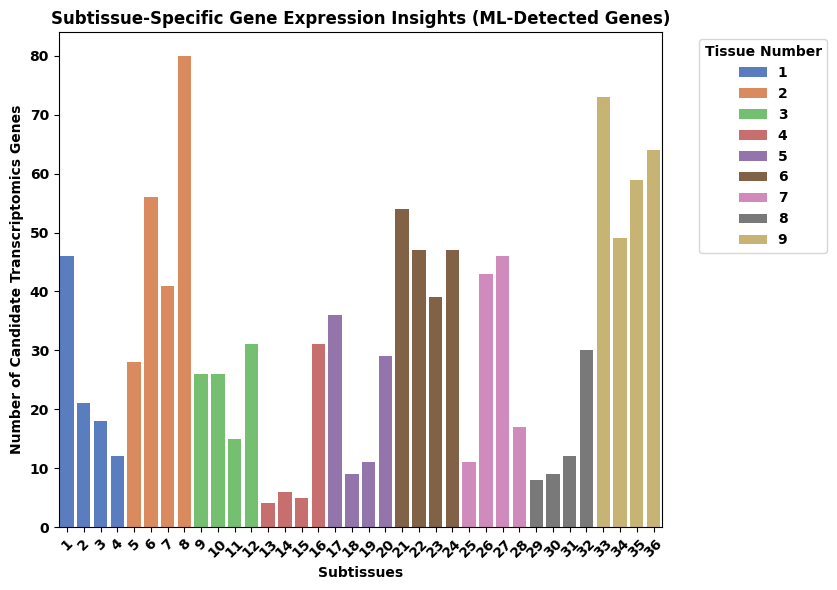

In [13]:
# For all the tissues

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named df

# Step 1: Extract the tissue number from the 'Cluster' column
df['Tissue'] = df['Cluster'].apply(lambda x: x.split('_')[0])

# Step 2: Map the 'Cluster' column to numeric labels (1 to N)
df['cluster_label'] = range(1, len(df) + 1)



# Step 3: Define a custom color palette with distinct colors for each tissue
# The number of distinct colors should match the number of unique tissue values
palette = sns.color_palette("muted", len(df['Tissue'].unique()))

# Step 4: Create the bar plot using Seaborn
plt.figure(figsize=(8.5, 6))
ax = sns.barplot(x='cluster_label', y='Common SHAP Genes Count', data=df, hue='Tissue', palette=palette, dodge=False)

# Step 5: Set the labels and title
ax.set_xlabel('Subtissues')
ax.set_ylabel('Number of Candidate Transcriptomics Genes')
ax.set_title('Subtissue-Specific Gene Expression Insights (ML-Detected Genes)')

# Adjust the x-ticks to show subtissue numbering starting from 1
ax.set_xticklabels(df['cluster_label'], rotation=45)

# Display legend for tissue groups
plt.legend(title='Tissue Number', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add this line before plt.tight_layout() to make all text bold
plt.rcParams["font.weight"] = "bold"


# Show the plot
plt.tight_layout()
plt.savefig("./figures/SHAP_subtissues_oct13_24.png", dpi=1200)
plt.show()


# Graph network for hub genes detection

The adjacency matrices have already been produced on mercury using WGCNA

## tests (Move on from this)

In [14]:
gwas_genes = ['HBEGF', 'FUS', 'GPNMB', 'NFIC', 'TRIP4', 'PILRA', 'USP6NL', 'MS4A6A', 'ERN1', 'CDH23', 'KCNQ5', 'RABEP1', 'SNCA', 'ACE', 'APH1B', 'BLOC1S3', 'TACR3', 'IL34', 'KCNN4', 'CYP11A1', 'SLC24A4', 'WWOX', 'AP4M1', 'DSG2', 'MLH3', 'VCAM1', 'NDUFAF6', 'IQCK', 'PLCG2', 'CASP7', 'PSEN1', 'TBC1D7', 'BIN1', 'SORL1', 'AP2A1', 'PTK2B', 'CNTNAP2', 'NSF', 'ABCA7', 'TREML2', 'ZNF423', 'PICALM', 'PRKD3', 'ANKRD31', 'RAB10', 'VKORC1', 'FERMT2', 'PPARGC1A', 'NME8', 'CHRNE', 'RORA', 'AP4E1', 'EPG5', 'SUOX', 'ABI3', 'ZYX', 'CD2AP', 'TP53INP1', 'APOE', 'TET2', 'CR1', 'LRRC25', 'HLA-DQA1', 'MAP1B', 'CLNK', 'TMEM106B', 'WIPI2', 'CCDC6', 'SPI1', 'ADAMTS1', 'TMEM170B', 'FNBP4', 'APOC1', 'SHARPIN', 'MS4A4A', 'PSMC3', 'CASP8', 'INPP5D', 'APP', 'CLU', 'TMEM184A', 'CD33', 'VPS53', 'PLCH1', 'UNC5C', 'NRF1', 'AP2A2', 'CNN2', 'SPPL2A', 'C14orf93', 'ENAH', 'ALPK2', 'ADAM10', 'RERE', 'WDR12', 'HP1BP3']
shap_genes = ['PLCXD2', 'KCNF1', 'LPL', 'PCYOX1L', 'CHL1', 'MPO', 'SLC6A12', 'QDPR', 'SNAP25-AS1', 'WDR76', 'BACE2', 'C2orf88', 'PRELP', 'COL21A1', 'A2ML1', 'GPRASP2', 'APLN', 'MSR1', 'RIDA', 'ANGPT2', 'APLF', 'COL24A1', 'OGN', 'FOXO4', 'MYCBPAP', 'IRS1', 'GRIK1', 'TRIM47', 'FAM106A', 'RHCE', 'BEX5', 'CRH', 'VGF', 'HS6ST1', 'GLI1', 'RRAD', 'SLC16A6', 'KCNE4', 'AQP6', 'APLNR', 'LOC116435278', 'ARL17B', 'PLPPR1', 'SLC6A9', 'SPRED3', 'PHYHD1', 'PPEF1', 'TEAD2', 'TTC23-AS1', 'MILIP', 'LINC01736', 'MT1F', 'WWTR1', 'STEAP3', 'GAD2', 'C4orf19', 'ANGPT1', 'LINC01310', 'ZBTB16', 'SLC4A11', 'SCIRT', 'HSD17B8', 'TOMM70', 'THCAT155', 'ALDH1A1', 'DDX11', 'RERG', 'SST', 'LRRC55', 'DHRS11', 'PIRT', 'COLEC12', 'CSRP1', 'MOXD1', 'SPRY4', 'IRAK2', 'LOC105376654', 'LNCOC1', 'IGSF3', 'GOLGA7B', 'GFOD1', 'GAREM2', 'FBLN2', 'NWD1', 'ENPEP', 'SMIM10L2A', 'ENOSF1', 'CHRDL1', 'NGB', 'CHST6', 'FANCE', 'HBA2', 'KCNJ10', 'SLC25A48', 'ROBO2', 'PPDPF', 'GEM', 'ST6GAL2', 'ADPGK-AS1', 'SDSL', 'MEIS3', 'DDIT4L', 'C4B', 'RBM3', 'B3GAT1-DT', 'AHNAK', 'LTF', 'SFRP2', 'SEMA3C', 'TRIP10', 'CD38', 'PLK4', 'SPATA31H1', 'SSC5D', 'A4GALT', 'DUSP4', 'SMIM10L2B', 'SLC7A2', 'CNTNAP5-DT', 'NPNT', 'RAPGEF4', 'EIF2AK3-DT', 'SCG2', 'TTTY14', 'PASK', 'NRIP2', 'MDGA1', 'CALB1', 'PADI2', 'SLC5A3', 'MDH1B', 'SAMD4A', 'GAD1', 'SH2D5', 'SLC39A11', 'DUSP6', 'KCNK9', 'INSYN2A', 'DIO2', 'PDE10A', 'GOLGA8B', 'FMOD', 'MIR9-1HG', 'DUSP1', 'ITPKB', 'PDYN', 'PTPRU', 'GMPR', 'HSPB7', 'KCNAB1', 'COL9A1', 'PRKX', 'HBB', 'FKBP5', 'EGR4', 'HBA1', 'SLCO4A1', 'ARMCX5', 'PRDM16-DT', 'PAK1', 'AGFG2', 'HSD11B2', 'APOBR', 'PTTG1IP', 'KANK2', 'SVOP', 'SCIN', 'GALR1', 'CD44', 'INHBA-AS1', 'FBN3', 'S100A4', 'TNFRSF11B', 'PCP4L1', 'PRMT8', 'JAG1', 'RALY-AS1', 'ADAMTS2', 'LINC00499', 'ITGA10', 'PFKP', 'EPCIP', 'EMP3']

In [15]:
for i in shap_genes:
    print(i)

PLCXD2
KCNF1
LPL
PCYOX1L
CHL1
MPO
SLC6A12
QDPR
SNAP25-AS1
WDR76
BACE2
C2orf88
PRELP
COL21A1
A2ML1
GPRASP2
APLN
MSR1
RIDA
ANGPT2
APLF
COL24A1
OGN
FOXO4
MYCBPAP
IRS1
GRIK1
TRIM47
FAM106A
RHCE
BEX5
CRH
VGF
HS6ST1
GLI1
RRAD
SLC16A6
KCNE4
AQP6
APLNR
LOC116435278
ARL17B
PLPPR1
SLC6A9
SPRED3
PHYHD1
PPEF1
TEAD2
TTC23-AS1
MILIP
LINC01736
MT1F
WWTR1
STEAP3
GAD2
C4orf19
ANGPT1
LINC01310
ZBTB16
SLC4A11
SCIRT
HSD17B8
TOMM70
THCAT155
ALDH1A1
DDX11
RERG
SST
LRRC55
DHRS11
PIRT
COLEC12
CSRP1
MOXD1
SPRY4
IRAK2
LOC105376654
LNCOC1
IGSF3
GOLGA7B
GFOD1
GAREM2
FBLN2
NWD1
ENPEP
SMIM10L2A
ENOSF1
CHRDL1
NGB
CHST6
FANCE
HBA2
KCNJ10
SLC25A48
ROBO2
PPDPF
GEM
ST6GAL2
ADPGK-AS1
SDSL
MEIS3
DDIT4L
C4B
RBM3
B3GAT1-DT
AHNAK
LTF
SFRP2
SEMA3C
TRIP10
CD38
PLK4
SPATA31H1
SSC5D
A4GALT
DUSP4
SMIM10L2B
SLC7A2
CNTNAP5-DT
NPNT
RAPGEF4
EIF2AK3-DT
SCG2
TTTY14
PASK
NRIP2
MDGA1
CALB1
PADI2
SLC5A3
MDH1B
SAMD4A
GAD1
SH2D5
SLC39A11
DUSP6
KCNK9
INSYN2A
DIO2
PDE10A
GOLGA8B
FMOD
MIR9-1HG
DUSP1
ITPKB
PDYN
PTPRU
GMPR
HSPB7
KCNAB1
COL9A1
PR

In [2]:
import pandas as pd
summary = pd.read_csv("summary_shap_gwas_intermediates_sep19.csv", index_col=0)
summary

,Cluster,Study,Samples in Cluster,Unique Individuals,Common SHAP Genes Count,Common SHAP Genes,Individuals_gwas,GWAS snps count,GWAS snps,GWAS Genes,GWAS Genes Count,Total Unique Intermediates,Unique Intermediates List
0,1_1,ROSMAP,4,4,46,"['SLC7A2', 'NWD1', 'LPL', 'SLC5A3', 'EMP3', 'L...",2,120,"['rs41281314', 'rs7917781', 'rs55717455', 'rs1...","['CR1', 'FERMT2', 'ZNF423', 'HLA-DQA1', 'KCNQ5...",29,2583.0,"['GALNT7', 'GBP1', 'SLC9A2', 'RPS2', 'RGS8', '..."
1,1_2,ROSMAP,18,18,21,"['SLC5A3', 'TRIP10', 'LINC01736', 'GAREM2', 'B...",13,114,"['rs7903757', 'rs12572738', 'rs10999979', 'rs4...","['PICALM', 'CR1', 'MAP1B', 'BIN1', 'TMEM170B',...",31,611.0,"['SLC9A2', 'TRIM5', 'ANO6', 'DACH1', 'HPCA', '..."
2,1_3,ROSMAP,11,11,18,"['KANK2', 'A2ML1', 'SVOP', 'ITPKB', 'CSRP1', '...",8,128,"['rs4747187', 'rs10902249', 'rs693458', 'rs545...","['PICALM', 'SHARPIN', 'MAP1B', 'BIN1', 'FERMT2...",36,631.0,"['APP', 'GALNT12', 'ANTKMT', 'NDRG1', 'RGS8', ..."
3,1_4,ROSMAP,21,21,12,"['KANK2', 'DUSP1', 'A2ML1', 'PIRT', 'SLC5A3', ...",17,93,"['rs10999882', 'rs74147331', 'rs74147345', 'rs...","['CYP11A1', 'ZNF423', 'HLA-DQA1', 'SUOX', 'KCN...",28,227.0,"['NUDT4', 'GALNT12', 'SYP', 'SELENOP', 'WDR49'..."
4,2_1,MAYO,7,7,28,"['SLC7A2', 'NWD1', 'AHNAK', 'SLC5A3', 'APLNR',...",7,18,"['rs7667050', 'rs7268', 'rs2074613', 'rs340225...","['MLH3', 'ZNF423', 'PPARGC1A', 'HBEGF', 'RORA'...",9,489.0,"['WFIKKN2', 'SAMD11', 'SIGLEC14', 'ST8SIA6', '..."
5,2_2,MAYO,4,4,56,"['SLC7A2', 'GPRASP2', 'AHNAK', 'THCAT155', 'NW...",4,45,"['rs974711', 'rs4704187', 'rs1564926', 'rs6915...","['CDH23', 'FUS', 'ZNF423', 'WIPI2', 'AP4E1', '...",16,1640.0,"['APP', 'MICB', 'MT1X', 'FGF5', 'IL1RAPL2', 'E..."
6,2_3,MAYO,5,5,41,"['GPRASP2', 'AHNAK', 'SCG2', 'SLC5A3', 'EMP3',...",5,12,"['rs7919533', 'rs10902249', 'rs340019', 'rs340...","['CDH23', 'AP2A2', 'RORA', 'CD33', 'PLCG2', 'I...",6,460.0,"['SAMD11', 'SIGLEC14', 'ARSL', 'PTPRT', 'LINC0..."
7,2_4,MAYO,2,2,80,"['ANGPT2', 'PTPRU', 'CHST6', 'PADI2', 'ADPGK-A...",2,20,"['rs541464', 'rs7562227', 'rs6419133', 'rs3807...","['HP1BP3', 'ACE', 'BIN1', 'UNC5C', 'CNTNAP2', ...",8,NaN,NaN
8,3_1,ROSMAP,19,19,26,"['SDSL', 'THCAT155', 'SCG2', 'LPL', 'PTPRU', '...",12,84,"['rs1227078', 'rs1227075', 'rs1227069', 'rs412...","['FNBP4', 'TACR3', 'CR1', 'MAP1B', 'PILRA', 'F...",31,820.0,"['APP', 'SMPD4P1', 'PTPRT', 'RPS2', 'HLA-DMB',..."
9,3_2,ROSMAP,19,19,26,"['SLC7A2', 'THCAT155', 'SCG2', 'PTPRU', 'LPL',...",16,163,"['rs1125168', 'rs12266801', 'rs10999947', 'rs1...","['FNBP4', 'TACR3', 'CYP11A1', 'CCDC6', 'BIN1',...",39,793.0,"['APP', 'GALNT12', 'TBC1D16', 'ANTKMT', 'RPS2'..."


In [4]:
df

,GSTM1,CARTPT,MIR3976HG,LINC02263,PVALB,LINC00507,LINC01164,CTXN3,ROS1,SLC27A6,...,UNC5C,NRF1,AP2A2,SPPL2A,C14orf93,ENAH,ADAM10,RERE,WDR12,HP1BP3
GSTM1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CARTPT,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MIR3976HG,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LINC02263,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PVALB,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENAH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
ADAM10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
RERE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
WDR12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# Combine both lists if you want the total unique count from both lists
all_genes = set(shap_genes + gwas_genes)

# Check how many genes from your lists are in the DataFrame columns
matched_genes = all_genes.intersection(df.columns)
print(len(all_genes))
print("Number of matched genes:", len(matched_genes))
# print("Matched genes:", matched_genes)

279
Number of matched genes: 270


In [ ]:
# igraph shortest path test

In [23]:
# just a simple check

# Let's say X is 'column_name' and Y is the index label
value = df.at['RORA', 'SLC7A2']
print(value)

0


In [27]:
import pandas as pd
import igraph as ig

# Load your adjacency matrix
df = pd.read_csv('./adjacency_matrix/rnaseq_synapse/adj_mat_1_1.csv', index_col=0)

# Convert the DataFrame to an igraph graph
g = ig.Graph.Adjacency((df.values > 0).tolist(), mode=ig.ADJ_UNDIRECTED)
g.vs['name'] = df.columns  # Set vertex names to be gene names from columns

# Define your lists of genes
shap_genes = ['SLC7A2', 'NWD1', 'LPL', 'SLC5A3', 'EMP3', 'LOC116435278', 'KCNJ10', 'LINC01736', 'GOLGA8B', 'MEIS3', 'CNTNAP5-DT', 'ADPGK-AS1', 'ARL17B', 'PCYOX1L', 'A2ML1', 'DHRS11', 'SMIM10L2A', 'EIF2AK3-DT', 'PPDPF', 'C2orf88', 'ZBTB16', 'WDR76', 'ENOSF1', 'COL9A1', 'PLPPR1', 'ADAMTS2', 'HBA2', 'APLN', 'HBB', 'HBA1', 'SLC16A6', 'IGSF3', 'MT1F', 'KANK2', 'PIRT', 'SLC6A9', 'EPCIP', 'IRS1', 'SLC25A48', 'ANGPT1', 'PFKP', 'GLI1', 'SMIM10L2B', 'AQP6', 'S100A4', 'PRMT8']
gwas_genes = ['CR1', 'FERMT2', 'ZNF423', 'HLA-DQA1', 'KCNQ5', 'PLCG2', 'ABCA7', 'TRIP4', 'BLOC1S3', 'WIPI2', 'VPS53', 'RORA', 'CHRNE', 'WWOX', 'TET2', 'TMEM106B', 'CDH23', 'NFIC', 'ACE', 'CD2AP', 'SORL1', 'CASP8', 'HP1BP3', 'PPARGC1A', 'CNTNAP2', 'SPPL2A', 'CLU', 'AP4E1', 'RAB10']

# Collect all unique intermediate genes
all_intermediates = set()

# Iterate over each SHAP gene and GWAS gene to find shortest paths
for shap_gene in shap_genes:
    for gwas_gene in gwas_genes:
        try:
            # Get the vertex ids
            start_vertex = g.vs.find(name=shap_gene).index
            end_vertex = g.vs.find(name=gwas_gene).index
            
            # Find the shortest path
            path = g.get_shortest_paths(start_vertex, to=end_vertex, output="vpath")[0]
            
            # Extract the gene names for the vertices in the path
            if len(path) > 2:  # If path contains more than start and end
                intermediate_genes = [g.vs[vertex_id]['name'] for vertex_id in path[1:-1]]
                all_intermediates.update(intermediate_genes)  # Update the set of intermediates
                print(f"Path from {shap_gene} to {gwas_gene} goes through: {intermediate_genes}")
            else:
                print(f"Direct connection from {shap_gene} to {gwas_gene} with no intermediates.")
        except ValueError:
            print(f"No path found from {shap_gene} to {gwas_gene}, or one of the genes is not in the network.")

# Print the total number of unique intermediate genes
print(f"Total number of unique intermediate genes: {len(all_intermediates)}")


Path from SLC7A2 to CR1 goes through: ['KCNE4', 'KCNK2', 'PNLDC1', 'TSHZ3', 'DACH1', 'DBX2', 'VWC2', 'FGFRL1', 'WEE1', 'SCG3', 'FLRT2-AS1', 'ADGRL1-AS1']
Path from SLC7A2 to FERMT2 goes through: ['ADORA2A', 'KL', 'CSRP1']
Path from SLC7A2 to ZNF423 goes through: ['RARB', 'TLCD3B', 'CNTN4', 'TSPAN13', 'EYA1', 'NOTCH2', 'SPTLC3']
Path from SLC7A2 to HLA-DQA1 goes through: ['ADAMTS3', 'TMEM200B', 'LINC00460', 'FZD9', 'BTN2A2', 'MIAT', 'KCNJ5-AS1', 'NUPR1', 'UNC13C', 'ZIC1', 'STRC', 'COL5A2', 'RCVRN']
Path from SLC7A2 to KCNQ5 goes through: ['KCNE4', 'MIR124-2', 'PDE10A', 'BCL11B']
Path from SLC7A2 to PLCG2 goes through: ['LINC01166', 'FAM110A', 'NOS1AP', 'MIR4500HG', 'ZNF467', 'PKD1P2', 'CDCA7', 'CTXN1', 'CRHR2', 'LRRC56', 'LY6G5C', 'LOC107986669', 'PI16', 'HPGDS', 'VIM2P', 'DDX11', 'FBXO40', 'FAM53A', 'ASB2', 'MAMDC2', 'MEI1']
Path from SLC7A2 to ABCA7 goes through: ['ADAMTS3', 'TMEM200B', 'LINC00460', 'FZD9', 'BTN2A2', 'MIAT', 'KCNJ5-AS1', 'NUPR1', 'UNC13C', 'ZIC1', 'STRC', 'COL5A2', 'R

In [18]:
# what is there is an threshold for number of intermediates?

import pandas as pd
import igraph as ig

# Load your adjacency matrix
df = pd.read_csv('./adjacency_matrix/rnaseq_synapse/adj_mat_1_1.csv', index_col=0)

# Convert the DataFrame to an igraph graph
g = ig.Graph.Adjacency((df.values > 0).tolist(), mode=ig.ADJ_UNDIRECTED)
g.vs['name'] = df.columns  # Set vertex names to be gene names from columns

# Define your lists of genes
shap_genes = ['SLC7A2', 'NWD1', 'LPL', 'SLC5A3', 'EMP3', 'LOC116435278', 'KCNJ10', 'LINC01736', 'GOLGA8B', 'MEIS3', 'CNTNAP5-DT', 'ADPGK-AS1', 'ARL17B', 'PCYOX1L', 'A2ML1', 'DHRS11', 'SMIM10L2A', 'EIF2AK3-DT', 'PPDPF', 'C2orf88', 'ZBTB16', 'WDR76', 'ENOSF1', 'COL9A1', 'PLPPR1', 'ADAMTS2', 'HBA2', 'APLN', 'HBB', 'HBA1', 'SLC16A6', 'IGSF3', 'MT1F', 'KANK2', 'PIRT', 'SLC6A9', 'EPCIP', 'IRS1', 'SLC25A48', 'ANGPT1', 'PFKP', 'GLI1', 'SMIM10L2B', 'AQP6', 'S100A4', 'PRMT8']
gwas_genes = ['CR1', 'FERMT2', 'ZNF423', 'HLA-DQA1', 'KCNQ5', 'PLCG2', 'ABCA7', 'TRIP4', 'BLOC1S3', 'WIPI2', 'VPS53', 'RORA', 'CHRNE', 'WWOX', 'TET2', 'TMEM106B', 'CDH23', 'NFIC', 'ACE', 'CD2AP', 'SORL1', 'CASP8', 'HP1BP3', 'PPARGC1A', 'CNTNAP2', 'SPPL2A', 'CLU', 'AP4E1', 'RAB10']

# Thresholds to explore
thresholds = range(1, 11)  # Explore thresholds from 1 to 4 intermediates inclusive

# Results dictionary to hold unique genes for each threshold
threshold_results = {}

for threshold in thresholds:
    all_intermediates = set()
    print(f"Threshold: {threshold}")
    for shap_gene in shap_genes:
        for gwas_gene in gwas_genes:
            try:
                # Get the vertex ids
                start_vertex = g.vs.find(name=shap_gene).index
                end_vertex = g.vs.find(name=gwas_gene).index

                # Find the shortest path
                path = g.get_shortest_paths(start_vertex, to=end_vertex, output="vpath")[0]
                
                # Check path length condition
                if 1 < len(path) - 2 <= threshold:  # Subtracting 2 to exclude start and end
                    intermediate_genes = [g.vs[vertex_id]['name'] for vertex_id in path[1:-1]]
                    all_intermediates.update(intermediate_genes)
                    # print(f"Path from {shap_gene} to {gwas_gene} with {len(intermediate_genes)} intermediates: {intermediate_genes}")
                elif len(path) - 2 > threshold:
                    continue
                    # print(f"Path from {shap_gene} to {gwas_gene} exceeds threshold with {len(path) - 2} intermediates.")
                else:
                    continue
                    # print(f"Direct connection from {shap_gene} to {gwas_gene} with no intermediates.")
            except ValueError:
                print("iii")
                # print(f"One of the genes {shap_gene} or {gwas_gene} is not in the network.")

    threshold_results[threshold] = all_intermediates
    print(f"Unique intermediates for threshold {threshold}: {len(all_intermediates)}\n")

# Optionally, display or process the threshold_results further


Threshold: 1
Unique intermediates for threshold 1: 0

Threshold: 2
Unique intermediates for threshold 2: 47

Threshold: 3
Unique intermediates for threshold 3: 124

Threshold: 4
Unique intermediates for threshold 4: 236

Threshold: 5
Unique intermediates for threshold 5: 379

Threshold: 6
Unique intermediates for threshold 6: 531

Threshold: 7
Unique intermediates for threshold 7: 690

Threshold: 8
Unique intermediates for threshold 8: 860

Threshold: 9
Unique intermediates for threshold 9: 1019

Threshold: 10
Unique intermediates for threshold 10: 1210



## Shortest paths on matrices

### Identifying intermediate genes

A modified code to limit the number of intermediates by 2*SHAP*GWAS for clusters

In [24]:
# code checking for the threshold for each cluster
# Use the next one as the primary one

import pandas as pd
import igraph as ig
import os
import glob
import ast

# Load the summary file with gene lists for each cluster
summary_df = pd.read_csv('./summary_shap_gwas_sep_8.csv')

# Path to the directory containing the adjacency matrices
path = './adjacency_matrix/rnaseq_synapse/'

# Cluster number specification
cluster_number = '2_3'
file_path = f'{path}adj_mat_{cluster_number}.csv'

# Load the adjacency matrix for the specified cluster
df = pd.read_csv(file_path, index_col=0)

# Convert the DataFrame to an igraph graph
g = ig.Graph.Adjacency((df.values > 0).tolist(), mode=ig.ADJ_UNDIRECTED)
g.vs['name'] = df.columns.tolist()

# Retrieve the gene lists for the current cluster from the summary file
current_cluster_info = summary_df[summary_df['Cluster'] == cluster_number].iloc[0]
shap_genes = ast.literal_eval(current_cluster_info['Common SHAP Genes'])
gwas_genes = ast.literal_eval(current_cluster_info['GWAS Genes'])

# Filter genes to those actually present in the adjacency matrix
shap_genes = [gene for gene in shap_genes if gene in g.vs['name']]
gwas_genes = [gene for gene in gwas_genes if gene in g.vs['name']]

# Calculate the maximum allowed number of intermediates
max_allowed_intermediates = 2 * len(shap_genes) * len(gwas_genes)

# Collect all unique intermediate genes for this cluster and count intermediates by path length
intermediate_counts_by_path_length = {}
cumulative_intermediates = set()
threshold_results = {}
suitable_threshold = None

for shap_gene in shap_genes:
    for gwas_gene in gwas_genes:
        try:
            start_vertex = g.vs.find(name=shap_gene).index
            end_vertex = g.vs.find(name=gwas_gene).index
            path = g.get_shortest_paths(start_vertex, to=end_vertex, output="vpath")[0]
            path_length = len(path) - 2  # Subtracting start and end nodes
            if path_length > 0:
                intermediates = [g.vs[vertex_id]['name'] for vertex_id in path[1:-1]]
                if path_length not in intermediate_counts_by_path_length:
                    intermediate_counts_by_path_length[path_length] = set(intermediates)
                else:
                    intermediate_counts_by_path_length[path_length].update(intermediates)
        except ValueError:
            continue  # Skip if gene not found in the network

# Calculate cumulative counts of unique intermediates for each path length threshold and determine the suitable threshold
for length in sorted(intermediate_counts_by_path_length):
    cumulative_intermediates.update(intermediate_counts_by_path_length[length])
    threshold_results[length] = len(cumulative_intermediates)
    if len(cumulative_intermediates) > max_allowed_intermediates and suitable_threshold is None:
        suitable_threshold = length - 1  # Set threshold to the last length that was within the limit

if suitable_threshold is None:
    suitable_threshold = max(threshold_results.keys(), default=0)

# Print results for each threshold
print(f"Threshold analysis for cluster {cluster_number}:")
for length, count in threshold_results.items():
    print(f"Threshold {length}: {count} unique intermediates")
print(f"\nTotal unique intermediates for cluster {cluster_number}: {len(cumulative_intermediates)}")
print(f"Suitable threshold for path length to limit intermediates: {suitable_threshold}")
print(f"Maximum allowed intermediates: {max_allowed_intermediates}")




Threshold analysis for cluster 2_3:
Threshold 1: 5 unique intermediates
Threshold 2: 22 unique intermediates
Threshold 3: 62 unique intermediates
Threshold 4: 129 unique intermediates
Threshold 5: 215 unique intermediates
Threshold 6: 315 unique intermediates
Threshold 7: 460 unique intermediates
Threshold 8: 531 unique intermediates
Threshold 9: 627 unique intermediates
Threshold 10: 724 unique intermediates
Threshold 11: 790 unique intermediates
Threshold 12: 809 unique intermediates
Threshold 13: 813 unique intermediates

Total unique intermediates for cluster 2_3: 813
Suitable threshold for path length to limit intermediates: 7
Maximum allowed intermediates: 492


In [38]:
# For all adjacency matrices

import pandas as pd
import igraph as ig
import os
import glob
import ast

# Load the summary file with gene lists for each cluster
summary_df = pd.read_csv('./summary_shap_gwas_sep_8.csv')

# Path to the directory containing the adjacency matrices
path = './adjacency_matrix/rnaseq_synapse/'

# Prepare a DataFrame to store the results
results_df = pd.DataFrame()

# Loop over all adjacency matrix files
for file_path in glob.glob(path + 'adj_mat_*.csv'):
    cluster_number = os.path.basename(file_path).replace('adj_mat_', '').split('.')[0]
    df = pd.read_csv(file_path, index_col=0)
    g = ig.Graph.Adjacency((df.values > 0).tolist(), mode=ig.ADJ_UNDIRECTED)
    g.vs['name'] = df.columns.tolist()

    current_cluster_info = summary_df[summary_df['Cluster'] == cluster_number].iloc[0]
    shap_genes = ast.literal_eval(current_cluster_info['Common SHAP Genes'])
    gwas_genes = ast.literal_eval(current_cluster_info['GWAS Genes'])

    shap_genes = [gene for gene in shap_genes if gene in g.vs['name']]
    gwas_genes = [gene for gene in gwas_genes if gene in g.vs['name']]

    max_allowed_intermediates = 2 * len(shap_genes) * len(gwas_genes)

    intermediate_counts_by_path_length = {}
    cumulative_intermediates = set()
    suitable_threshold = None

    for shap_gene in shap_genes:
        for gwas_gene in gwas_genes:
            try:
                start_vertex = g.vs.find(name=shap_gene).index
                end_vertex = g.vs.find(name=gwas_gene).index
                path = g.get_shortest_paths(start_vertex, to=end_vertex, output="vpath")[0]
                path_length = len(path) - 2  # Subtracting start and end nodes
                if path_length > 0:
                    intermediates = [g.vs[vertex_id]['name'] for vertex_id in path[1:-1]]
                    if path_length not in intermediate_counts_by_path_length:
                        intermediate_counts_by_path_length[path_length] = set(intermediates)
                    else:
                        intermediate_counts_by_path_length[path_length].update(intermediates)
            except ValueError:
                continue  # Skip if gene not found in the network

    # Determine the suitable threshold based on the maximum allowed intermediates
    for length in sorted(intermediate_counts_by_path_length):
        cumulative_intermediates.update(intermediate_counts_by_path_length[length])
        if len(cumulative_intermediates) > max_allowed_intermediates and suitable_threshold is None:
            suitable_threshold = length - 1

    if suitable_threshold is None:
        suitable_threshold = max(intermediate_counts_by_path_length.keys(), default=0)

    # Calculate the count of intermediates only up to the suitable threshold
    final_intermediates = set()
    for length in sorted(intermediate_counts_by_path_length):
        if length <= suitable_threshold:
            final_intermediates.update(intermediate_counts_by_path_length[length])

    # Store the results in a new row
    new_row = pd.DataFrame({
        'Cluster': [cluster_number],
        'Total Unique Intermediates': [len(final_intermediates)],
        'Unique Intermediates List': [list(final_intermediates)],
        'Threshold': [suitable_threshold],
        'Maximum Allowed Intermediates': [max_allowed_intermediates]
    })

    # Concatenate the new row with the results DataFrame
    results_df = pd.concat([results_df, new_row], ignore_index=True)

/tmp/ipykernel_24112/4269935689.py:41: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  path = g.get_shortest_paths(start_vertex, to=end_vertex, output="vpath")[0]
/tmp/ipykernel_24112/4269935689.py:41: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  path = g.get_shortest_paths(start_vertex, to=end_vertex, output="vpath")[0]
/tmp/ipykernel_24112/4269935689.py:41: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  path = g.get_shortest_paths(start_vertex, to=end_vertex, output="vpath")[0]
/tmp/ipykernel_24112/4269935689.py:41: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  path = g.get_shortest_paths(start_vertex, to=end_vertex, output="vpath")[0]
/tmp/ipykernel_24112/4269935689.py:41: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  path = g.get_shortest_paths(start_vertex, to=end_vertex, output="vpath")[0]
/tmp/ipykernel_24112/4269935689.py:41: R

In [ ]:
results_df

In [42]:

# Get the list of genes from the first row of the 'Unique Intermediates List' column
gene_list = results_df.loc[1, 'Unique Intermediates List']

# Print the list of genes
print("List of genes:", gene_list)

# Print the number of elements in the list
print("Number of elements in the list:", len(gene_list))

List of genes: ['GALNT7', 'GBP1', 'SLC9A2', 'RPS2', 'RGS8', 'HPCA', 'PRICKLE1', 'PRLR', 'RIN1', 'MT-ND3', 'GRM2', 'STAT4', 'KCNAB3', 'LOC441239', 'ADA', 'GTF2IRD2', 'TC2N', 'FILIP1', 'CHN1', 'DPP3-DT', 'CRABP2', 'FSCN2', 'C8orf34-AS1', 'RAB3C', 'PROCR', 'PTGDR2', 'KCNQ1', 'PLCH2', 'AP1G2', 'FBXO5', 'DRD2', 'UNC13C', 'NCF2', 'SMPX', 'LILRB3', 'HEYL', 'LRRTM4', 'TMC2', 'SEMA3D', 'SPEG', 'SERPINE1', 'C9orf50', 'HHEX', 'FBXL2', 'BAAT', 'CD37', 'IL13RA2', 'LINC01299', 'SKAP2', 'MUC1', 'CD8B2', 'VIRMA-DT', 'SLC8A3', 'UAP1L1', 'CMTM7', 'PCDH7', 'IGF2BP2', 'SLC39A12', 'NAALADL1', 'DPP10-AS1', 'ALOXE3', 'KIAA2012', 'LINC00507', 'DIO3OS', 'NPIPA5', 'COL15A1', 'ZP3', 'ATP10A', 'PPFIA3', 'GAB3', 'MAP1B', 'MTUS1', 'PCDH11Y', 'CHAD', 'TSPAN18', 'RPRML', 'GPR146', 'NREP', 'INPP5D', 'CA14', 'STEAP2', 'CAMK2A', 'STS', 'LINC00940', 'PHOSPHO1', 'MSC-AS1', 'RALY-AS1', 'PDZRN3', 'APOE', 'AACS', 'LANCL3', 'ECE2', 'SETBP1', 'LINC03022', 'KIF26A', 'ULK1', 'CFAP251', 'OPRM1', 'CRHR2', 'MIR3976HG', 'TRGC2', 'RA

In [43]:
results_df.to_csv("intermediate_genes_network_sep19.csv")

Limit the number of intermediate genes per path

To decrease the overall intermedaite genes count for some clusters

In [ ]:
# A modified more comperehensive code for diagnostic purposes:

In [ ]:
import pandas as pd
import igraph as ig
import os
import glob
import matplotlib.pyplot as plt
import ast

# Define the list of specific clusters to analyze
specific_clusters = ['1_1', '6_4', '6_1', '2_2', '6_2', '9_1']

# Load the summary file with gene lists for each cluster
summary_df = pd.read_csv('./summary_shap_gwas_sep_8.csv')

# Path to the directory containing the adjacency matrices
path = './adjacency_matrix/rnaseq_synapse/'

# Prepare a dictionary to hold the intermediate gene counts and unique intermediates at different thresholds
path_intermediates_counts = {cluster: [] for cluster in specific_clusters}
unique_genes_by_threshold = {cluster: {} for cluster in specific_clusters}

# Loop over all adjacency matrix files that correspond to the specific clusters
for file_path in glob.glob(path + 'adj_mat_*.csv'):
    cluster_number = os.path.basename(file_path).replace('adj_mat_', '').split('.')[0]
    if cluster_number in specific_clusters:
        df = pd.read_csv(file_path, index_col=0)
        
        # Retrieve the gene lists for the current cluster from the summary file
        current_cluster_info = summary_df[summary_df['Cluster'] == cluster_number]
        shap_genes = ast.literal_eval(current_cluster_info['Common SHAP Genes'].values[0])
        gwas_genes = ast.literal_eval(current_cluster_info['GWAS Genes'].values[0])

        # Convert the DataFrame to an igraph graph
        g = ig.Graph.Adjacency((df.values > 0).tolist(), mode=ig.ADJ_UNDIRECTED)
        g.vs['name'] = df.columns

        # Initialize storage for unique genes by threshold
        all_intermediates_by_threshold = {}

        # Analyze paths and collect intermediate gene counts
        for shap_gene in shap_genes:
            for gwas_gene in gwas_genes:
                try:
                    start_vertex = g.vs.find(name=shap_gene).index
                    end_vertex = g.vs.find(name=gwas_gene).index
                    path = g.get_shortest_paths(start_vertex, to=end_vertex, output="vpath")[0]
                    path_length = len(path) - 2  # Subtracting 2 to exclude start and end nodes

                    # Store path length for the first histogram
                    path_intermediates_counts[cluster_number].append(path_length)

                    # Store intermediates respecting dynamic thresholds
                    if path_length > 1:
                        intermediates = [g.vs[vertex_id]['name'] for vertex_id in path[1:-1]]
                        if path_length not in all_intermediates_by_threshold:
                            all_intermediates_by_threshold[path_length] = set()
                        all_intermediates_by_threshold[path_length].update(intermediates)

                except ValueError:
                    continue  # Skip if gene not found in the network

        # Aggregate unique genes by dynamic thresholds
        cumulative_intermediates = set()
        for length in sorted(all_intermediates_by_threshold):
            cumulative_intermediates.update(all_intermediates_by_threshold[length])
            unique_genes_by_threshold[cluster_number][length] = len(cumulative_intermediates)

# Plot histograms for each cluster
plt.figure(figsize=(30, 12))
for i, cluster in enumerate(specific_clusters, 1):
    plt.subplot(2, 6, i)  # Adjust subplot layout for path counts
    max_count = max(path_intermediates_counts[cluster], default=0)  # Find the max count
    bins = list(range(max_count + 2))  # Create bins for each number up to the max
    plt.hist(path_intermediates_counts[cluster], bins=bins, align='left', color='darkblue', alpha=0.7)
    plt.title(f'Cluster {cluster} - Path Lengths')
    plt.xlabel('Path Length')
    plt.ylabel('Frequency of Paths')
    plt.xticks(bins[:-1], rotation=90, fontsize=8)

    plt.subplot(2, 6, i+6)  # Adjust subplot layout for unique genes by thresholds
    thresholds = list(unique_genes_by_threshold[cluster].keys())
    threshold_counts = [unique_genes_by_threshold[cluster][th] for th in thresholds]
    plt.plot(thresholds, threshold_counts, marker='o', linestyle='-', color='green')
    plt.title(f'Cluster {cluster} - Total Unique Intermediates')
    plt.xlabel('Path Length Threshold')
    plt.ylabel('Total Intermediates')
    plt.xticks(thresholds, rotation=90, fontsize=8)

plt.tight_layout()
plt.savefig('./figures/paths_clusters_threshold.png', dpi=900)
plt.show()


Modify the summary file and add these details

In [ ]:
import pandas as pd
summary_df = pd.read_csv("./summary_shap_gwas_sep_8.csv")
summary_df

In [45]:
# Assuming 'df' is your DataFrame and you want to drop 'Column1' and 'Column2'
results_df.drop(['Threshold', 'Maximum Allowed Intermediates'], axis=1, inplace=True)
results_df

,Cluster,Total Unique Intermediates,Unique Intermediates List
0,4_4,331,"[ATG9B, FGF5, PTPRT, PTPN6, KHDRBS2, CEDORA, M..."
1,1_1,2583,"[GALNT7, GBP1, SLC9A2, RPS2, RGS8, HPCA, PRICK..."
2,7_3,304,"[ST18, TMEM47, IL18R1, CDCA7, ERBB3, PCDH11X, ..."
3,5_3,63,"[FBXL16, NOTCH2, NFIC, WWTR1, BGN, TMEM47, OBS..."
4,7_1,43,"[OBSCN, EFR3A, RIMS3, RET, ACHE, PODXL2, PLCB2..."
5,8_2,55,"[AMIGO2, SNX10-AS1, S1PR3, LIFR, OBSCN, DTX3L,..."
6,5_2,89,"[CPVL, SELENOP, TP53I11, SLC12A5, WWTR1, SIGLE..."
7,1_3,631,"[APP, GALNT12, ANTKMT, NDRG1, RGS8, ANO6, MAN1..."
8,9_4,1128,"[GBP1, IL1RAPL2, RGS8, ERBB3, GIMAP2, MAN1A1, ..."
9,2_3,460,"[SAMD11, SIGLEC14, ARSL, PTPRT, LINC02610, PTP..."


In [ ]:
# Merging the DataFrames on 'Cluster' column
merged_df = pd.merge(summary_df, results_df, on='Cluster', how='left')
merged_df

In [47]:
merged_df.to_csv('summary_shap_gwas_intermediates_sep19.csv')

Creating histograms of the gene counts

In [ ]:
import pandas as pd
merged_df = pd.read_csv("summary_shap_gwas_intermediates_sep19.csv", index_col=0)
merged_df   

In [ ]:
# Histogram of one column

import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataframe is already loaded and named 'merged_df'
# Remove rows where 'Intermediate Genes Count' is NaN
col = 'Intermediate Genes Count'

clean_df = merged_df.dropna(subset=[col])

# Convert 'Intermediate Genes Count' column to integers now that NaNs are removed
clean_df[col] = clean_df[col].astype(int)

# Sort the dataframe by 'Intermediate Genes Count' in descending order
sorted_df = clean_df.sort_values(col, ascending=False)

# Create the histogram
plt.figure(figsize=(8, 5))
plt.bar(sorted_df['Cluster'], sorted_df[col], color='darkblue')
plt.xlabel('Cluster')
plt.ylabel('Intermediate Genes')
plt.title('Histogram of Intermediate Genes Count by Cluster')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.tight_layout()  # Adjust subplots to give some padding

# Save the figure with high DPI
plt.savefig('./figures/counts_intermediate_genes_sep17.png', dpi=900)
plt.show()


/tmp/ipykernel_24112/4075583151.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Total Unique Intermediates'] = clean_df['Total Unique Intermediates'].astype(int)
/tmp/ipykernel_24112/4075583151.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Common SHAP Genes Count'] = clean_df['Common SHAP Genes Count'].astype(int)
/tmp/ipykernel_24112/4075583151.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

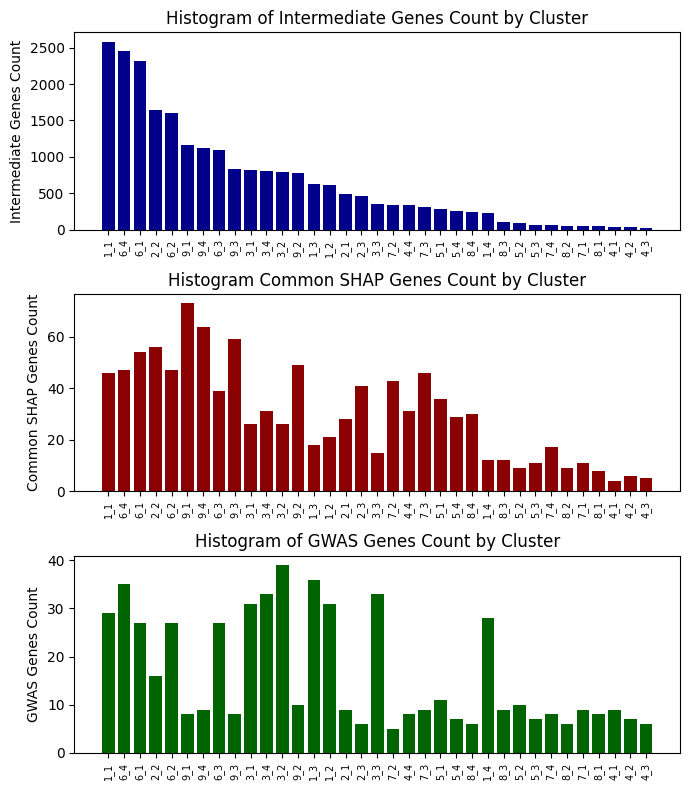

In [50]:
# One script, three histograms

import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataframe is already loaded and named 'merged_df'
# Remove rows where 'Intermediate Genes Count' is NaN
clean_df = merged_df.dropna(subset=['Total Unique Intermediates'])

# Convert 'Intermediate Genes Count' and other columns to integers now that NaNs are removed
clean_df['Total Unique Intermediates'] = clean_df['Total Unique Intermediates'].astype(int)
clean_df['Common SHAP Genes Count'] = clean_df['Common SHAP Genes Count'].astype(int)
clean_df['GWAS Genes Count'] = clean_df['GWAS Genes Count'].astype(int)

# Sort the dataframe by 'Intermediate Genes Count' in descending order
sorted_df = clean_df.sort_values('Total Unique Intermediates', ascending=False)

# Create the first histogram for 'Intermediate Genes Count'
plt.figure(figsize=(7, 8))

# First Histogram
plt.subplot(3, 1, 1)  # three rows, one column, first subplot
plt.bar(sorted_df['Cluster'], sorted_df['Total Unique Intermediates'], color='darkblue')
plt.title('Histogram of Intermediate Genes Count by Cluster')
plt.ylabel('Intermediate Genes Count')
plt.xticks(rotation=90, fontsize=7)  # Rotate the x-axis labels for better visibility

# Second Histogram, use the same cluster order as the first
plt.subplot(3, 1, 2)  # three rows, one column, second subplot
plt.bar(sorted_df['Cluster'], sorted_df['Common SHAP Genes Count'], color='darkred')
plt.title('Histogram Common SHAP Genes Count by Cluster')
plt.ylabel('Common SHAP Genes Count')
plt.xticks(rotation=90, fontsize=7)

# Third Histogram, use the same cluster order as the first
plt.subplot(3, 1, 3)  # three rows, one column, third subplot
plt.bar(sorted_df['Cluster'], sorted_df['GWAS Genes Count'], color='darkgreen')
plt.title('Histogram of GWAS Genes Count by Cluster')
plt.ylabel('GWAS Genes Count')
plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()  # Adjust subplots to give some padding
plt.savefig('./figures/counts_intermediate_gwas_shap_sep19.png', dpi=900)
plt.show()


### Filtering the adjacency matrices

In [1]:
import pandas as pd
summary = pd.read_csv("summary_shap_gwas_intermediates_sep19.csv", index_col=0)
summary

,Cluster,Study,Samples in Cluster,Unique Individuals,Common SHAP Genes Count,Common SHAP Genes,Individuals_gwas,GWAS snps count,GWAS snps,GWAS Genes,GWAS Genes Count,Total Unique Intermediates,Unique Intermediates List
0,1_1,ROSMAP,4,4,46,"['SLC7A2', 'NWD1', 'LPL', 'SLC5A3', 'EMP3', 'L...",2,120,"['rs41281314', 'rs7917781', 'rs55717455', 'rs1...","['CR1', 'FERMT2', 'ZNF423', 'HLA-DQA1', 'KCNQ5...",29,2583.0,"['GALNT7', 'GBP1', 'SLC9A2', 'RPS2', 'RGS8', '..."
1,1_2,ROSMAP,18,18,21,"['SLC5A3', 'TRIP10', 'LINC01736', 'GAREM2', 'B...",13,114,"['rs7903757', 'rs12572738', 'rs10999979', 'rs4...","['PICALM', 'CR1', 'MAP1B', 'BIN1', 'TMEM170B',...",31,611.0,"['SLC9A2', 'TRIM5', 'ANO6', 'DACH1', 'HPCA', '..."
2,1_3,ROSMAP,11,11,18,"['KANK2', 'A2ML1', 'SVOP', 'ITPKB', 'CSRP1', '...",8,128,"['rs4747187', 'rs10902249', 'rs693458', 'rs545...","['PICALM', 'SHARPIN', 'MAP1B', 'BIN1', 'FERMT2...",36,631.0,"['APP', 'GALNT12', 'ANTKMT', 'NDRG1', 'RGS8', ..."
3,1_4,ROSMAP,21,21,12,"['KANK2', 'DUSP1', 'A2ML1', 'PIRT', 'SLC5A3', ...",17,93,"['rs10999882', 'rs74147331', 'rs74147345', 'rs...","['CYP11A1', 'ZNF423', 'HLA-DQA1', 'SUOX', 'KCN...",28,227.0,"['NUDT4', 'GALNT12', 'SYP', 'SELENOP', 'WDR49'..."
4,2_1,MAYO,7,7,28,"['SLC7A2', 'NWD1', 'AHNAK', 'SLC5A3', 'APLNR',...",7,18,"['rs7667050', 'rs7268', 'rs2074613', 'rs340225...","['MLH3', 'ZNF423', 'PPARGC1A', 'HBEGF', 'RORA'...",9,489.0,"['WFIKKN2', 'SAMD11', 'SIGLEC14', 'ST8SIA6', '..."
5,2_2,MAYO,4,4,56,"['SLC7A2', 'GPRASP2', 'AHNAK', 'THCAT155', 'NW...",4,45,"['rs974711', 'rs4704187', 'rs1564926', 'rs6915...","['CDH23', 'FUS', 'ZNF423', 'WIPI2', 'AP4E1', '...",16,1640.0,"['APP', 'MICB', 'MT1X', 'FGF5', 'IL1RAPL2', 'E..."
6,2_3,MAYO,5,5,41,"['GPRASP2', 'AHNAK', 'SCG2', 'SLC5A3', 'EMP3',...",5,12,"['rs7919533', 'rs10902249', 'rs340019', 'rs340...","['CDH23', 'AP2A2', 'RORA', 'CD33', 'PLCG2', 'I...",6,460.0,"['SAMD11', 'SIGLEC14', 'ARSL', 'PTPRT', 'LINC0..."
7,2_4,MAYO,2,2,80,"['ANGPT2', 'PTPRU', 'CHST6', 'PADI2', 'ADPGK-A...",2,20,"['rs541464', 'rs7562227', 'rs6419133', 'rs3807...","['HP1BP3', 'ACE', 'BIN1', 'UNC5C', 'CNTNAP2', ...",8,NaN,NaN
8,3_1,ROSMAP,19,19,26,"['SDSL', 'THCAT155', 'SCG2', 'LPL', 'PTPRU', '...",12,84,"['rs1227078', 'rs1227075', 'rs1227069', 'rs412...","['FNBP4', 'TACR3', 'CR1', 'MAP1B', 'PILRA', 'F...",31,820.0,"['APP', 'SMPD4P1', 'PTPRT', 'RPS2', 'HLA-DMB',..."
9,3_2,ROSMAP,19,19,26,"['SLC7A2', 'THCAT155', 'SCG2', 'PTPRU', 'LPL',...",16,163,"['rs1125168', 'rs12266801', 'rs10999947', 'rs1...","['FNBP4', 'TACR3', 'CYP11A1', 'CCDC6', 'BIN1',...",39,793.0,"['APP', 'GALNT12', 'TBC1D16', 'ANTKMT', 'RPS2'..."


In [11]:
# Code for filtering one
# Next code is for filtering all

import pandas as pd
import os
import ast

# Load the summary file
summary_df = pd.read_csv("summary_shap_gwas_intermediates_sep19.csv", index_col=0)

# Set the cluster number
cluster_number = '1_2'  # Example, you can change it as needed

# Find the row in the summary DataFrame that matches the cluster number
cluster_data = summary_df[summary_df['Cluster'] == cluster_number].iloc[0]

# Load the adjacency matrix for the specified cluster
path = './adjacency_matrix/rnaseq_synapse/'
file_path = os.path.join(path, f'adj_mat_{cluster_number}.csv')
adj_matrix = pd.read_csv(file_path, index_col=0)

# Parse gene lists from the cluster data
shap_genes = ast.literal_eval(cluster_data['Common SHAP Genes'])
gwas_genes = ast.literal_eval(cluster_data['GWAS Genes'])
intermediate_genes = ast.literal_eval(cluster_data['Unique Intermediates List'])

# Create a set of all relevant genes (union of SHAP, GWAS, and intermediates)
all_relevant_genes = set(shap_genes + gwas_genes + intermediate_genes)

# Filter the adjacency matrix to only include relevant genes in rows and columns
filtered_adj_matrix = adj_matrix.loc[
    adj_matrix.index.intersection(all_relevant_genes),
    adj_matrix.columns.intersection(all_relevant_genes)
]


In [12]:
filtered_adj_matrix

,POSTN,RTP1,PTGER3,SERPINA5,FREM3,TESPA1,NGB,PCP4,RGS4,HTR1A,...,RORA,EPG5,TP53INP1,TET2,CCDC6,TMEM170B,CASP8,UNC5C,SPPL2A,ENAH
POSTN,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RTP1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PTGER3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SERPINA5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FREM3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMEM170B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
CASP8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
UNC5C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
SPPL2A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [13]:
# Calculate the total number of 1s
number_of_ones = filtered_adj_matrix.sum().sum()

# Calculate the total number of elements in the DataFrame
total_elements = filtered_adj_matrix.size

# Calculate the percentage of 1s
percentage_of_ones = (number_of_ones / total_elements) * 100

print(f"The percentage of 1s in the matrix is: {percentage_of_ones:.2f}%")

The percentage of 1s in the matrix is: 2.33%


Code for filtering all adjacency matrices

In [14]:
import pandas as pd
import os
import ast
import glob

# Load the summary file
summary_df = pd.read_csv("summary_shap_gwas_intermediates_sep19.csv", index_col=0)

# Path to the directory containing the adjacency matrices
path = './adjacency_matrix/rnaseq_synapse/'

# New directory to save the filtered matrices
new_path = './adjacency_matrix/filtered_adj_matrices/'
os.makedirs(new_path, exist_ok=True)

# Loop over all adjacency matrix files
for file_path in glob.glob(os.path.join(path, 'adj_mat_*.csv')):
    cluster_number = os.path.basename(file_path).replace('adj_mat_', '').replace('.csv', '')

    # Retrieve the gene lists for the current cluster from the summary DataFrame
    if cluster_number in summary_df['Cluster'].values:
        cluster_data = summary_df[summary_df['Cluster'] == cluster_number].iloc[0]
        
        # Load the adjacency matrix for the specified cluster
        adj_matrix = pd.read_csv(file_path, index_col=0)

        # Parse gene lists from the cluster data
        shap_genes = ast.literal_eval(cluster_data['Common SHAP Genes'])
        gwas_genes = ast.literal_eval(cluster_data['GWAS Genes'])
        intermediate_genes = ast.literal_eval(cluster_data['Unique Intermediates List'])

        # Create a set of all relevant genes (union of SHAP, GWAS, and intermediates)
        all_relevant_genes = set(shap_genes + gwas_genes + intermediate_genes)

        # Filter the adjacency matrix to only include relevant genes in rows and columns
        filtered_adj_matrix = adj_matrix.loc[
            adj_matrix.index.intersection(all_relevant_genes),
            adj_matrix.columns.intersection(all_relevant_genes)
        ]

        # Save the filtered adjacency matrix
        filtered_file_path = os.path.join(new_path, f'adj_mat_{cluster_number}_filt.csv')
        filtered_adj_matrix.to_csv(filtered_file_path)
    else:
        print(f"No data for cluster {cluster_number} found in summary.")


In [16]:
# Checking manually to make sure it works correctly
df = pd.read_csv("./adjacency_matrix/filtered_adj_matrices/adj_mat_4_3_filt.csv", index_col=0)
df

,APLNR,PIRT,CNTNAP5-DT,NECAB1,SPP1,CARNS1,CHST6,SPATA13,PEX5L,CYBB,...,DLGAP2,SLC4A11,PDLIM5,PLEKHM2,EDIL3,OAF,PSD2,ACACB,CDH23,BIN1
APLNR,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PIRT,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CNTNAP5-DT,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NECAB1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
SPP1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
CARNS1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHST6,1,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
SPATA13,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
PEX5L,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
CYBB,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Identification of Hub genes in adjancency matrix by network metrics

### Test

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the adjacency matrix from a CSV file
# Replace 'your_adjacency_matrix.csv' with your file path
adjacency_matrix = pd.read_csv('~/rnaseq_synapse/adjacency_matrix/filtered_adj_matrices/adj_mat_1_3_filt.csv', index_col=0)
G = nx.from_pandas_adjacency(adjacency_matrix)

adjacency_matrix

,MEPE,MME,HTR3B,RXFP1,NGB,SV2C,COL5A2,CALB1,RGS4,HTR1A,...,APP,VPS53,UNC5C,NRF1,AP2A2,SPPL2A,ENAH,RERE,WDR12,HP1BP3
MEPE,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MME,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
HTR3B,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RXFP1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NGB,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPPL2A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
ENAH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
RERE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
WDR12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming you already have the graph G created from the adjacency matrix

# Step 1: Calculate all metrics
# 1.1 Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 1.2 Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# 1.3 Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 1.4 Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# 1.5 PageRank
pagerank = nx.pagerank(G)

# 1.6 Clustering Coefficient
clustering_coefficient = nx.clustering(G)

# 1.7 Node Connectivity (using node_connectivity function)
# The connectivity metric requires NetworkX version 2.5 or later
# node_connectivity = {node: nx.node_connectivity(G, node) for node in G.nodes()}

# Step 2: Combine all metrics into a DataFrame
metrics_df = pd.DataFrame({
    'degree': degree_centrality,
    'betweenness': betweenness_centrality,
    'closeness': closeness_centrality,
    'eigenvector': eigenvector_centrality,
    'pagerank': pagerank,
    'clustering_coefficient': clustering_coefficient
})

# # Step 3: Normalize all metrics for comparison
# scaler = MinMaxScaler()
# normalized_metrics = pd.DataFrame(scaler.fit_transform(metrics_df), 
#                                   index=metrics_df.index, 
#                                   columns=metrics_df.columns)


# Step 4: Visualization (Optional, based on your preference)
# ... (use the previous visualization code snippets)


In [7]:
metrics_df

,degree,betweenness,closeness,eigenvector,pagerank,clustering_coefficient
MEPE,0.005926,0.002941,0.122996,3.690558e-09,0.001448,0.000000
MME,0.037037,0.002890,0.159634,1.311132e-01,0.002026,0.608696
HTR3B,0.005926,0.000308,0.143203,1.004917e-08,0.000998,0.000000
RXFP1,0.008889,0.006959,0.144731,1.043067e-03,0.001292,0.166667
NGB,0.010370,0.011261,0.154768,2.677872e-07,0.001729,0.200000
...,...,...,...,...,...,...
SPPL2A,0.034074,0.011296,0.196408,9.298930e-05,0.002087,0.423810
ENAH,0.010370,0.001626,0.169436,2.487270e-06,0.001116,0.200000
RERE,0.005926,0.000047,0.114111,3.948295e-05,0.001064,0.000000
WDR12,0.008889,0.000799,0.139275,2.844350e-03,0.000918,0.333333


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming 'normalized_metrics' DataFrame is already defined

# Step 1: Get the top 20 nodes for each metric
top_nodes_per_metric = set()
for col in normalized_metrics.columns:
    top_nodes = normalized_metrics.nlargest(4, col).index
    top_nodes_per_metric.update(top_nodes)

# Convert set to list for indexing
top_nodes_per_metric = list(top_nodes_per_metric)

# Step 2: Filter normalized metrics DataFrame to include only the top nodes
filtered_metrics = normalized_metrics.loc[top_nodes_per_metric]

# Step 3: Convert to long format for seaborn
filtered_metrics_long = filtered_metrics.reset_index().melt(id_vars='index', 
                                                            var_name='Metric', 
                                                            value_name='Value')

# Rename 'index' column to 'Node' for clarity
filtered_metrics_long.rename(columns={'index': 'Node'}, inplace=True)

# Step 4: Plot grouped bar plot for top nodes
plt.figure(figsize=(16, 8))
sns.barplot(x='Node', y='Value', hue='Metric', data=filtered_metrics_long, dodge=True)
plt.title('Centrality Metrics for Selected Nodes')
plt.xlabel('Nodes')
plt.ylabel('Normalized Metric Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("/home/vmottaqi/rnaseq_synapse/filtered_adj_matrices/centrality_metrics_2_1.png", dpi=900)
plt.show()


### Top rank genes for one cluster (for pubmed hub genes)

In [39]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the adjacency matrix from a CSV file
# Replace 'your_adjacency_matrix.csv' with your file path
adjacency_matrix = pd.read_csv('~/rnaseq_synapse/adjacency_matrix/filtered_adj_matrices/adj_mat_2_2_filt.csv', index_col=0)
G = nx.from_pandas_adjacency(adjacency_matrix)

adjacency_matrix

,CARTPT,MIR3976HG,LINC02263,PVALB,LINC00507,LINC01164,CTXN3,ROS1,SLC27A6,LINC01007,...,AP4E1,CD2AP,WIPI2,CASP8,APP,CLU,UNC5C,NRF1,ADAM10,HP1BP3
CARTPT,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MIR3976HG,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LINC02263,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PVALB,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LINC00507,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
UNC5C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
NRF1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ADAM10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming you already have the graph G created from the adjacency matrix

# Step 1: Calculate all metrics
# 1.1 Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 1.2 Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# 1.3 Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 1.4 Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# 1.5 PageRank
pagerank = nx.pagerank(G)

# 1.6 Clustering Coefficient
clustering_coefficient = nx.clustering(G)

# 1.7 Node Connectivity (using node_connectivity function)
# The connectivity metric requires NetworkX version 2.5 or later
# node_connectivity = {node: nx.node_connectivity(G, node) for node in G.nodes()}

# Step 2: Combine all metrics into a DataFrame
metrics_df = pd.DataFrame({
    'degree': degree_centrality,
    'betweenness': betweenness_centrality,
    'closeness': closeness_centrality,
    'eigenvector': eigenvector_centrality,
    'pagerank': pagerank,
    'clustering_coefficient': clustering_coefficient
})

In [41]:
metrics_df

,degree,betweenness,closeness,eigenvector,pagerank,clustering_coefficient
CARTPT,0.007688,0.002914,0.079644,9.312909e-03,0.000499,0.581818
MIR3976HG,0.007096,0.010217,0.080674,5.169696e-03,0.000491,0.533333
LINC02263,0.008279,0.008158,0.080828,4.530217e-03,0.000553,0.530303
PVALB,0.004731,0.000519,0.066814,2.404257e-10,0.000610,0.733333
LINC00507,0.009462,0.009719,0.080971,1.480449e-02,0.000592,0.593407
...,...,...,...,...,...,...
CLU,0.004731,0.022003,0.072160,4.108552e-09,0.000657,0.266667
UNC5C,0.002957,0.006976,0.057617,4.574956e-18,0.000646,0.333333
NRF1,0.007096,0.007779,0.063050,5.102494e-12,0.000656,0.577778
ADAM10,0.004731,0.009493,0.072813,1.654683e-09,0.000543,0.333333


In [42]:
import pandas as pd
import networkx as nx

# Assuming 'metrics_df' is already defined with the metrics as columns

# Step 1: Define the number of top genes to extract
top_n = 5

# Step 2: Find top 5 genes for each metric (except clustering coefficient, where lower values are better)
top_genes = {}

for metric in metrics_df.columns:
    if metric == 'clustering_coefficient':
        # For clustering coefficient, lower values indicate hubs
        top_genes[metric] = metrics_df.nsmallest(top_n, metric).index.tolist()
    else:
        # For other metrics, higher values indicate hubs
        top_genes[metric] = metrics_df.nlargest(top_n, metric).index.tolist()

# Step 3: Print the top 5 hub genes for each metric
for metric, genes in top_genes.items():
    print(f"Top {top_n} hub genes based on {metric}:")
    print(genes)
    print()

# Step 4: Create the union of all top genes from all metrics
all_top_genes = set()
for genes in top_genes.values():
    all_top_genes.update(genes)

# Step 5: Print the union of top genes
print(f"Union of top {top_n} genes across all metrics:")
print(all_top_genes)
print()

# Step 6: Find genes that appear in more than one category
gene_counts = pd.Series([gene for genes in top_genes.values() for gene in genes]).value_counts()

# Step 7: Print genes that appear in more than one category
common_genes = gene_counts[gene_counts > 1]
if not common_genes.empty:
    print("Genes that appear in more than one metric category:")
    print(common_genes)
else:
    print("No genes appear in more than one metric category.")


Top 5 hub genes based on degree:
['GRIN2A', 'SLC9B2', 'CNTNAP2', 'PILRB', 'ADGRA3P1']

Top 5 hub genes based on betweenness:
['ADGRL1-AS1', 'KLF16', 'LINC00877', 'C4B', 'NXPH2']

Top 5 hub genes based on closeness:
['CNTNAP2', 'GRIN2A', 'TMEM47', 'ADGRA3P1', 'SCN1A']

Top 5 hub genes based on eigenvector:
['GRIN2A', 'DRAM1', 'TRIM22', 'SLC9B2', 'SV2B']

Top 5 hub genes based on pagerank:
['CYGB', 'ATOH8', 'BEND6', 'IQGAP1', 'HLA-DPA1']

Top 5 hub genes based on clustering_coefficient:
['LINC02607', 'GLP1R', 'RTN4RL2', 'NEUROD1', 'GINS3']

Union of top 5 genes across all metrics:
{'GINS3', 'TMEM47', 'SLC9B2', 'LINC00877', 'LINC02607', 'ADGRA3P1', 'IQGAP1', 'TRIM22', 'RTN4RL2', 'NXPH2', 'SCN1A', 'CYGB', 'KLF16', 'NEUROD1', 'GRIN2A', 'SV2B', 'CNTNAP2', 'PILRB', 'BEND6', 'C4B', 'ADGRL1-AS1', 'HLA-DPA1', 'GLP1R', 'ATOH8', 'DRAM1'}

Genes that appear in more than one metric category:
GRIN2A      3
CNTNAP2     2
ADGRA3P1    2
SLC9B2      2
Name: count, dtype: int64


In [ ]:
# One coherent code to get the hub candidates to be imported into excel

In [69]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the adjacency matrix from a CSV file
# Replace 'your_adjacency_matrix.csv' with your file path
adjacency_matrix = pd.read_csv('~/rnaseq_synapse/adjacency_matrix/filtered_adj_matrices/adj_mat_9_4_filt.csv', index_col=0)
G = nx.from_pandas_adjacency(adjacency_matrix)


# Assuming you already have the graph G created from the adjacency matrix

# Step 1: Calculate all metrics
# 1.1 Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 1.2 Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# 1.3 Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 1.4 Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# 1.5 PageRank
pagerank = nx.pagerank(G)

# 1.6 Clustering Coefficient
clustering_coefficient = nx.clustering(G)

# Step 2: Combine all metrics into a DataFrame
metrics_df = pd.DataFrame({
    'degree': degree_centrality,
    'betweenness': betweenness_centrality,
    'closeness': closeness_centrality,
    'eigenvector': eigenvector_centrality,
    'pagerank': pagerank,
    'clustering_coefficient': clustering_coefficient
})



# Assuming 'metrics_df' is already defined with the metrics as columns

# Step 1: Define the number of top genes to extract
top_n = 5

# Step 2: Find top 5 genes for each metric (except clustering coefficient, where lower values are better)
top_genes = {}

for metric in metrics_df.columns:
    if metric == 'clustering_coefficient':
        # For clustering coefficient, lower values indicate hubs
        top_genes[metric] = metrics_df.nsmallest(top_n, metric).index.tolist()
    else:
        # For other metrics, higher values indicate hubs
        top_genes[metric] = metrics_df.nlargest(top_n, metric).index.tolist()

# Step 3: Print the top 5 hub genes for each metric
# for metric, genes in top_genes.items():
#     print(f"Top {top_n} hub genes based on {metric}:")
#     print(genes)
#     print()

# Step 4: Create the union of all top genes from all metrics
all_top_genes = set()
for genes in top_genes.values():
    all_top_genes.update(genes)

# Step 5: Print the union of top genes
print(f"Union of top {top_n} genes across all metrics:")
print(all_top_genes)
print()

# Step 6: Find genes that appear in more than one category
gene_counts = pd.Series([gene for genes in top_genes.values() for gene in genes]).value_counts()

# Step 7: Print genes that appear in more than one category
common_genes = gene_counts[gene_counts > 1]
if not common_genes.empty:
    print("Genes that appear in more than one metric category:")
    print(common_genes)
else:
    print("No genes appear in more than one metric category.")


Union of top 5 genes across all metrics:
{'GABRG2', 'SLC47A2', 'ADRA2C', 'FIBCD1', 'SHC3', 'PDP1', 'AP2A2', 'NGB', 'AHNAK', 'TESPA1', 'HCN1', 'MET', 'PTPRZ1', 'ROS1', 'RTN4R', 'TTC23-AS1', 'FAM107B', 'ADAMTS2', 'FCER1G', 'LRRTM1', 'EPHX1', 'PARD3', 'TNFRSF1B', 'RAVER2', 'NPTX1'}

Genes that appear in more than one metric category:
ADRA2C    3
ROS1      2
HCN1      2
EPHX1     2
Name: count, dtype: int64


In [70]:
for i in all_top_genes:
    print(i)

GABRG2
SLC47A2
ADRA2C
FIBCD1
SHC3
PDP1
AP2A2
NGB
AHNAK
TESPA1
HCN1
MET
PTPRZ1
ROS1
RTN4R
TTC23-AS1
FAM107B
ADAMTS2
FCER1G
LRRTM1
EPHX1
PARD3
TNFRSF1B
RAVER2
NPTX1


## Top genes per cluster and novel genes identification

I have the pubmed top genes per cluster now (the following dictionary)

In [1]:
cluster_hub_genes = {
    '1_1': ['EGF', 'PTPRC', 'ECHDC3', 'NEFL'],
    '1_2': ['CXCL16', 'SPOCK3'],
    '1_3': ['C1S', 'CPT1A'],
    '1_4': ['HGF', 'SCN2A'],
    '2_1': ['FLT4'],
    '2_2': ['C4B', 'GRIN2A', 'NEUROD1'],
    '2_3': ['APOC1', 'RORA', 'AP2A2'],
    '3_1': ['APP', 'GRIN2A', 'INA'],
    '3_2': ['FABP7', 'GPR158', 'FGF14'],
    '3_3': ['APOC1', 'APP', 'LPL', 'PLXNA4', 'PRKCE'],
    '3_4': ['NAPB', 'TNFRSF21', 'STXBP1'],
    '4_1': ['MS4A6A', 'RYR3'],
    '4_2': ['EGF', 'IL33', 'MS4A6A', 'VGF'],
    '4_3': ['CNTNAP5-DT', 'NOTCH1'],
    '4_4': ['INA', 'LAMP2'],
    '5_1': ['CSF1', 'SOX10', 'LRP10'],
    '5_2': ['HSPA2', 'MAG'],
    '5_3': ['PFKFB3', 'TMEM106B', 'ERBB2'],
    '5_4': ['IKZF1', 'MS4A6A'],
    '6_1': ['ACE', 'STMN2'],
    '6_2': ['GPR6', 'HCK', 'UCP2'],
    '6_3': ['INA', 'PLXNA4', 'TGFB1'],
    '6_4': ['CASP8', 'CLSTN3', 'MAL'],
    '7_1': ['ACE', 'ACHE', 'CR1', 'LTF', 'SERPINI1', 'FLNA'],
    '7_2': ['BIN1'],
    '7_3': ['ITPKB', 'PCDH11X', 'TF'],
    '7_4': ['PLXNB1', 'APLNR'],
    '8_1': ['MEGF10', 'PLXNA1', 'STX1B'],
    '8_2': ['ANGPT1', 'FGF1'],
    '8_3': ['CPLX2', 'UNC13A'],
    '8_4': ['MME', 'SLC17A6'],
    '9_1': ['INPP5D', 'KLK6', 'SYT4'],
    '9_2': ['CAMK2A', 'SLC24A4', 'SPI1'],
    '9_3': ['AP2A2', 'INPP5D'],
    '9_4': ['AP2A2', 'NPTX1', 'MET', 'FCER1G', 'HCN1']
}


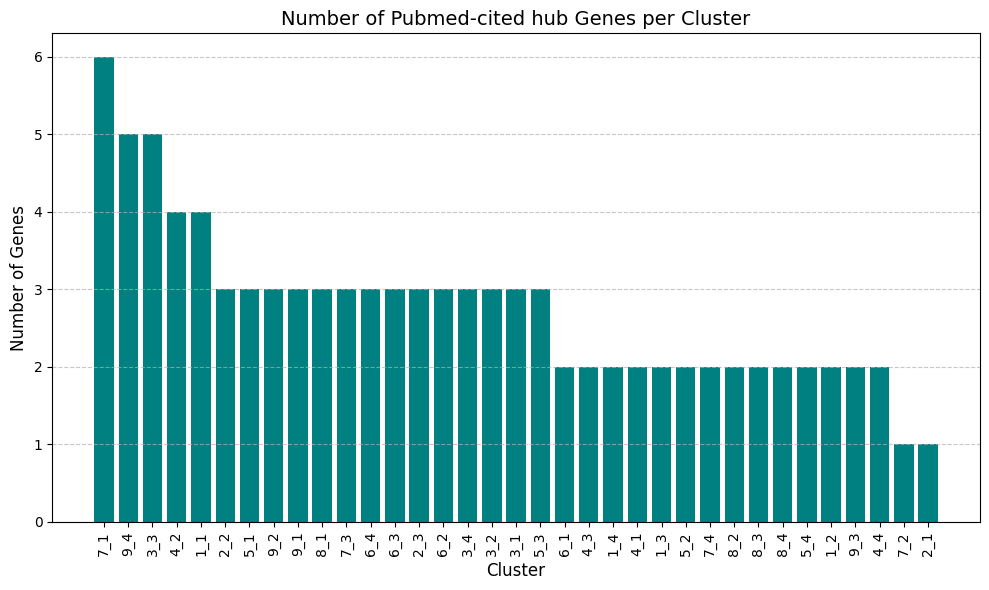

In [10]:
# Histogram

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the number of genes per cluster
gene_counts = {cluster: len(genes) for cluster, genes in cluster_hub_genes.items()}

# Convert the dictionary to a DataFrame for easier manipulation
df_gene_counts = pd.DataFrame(list(gene_counts.items()), columns=['Cluster', 'Gene_Count'])

# Sort the DataFrame by the number of genes in descending order
df_gene_counts = df_gene_counts.sort_values(by='Gene_Count', ascending=False)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(df_gene_counts['Cluster'], df_gene_counts['Gene_Count'], color='teal')

# Add labels and title
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Genes', fontsize=12)
plt.title('Number of Pubmed-cited hub Genes per Cluster', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjusts the layout so everything fits
plt.savefig("/home/vmottaqi/rnaseq_synapse/figures/pubmed_hub_genes_by_cluster_oct8_2024.png", dpi=1000)
plt.show()


### 1. Load Adjacency Matrices and Calculate Metrics for Each Cluster

### 2. Process All Clusters and Record the Results

complete code parralized (step 1 and 2)

In [29]:
import pandas as pd
import networkx as nx
import os
from concurrent.futures import ProcessPoolExecutor, as_completed

# Path to the directory where the adjacency matrices are stored
matrix_directory = '~/rnaseq_synapse/adjacency_matrix/filtered_adj_matrices/'

# Function to calculate metrics and find top 5 genes per metric
def calculate_metrics_for_cluster(cluster):
    file_name = f'adj_mat_{cluster}_filt.csv'
    file_path = os.path.join(matrix_directory, file_name)
    
    # Step 1: Read the adjacency matrix
    adjacency_matrix = pd.read_csv(file_path, index_col=0)
    G = nx.from_pandas_adjacency(adjacency_matrix)
    
    # Step 2: Calculate all centrality metrics
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    pagerank = nx.pagerank(G)
    clustering_coefficient = nx.clustering(G)

    # Step 3: Combine all metrics into a DataFrame
    metrics_df = pd.DataFrame({
        'degree': degree_centrality,
        'betweenness': betweenness_centrality,
        'closeness': closeness_centrality,
        'eigenvector': eigenvector_centrality,
        'pagerank': pagerank,
        'clustering_coefficient': clustering_coefficient
    })
    
    # Step 4: Find top 5 genes per metric
    top_n = 5
    top_genes = {}
    for metric in metrics_df.columns:
        if metric == 'clustering_coefficient':
            top_genes[metric] = metrics_df.nsmallest(top_n, metric).index.tolist()
        else:
            top_genes[metric] = metrics_df.nlargest(top_n, metric).index.tolist()
    
    return cluster, metrics_df, top_genes

# Function to parallelize cluster processing using ProcessPoolExecutor
def parallel_process_clusters(cluster_hub_genes, max_workers=4):
    all_metrics_df = {}
    all_top_genes = {}
    
    # Using ProcessPoolExecutor to parallelize the processing of each cluster
    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        # Submit tasks to process each cluster in parallel
        futures = {executor.submit(calculate_metrics_for_cluster, cluster): cluster for cluster in cluster_hub_genes.keys()}
        
        for future in as_completed(futures):
            cluster, metrics_df, top_genes = future.result()
            all_metrics_df[cluster] = metrics_df  # Store the DataFrame for this cluster
            all_top_genes[cluster] = top_genes    # Store the top genes for this cluster

    return all_metrics_df, all_top_genes

# Run the parallel processing with 4 workers
all_metrics_df, all_top_genes = parallel_process_clusters(cluster_hub_genes, max_workers=10)

# Example output:
# all_metrics_df['1_1'] gives the metrics DataFrame for cluster '1_1'
# all_top_genes['1_1'] gives the top genes for each metric in cluster '1_1'


In [68]:
all_top_genes['9_4']

{'degree': ['ADRA2C', 'AHNAK', 'ROS1', 'HCN1', 'EPHX1'],
 'betweenness': ['RTN4R', 'LRRTM1', 'NPTX1', 'SHC3', 'AP2A2'],
 'closeness': ['ADRA2C', 'RAVER2', 'TNFRSF1B', 'PTPRZ1', 'PARD3'],
 'eigenvector': ['ROS1', 'TESPA1', 'GABRG2', 'TTC23-AS1', 'PDP1'],
 'pagerank': ['FCER1G', 'EPHX1', 'FAM107B', 'ADRA2C', 'HCN1'],
 'clustering_coefficient': ['MET', 'NGB', 'ADAMTS2', 'FIBCD1', 'SLC47A2']}

In [31]:
# save the two dictionaries

import pickle

# Path to save the pickle files
pickle_dir = '/home/vmottaqi/rnaseq_synapse'  # Change this to your desired directory

# Save the all_metrics_df dictionary to a pickle file
with open(f'{pickle_dir}/clusters_all_metrics_df_oct7_2024.pkl', 'wb') as metrics_file:
    pickle.dump(all_metrics_df, metrics_file)

# Save the all_top_genes dictionary to a pickle file
with open(f'{pickle_dir}/clusters_all_top_genes_oct7_2024.pkl', 'wb') as top_genes_file:
    pickle.dump(all_top_genes, top_genes_file)

print("Dictionaries have been saved in pickle format.")


Dictionaries have been saved in pickle format.


### 3. Compare Top Genes with Cluster Hub Genes and Identify Higher Ranked Genes

In [70]:
# Function to find the rank of a gene in a specific metric
def find_gene_rank(metrics_df, gene, metric):
    sorted_genes = metrics_df[metric].rank(ascending=False)
    return sorted_genes[gene] if gene in sorted_genes else None

# Store the genes with higher ranks than the hub genes for each cluster
higher_ranked_genes_by_cluster = {}

# For each cluster, compare the hub genes with the top genes in the calculated metrics
for cluster, hub_genes in cluster_hub_genes.items():
    higher_ranked_genes_by_cluster[cluster] = []
    
    # Get the metrics DataFrame and top genes for this cluster
    metrics_df = all_metrics_df[cluster]
    top_genes = all_top_genes[cluster]
    
    # Dictionary to store the highest (i.e., lowest rank number) rank among hub genes for each metric
    highest_hub_gene_rank = {metric: float('inf') for metric in metrics_df.columns}
    
    # Step 1: Find the highest rank for each metric considering all hub genes
    for hub_gene in hub_genes:
        for metric in metrics_df.columns:
            hub_gene_rank = find_gene_rank(metrics_df, hub_gene, metric)
            if hub_gene_rank and hub_gene_rank < highest_hub_gene_rank[metric]:
                highest_hub_gene_rank[metric] = hub_gene_rank
    
    # Step 2: Compare against the top genes for each metric
    for metric, top_gene_list in top_genes.items():
        for top_gene in top_gene_list:
            top_gene_rank = find_gene_rank(metrics_df, top_gene, metric)
            
            # If the top gene has a higher rank (lower rank number) than the best hub gene rank, store it
            if top_gene_rank and top_gene_rank < highest_hub_gene_rank[metric]:
                higher_ranked_genes_by_cluster[cluster].append((top_gene, top_gene_rank, metric))

# Example output:
# higher_ranked_genes_by_cluster['1_1'] gives all top-ranked genes that are ranked higher than the hub genes for cluster '1_1'


In [53]:
higher_ranked_genes_by_cluster['3_3']

[('KIAA1549L', 1.0, 'degree'),
 ('STX1B', 1.0, 'betweenness'),
 ('IL1RAP', 2.0, 'betweenness'),
 ('PGAP4', 3.0, 'betweenness'),
 ('KIAA1549L', 1.0, 'eigenvector'),
 ('DCLK1', 1.0, 'pagerank')]

Save the Dictionary as a Pickle File

In [71]:
import pickle
import os

# Path to save the pickle file
pickle_dir = os.path.expanduser('/home/vmottaqi/rnaseq_synapse')

# Ensure the directory exists
if not os.path.exists(pickle_dir):
    os.makedirs(pickle_dir)

# Save the higher_ranked_genes_by_cluster dictionary to a pickle file
with open(f'{pickle_dir}/novel_hub_genes_by_cluster_oct7_2024.pkl', 'wb') as file:
    pickle.dump(higher_ranked_genes_by_cluster, file)

print("The dictionary has been saved in pickle format.")


The dictionary has been saved in pickle format.


Generate Histogram of Hub Gene Distribution Per Cluster

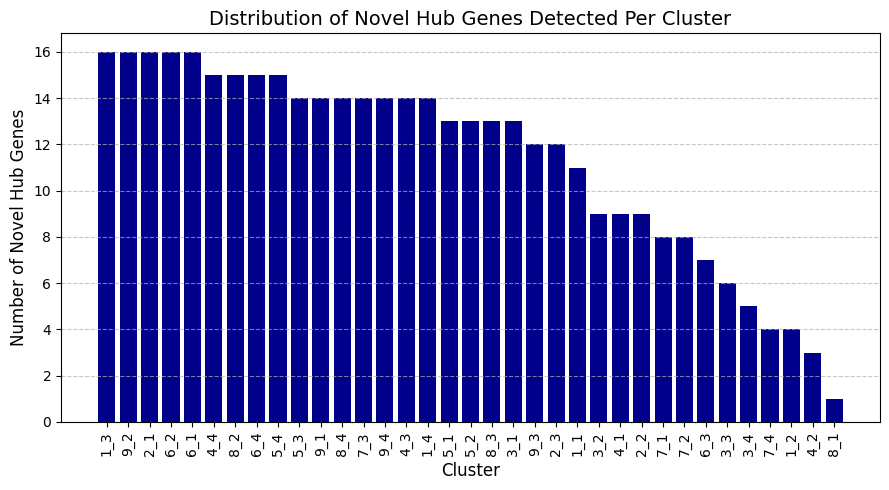

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary to count the number of novel hub genes per cluster
novel_hub_gene_counts = {cluster: len(genes) for cluster, genes in higher_ranked_genes_by_cluster.items()}

# Convert the dictionary to a DataFrame for easier plotting and sorting
df_novel_hub_genes = pd.DataFrame(list(novel_hub_gene_counts.items()), columns=['Cluster', 'Novel_Hub_Gene_Count'])

# Sort the DataFrame by the number of novel hub genes in descending order
df_novel_hub_genes = df_novel_hub_genes.sort_values(by='Novel_Hub_Gene_Count', ascending=False)

# Plot a histogram
plt.figure(figsize=(9, 5))
plt.bar(df_novel_hub_genes['Cluster'], df_novel_hub_genes['Novel_Hub_Gene_Count'], color='darkblue')

# Add labels and title
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Novel Hub Genes', fontsize=12)
plt.title('Distribution of Novel Hub Genes Detected Per Cluster', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjusts the layout so everything fits
plt.savefig("/home/vmottaqi/rnaseq_synapse/figures/novel_hub_genes_by_cluster_oct7_2024.png", dpi=1000)
plt.show()


### 4. GSEA of the novel cluster genes

In [11]:
# Union of the novel hub genes

import pickle
import os

# Load the dictionary from the pickle file
pickle_dir = os.path.expanduser('~/rnaseq_synapse')
with open(f'{pickle_dir}/novel_hub_genes_by_cluster_oct7_2024.pkl', 'rb') as file:
    higher_ranked_genes_by_cluster = pickle.load(file)



# Get the union of all genes from the higher_ranked_genes_by_cluster dictionary
gene_union = set()

# Iterate through each cluster and collect all genes
for cluster, gene_info in higher_ranked_genes_by_cluster.items():
    for gene, rank, metric in gene_info:
        gene_union.add(gene)

# Print each gene in the union on a new line without quotes
for gene in gene_union:
    print(gene)


CDH23
COL19A1
C1orf198
ALDH1L1
ZC3HAV1
MAP3K9
MIR3667HG
LRMDA
TMC6
CNTNAP2
ITGB4
CFAP300
SELL
LINC00320
EVI2A
SULT4A1
CHST3
PGM5
LOC107986669
OAF
EXTL1
UGT8
PSMC3
SLC9A5
ACACB
MLH3
SULF1
MEI1
NRXN1
GABRQ
LOC105371735
RPL23AP5
ADRA2C
PGAP4
PLXNB3
ARAP2
LRRTM1
SPEG
GNG12
CCDC150
ZNF423
RAP1GAP
ZFHX3
PNMT
KCNH8
PLXNB1
KIAA1549L
KALRN
RUSC1
TNC
SHISA6
DLGAP3
BEST1
ADAM12
CD82
LINC00877
HEPACAM
NMNAT2
TNFRSF25
PLEKHH1
MLLT11
FGF17
LOC107984948
KCNS3
PAPLN
ELOVL4
PNMA5
ANO2
GABRB2
TSPAN12
DNAI4
ROS1
CHD5
FJX1
CYBA
LOC105372432
ATOH8
UNC5A
ST18
FGF12
BEX1
ITGA2
TESPA1
PTPRZ1
PLPP3
STX1B
TET2
HBEGF
KEL
CTSK
SLC4A10
SLC25A23
ZBTB8B
SLC45A3
CRNDE
SSPOP
AMIGO2
SH3TC2
WWTR1
ADGRL1-AS1
XK
GPR22
DCLK1
IQSEC3
VRK2
TNFSF13B
ADAMTS1
ADA2
LIX1
AMZ1
PTPRT
RAB3A
VWA5B2
FOLH1
PLIN4
MAP1B
RAVER2
NEURL1B
KCNAB2
DLC1
PRR18
KCNMA1
NOTCH1
NKAIN4
RPS18P5
PLEKHB1
TRIM58
HLA-DPA1
DSP
EDIL3
HEYL
STXBP1
GABRG2
KCNV1
MS4A4A
LRP10
STON2
BASP1
HSPB8
AP3B2
ENAH
PARD3
GNMT
TMEM144
TMEM63A
TEX29
PDK4
CDH19
B2M
NFATC4
MKX


In [12]:
len(gene_union)

262

In [13]:
import pickle
import os
from collections import Counter

# Load the dictionary from the pickle file
pickle_dir = os.path.expanduser('~/rnaseq_synapse')
with open(f'{pickle_dir}/novel_hub_genes_by_cluster_oct7_2024.pkl', 'rb') as file:
    higher_ranked_genes_by_cluster = pickle.load(file)

# Step 1: Use a Counter to count the occurrences of each gene across clusters
gene_counter = Counter()

# Iterate through each cluster and count the occurrences of genes
for cluster, gene_info in higher_ranked_genes_by_cluster.items():
    for gene, rank, metric in gene_info:
        gene_counter[gene] += 1

# Step 2: Filter to get only genes that appear in at least two clusters
common_genes = {gene: count for gene, count in gene_counter.items() if count > 1}

# Step 3: Print the common genes and their frequencies
print("Genes that are common across at least two clusters and their frequency:")
for gene, count in common_genes.items():
    print(f"{gene}: {count}")


Genes that are common across at least two clusters and their frequency:
TNFSF13B: 2
TGFA: 2
WWTR1: 2
PLPP3: 2
XK: 2
ANO6: 3
SLC4A10: 3
AKAP5: 2
SULF1: 3
LIFR: 2
GNG12: 2
PPARGC1A: 2
HBEGF: 2
WWOX: 3
CCDC150: 2
ZNF423: 4
ATOH8: 2
LOC105372432: 2
LNX1: 2
GPR37: 4
PARD3: 2
FGF12: 3
ELOVL4: 4
KIAA1549L: 2
STX1B: 2
IL1RAP: 4
SULT4A1: 2
ECHDC2: 3
FGF1: 3
STON2: 2
KCNC2: 2
CHST6: 3
PSD2: 4
PLXNB1: 2
ACACB: 2
PDK4: 4
PLEKHB1: 2
ABCG4: 2
SSPOP: 2
BEST1: 2
TMC6: 3
TMEM63A: 4
CHST3: 2
RIMS3: 2
LINC00320: 3
CP: 2
ITGB4: 2
PAPLN: 4
NFATC4: 2
CDH19: 2
RHOU: 2
SH3TC2: 2
ITGA2: 3
PLP1: 2
PRR5L: 2
GPRASP2: 3
GPR22: 2
NWD2: 2
GABRA3: 2
EXTL1: 4
IQSEC3: 2
CACNG8: 3
STXBP1: 2
CHD5: 5
ATP2B3: 3
MS4A4A: 4
LRP10: 3
UGT8: 3
GLTP: 2
B2M: 2
EPS8: 2
AMIGO2: 4
PGM5: 4
ENAH: 2
CPED1: 2
PKD1: 2
KALRN: 2
UNC5A: 2
VRK2: 2
ARAP2: 2
HEYL: 2
C1QL3: 2
BEX1: 2
ADA2: 2
RTN4R: 4
DLGAP3: 3
PNMT: 2
KCNAB2: 2
PLEKHH1: 2
ADRA2C: 2


In [15]:
len(common_genes)

90

In [14]:
for gene, count in common_genes.items():
    print(gene)

TNFSF13B
TGFA
WWTR1
PLPP3
XK
ANO6
SLC4A10
AKAP5
SULF1
LIFR
GNG12
PPARGC1A
HBEGF
WWOX
CCDC150
ZNF423
ATOH8
LOC105372432
LNX1
GPR37
PARD3
FGF12
ELOVL4
KIAA1549L
STX1B
IL1RAP
SULT4A1
ECHDC2
FGF1
STON2
KCNC2
CHST6
PSD2
PLXNB1
ACACB
PDK4
PLEKHB1
ABCG4
SSPOP
BEST1
TMC6
TMEM63A
CHST3
RIMS3
LINC00320
CP
ITGB4
PAPLN
NFATC4
CDH19
RHOU
SH3TC2
ITGA2
PLP1
PRR5L
GPRASP2
GPR22
NWD2
GABRA3
EXTL1
IQSEC3
CACNG8
STXBP1
CHD5
ATP2B3
MS4A4A
LRP10
UGT8
GLTP
B2M
EPS8
AMIGO2
PGM5
ENAH
CPED1
PKD1
KALRN
UNC5A
VRK2
ARAP2
HEYL
C1QL3
BEX1
ADA2
RTN4R
DLGAP3
PNMT
KCNAB2
PLEKHH1
ADRA2C


pathway anlaysis bar plot

In [2]:
# pathway anlaysis bar plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from the txt file
file_path = 'pathways_novel_union.txt'  # Update this with the actual path to your file
data = pd.read_csv(file_path, delimiter='\t')
data


,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,UP_KW_CELLULAR_COMPONENT,Synapse,30,11.450382,2.474198e-11,"GABRB2, RAB3A, FRMPD4, KCNC2, NRXN1, CABP1, AK...",219,546,17942,4.501480,8.412275e-10,8.412272e-10,7.422593e-10
1,UP_KW_CELLULAR_COMPONENT,Cell membrane,129,31.297710,6.895696e-07,"GABRB2, CLIC4, RAB3A, CD82, SLC44A1, KCNC2, IT...",219,4049,17942,1.659177,2.344510e-05,1.172268e-05,1.034354e-05
2,UP_KW_CELLULAR_COMPONENT,Cell projection,31,11.832061,4.498078e-04,"WDR49, RTN4R, CNTNAP2, RAB3A, FRMPD4, KCNC2, N...",219,1289,17942,1.970314,1.518050e-02,3.823366e-03,3.373559e-03
3,UP_KW_CELLULAR_COMPONENT,Postsynaptic cell membrane,8,3.053435,3.956799e-03,"GABRQ, GABRB2, CACNG8, SLC9A5, KCNC2, LRRTM1, ...",219,164,17942,3.996436,1.261076e-01,2.690623e-02,2.374079e-02
4,UP_KW_CELLULAR_COMPONENT,Cell junction,12,4.580153,1.126722e-02,"DSP, ENAH, CNTNAP2, PAK1, CLIC4, SLC9A5, ITGB4...",219,407,17942,2.415536,3.197263e-01,6.384758e-02,5.633610e-02
5,UP_KW_CELLULAR_COMPONENT,Synaptosome,4,1.526718,4.632189e-02,"EPS8, KCNC2, KCNAB2, STON2",219,66,17942,4.965269,8.006292e-01,2.249921e-01,1.985224e-01
6,UP_KW_CELLULAR_COMPONENT,Secreted,35,13.358779,7.526524e-02,"C1QB, PAPLN, TNC, TGFA, IL1RAP, FGF1, PKD1, CO...",219,2180,17942,1.315341,9.300828e-01,3.198773e-01,2.822446e-01


In [ ]:
# Filter to get the top five pathways based on 'Count'
top_five = data.nlargest(5, 'Count')

plt.rcParams.update({'font.weight': 'bold'})

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=top_five, y='Term', x='%', palette='dark')  # 'dark' palette for distinguishable, darker colors

# Add titles and labels
plt.title('Top Five Enriched Cellular Components', fontweight='bold')
plt.xlabel('Percentage of Genes', fontweight='bold')
plt.ylabel('Cellular Components', fontweight='bold')

# Save the figure
plt.savefig('./figures/top_five_cellular_componets.png', dpi=1200, bbox_inches='tight')

# Show the plot
plt.show()


### 5. Obtaining files to import to Gephi

In [2]:
import pandas as pd
adjacency_df = pd.read_csv("~/rnaseq_synapse/adjacency_matrix/filtered_adj_matrices/adj_mat_5_3_filt.csv", index_col=0)
adjacency_df

,LOC124902301,PART1,TESPA1,KCNS1,HTR3B,MCHR2,FAM163A,STAT4,EPCAM,RORB,...,SPEG,PFKFB3,RBM3,NFATC4,SBNO2,CDH23,NFIC,ZNF423,TMEM106B,RERE
LOC124902301,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PART1,0,1,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
TESPA1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KCNS1,0,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
HTR3B,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDH23,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0
NFIC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
ZNF423,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
TMEM106B,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [11]:
adjacency_df = pd.read_csv("~/rnaseq_synapse/adjacency_matrix/rnaseq_synapse/adj_mat_5_3.csv", index_col=0)
adjacency_df

,GSTM1,CARTPT,MIR3976HG,LINC02263,PVALB,LINC00507,LINC01164,CTXN3,ROS1,SLC27A6,...,UNC5C,NRF1,AP2A2,SPPL2A,C14orf93,ENAH,ADAM10,RERE,WDR12,HP1BP3
GSTM1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CARTPT,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MIR3976HG,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
LINC02263,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PVALB,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENAH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
ADAM10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
RERE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
WDR12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
# Unstack the adjacency matrix to create a long format DataFrame
edges = adjacency_df.unstack().reset_index()
edges.columns = ['Source', 'Target', 'Connection']

# Filter out rows where there is no edge
edges = edges[edges['Connection'] == 1]

# Remove self-loops
edges = edges[edges['Source'] != edges['Target']]

# Drop the Connection column as it's no longer needed
edges = edges.drop(columns=['Connection'])

# Remove duplicates
edges = edges.drop_duplicates()

In [13]:
edges

,Source,Target
10116,MIR3976HG,PVALB
10120,MIR3976HG,ROS1
10124,MIR3976HG,LINC00898
10154,MIR3976HG,EPIC1
10171,MIR3976HG,KCNS1
...,...,...
25558015,WDR12,STRBP
25558900,HP1BP3,IP6K3
25559346,HP1BP3,KCNJ2
25561868,HP1BP3,LDLRAP1


In [14]:
# Replace 'path_to_attribute_file.csv' with your actual file path
attributes_df = pd.read_csv('~/rnaseq_synapse/summary_shap_gwas_intermediates_sep19.csv')

# Extract rows where 'Cluster' column is '5_1'
filtered_attributes = attributes_df[attributes_df['Cluster'] == '5_3']
filtered_attributes

,Unnamed: 0,Cluster,Study,Samples in Cluster,Unique Individuals,Common SHAP Genes Count,Common SHAP Genes,Individuals_gwas,GWAS snps count,GWAS snps,GWAS Genes,GWAS Genes Count,Total Unique Intermediates,Unique Intermediates List
18,18,5_3,MSBB,38,35,11,"['NWD1', 'NPNT', 'PIRT', 'ITPKB', 'SLC6A9', 'S...",36,20,"['rs3753275', 'rs6846414', 'rs6460901', 'rs317...","['RERE', 'CDH23', 'ZNF423', 'DSG2', 'NME8', 'T...",7,63.0,"['FBXL16', 'NOTCH2', 'NFIC', 'WWTR1', 'BGN', '..."


In [15]:
# modified?

import ast

# Create a DataFrame for nodes
nodes = pd.DataFrame(adjacency_df.columns, columns=['Id'])

# Preprocess attributes DataFrame to convert string representations of lists to actual lists
def convert_to_list(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        return []

# Apply the conversion to each relevant column
filtered_attributes['GWAS Genes'] = filtered_attributes['GWAS Genes'].apply(convert_to_list)
filtered_attributes['Common SHAP Genes'] = filtered_attributes['Common SHAP Genes'].apply(convert_to_list)
filtered_attributes['Unique Intermediates List'] = filtered_attributes['Unique Intermediates List'].apply(convert_to_list)

# Define a function to determine the attribute of each node
def determine_attribute(node, attributes):
    if node in attributes['GWAS Genes'].iloc[0]:
        return 'GWAS'
    elif node in attributes['Common SHAP Genes'].iloc[0]:
        return 'SHAP'
    elif node in attributes['Unique Intermediates List'].iloc[0]:
        return 'Intermediate'
    else:
        return 'Rest'

# Apply the function to each node
nodes['Attribute'] = nodes['Id'].apply(lambda x: determine_attribute(x, filtered_attributes))
nodes


/tmp/ipykernel_35985/2221958481.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_attributes['GWAS Genes'] = filtered_attributes['GWAS Genes'].apply(convert_to_list)
/tmp/ipykernel_35985/2221958481.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_attributes['Common SHAP Genes'] = filtered_attributes['Common SHAP Genes'].apply(convert_to_list)
/tmp/ipykernel_35985/2221958481.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,Id,Attribute
0,GSTM1,Rest
1,CARTPT,Rest
2,MIR3976HG,Rest
3,LINC02263,Rest
4,PVALB,Rest
...,...,...
5051,ENAH,Rest
5052,ADAM10,Rest
5053,RERE,GWAS
5054,WDR12,Rest


In [16]:
# Assuming 'gwas' is stored as a list in the cell, print the first row's 'gwas' value
gwas_genes_first_row = filtered_attributes['Common SHAP Genes'].iloc[0]

# Print the 'GWAS' genes from the first row
print("shap Genes from the first row:", gwas_genes_first_row)

shap Genes from the first row: ['NWD1', 'NPNT', 'PIRT', 'ITPKB', 'SLC6A9', 'SLC25A48', 'ANGPT1', 'IGSF3', 'SSC5D', 'RBM3', 'ITGA10']


In [17]:
# Filter nodes for those with the attribute 'SHAP'
shap_genes = nodes[nodes['Attribute'] == 'SHAP']

# Print the genes listed as 'SHAP'
print("SHAP Genes:", shap_genes['Id'].tolist())

SHAP Genes: ['PIRT', 'ANGPT1', 'SLC6A9', 'NWD1', 'ITPKB', 'NPNT', 'SLC25A48', 'SSC5D', 'IGSF3', 'ITGA10', 'RBM3']


In [18]:
# Count the number of rows for each unique value in the 'Attribute' column
attribute_counts = nodes['Attribute'].value_counts()

# Print the counts
print(attribute_counts)

Attribute
Rest            4978
Intermediate      63
SHAP              11
GWAS               4
Name: count, dtype: int64


In [10]:
edges.to_excel('edges_5_3_for_gephi_oct13.xlsx', index=False)
nodes.to_excel('nodes_5_3_for_gephi_oct13.xlsx', index=False)

### 6. Bar plot of novel genes (for Nanobionyc)

In [15]:
import pickle
import os

# Load the dictionary from the pickle file
pickle_dir = os.path.expanduser('~/rnaseq_synapse')
with open(f'{pickle_dir}/novel_hub_genes_by_cluster_oct7_2024.pkl', 'rb') as file:
    gene_dict = pickle.load(file)
gene_dict 

{'1_1': [('LOC107986669', 1.0, 'betweenness'),
  ('CTSK', 2.0, 'betweenness'),
  ('MEI1', 1.0, 'closeness'),
  ('LOC105371735', 2.0, 'closeness'),
  ('TNFSF13B', 3.0, 'closeness'),
  ('ZNF837', 4.0, 'closeness'),
  ('ZCCHC24', 1.0, 'pagerank'),
  ('SMPX', 2.0, 'pagerank'),
  ('COL19A1', 3.0, 'pagerank'),
  ('KEL', 4.0, 'pagerank'),
  ('TNFSF13B', 5.0, 'pagerank')],
 '1_2': [('TGFA', 1.0, 'betweenness'),
  ('FRMPD4', 2.0, 'betweenness'),
  ('WWTR1', 3.0, 'betweenness'),
  ('WWTR1', 1.0, 'closeness')],
 '1_3': [('PLPP3', 1.0, 'degree'),
  ('ADAMTS1', 1.0, 'betweenness'),
  ('DCDC1', 2.0, 'betweenness'),
  ('CFAP300', 3.0, 'betweenness'),
  ('LENG9', 4.0, 'betweenness'),
  ('CYBA', 5.0, 'betweenness'),
  ('ZYX', 1.0, 'closeness'),
  ('FJX1', 2.0, 'closeness'),
  ('PDE1B', 1.0, 'eigenvector'),
  ('KCNV1', 2.0, 'eigenvector'),
  ('DLX6', 3.0, 'eigenvector'),
  ('XK', 4.0, 'eigenvector'),
  ('DCAF12L2', 5.0, 'eigenvector'),
  ('PLPP3', 1.0, 'pagerank'),
  ('ANO6', 2.0, 'pagerank'),
  ('MIR36

/tmp/ipykernel_37801/191322981.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['cluster_label'], rotation=45, fontweight='bold')


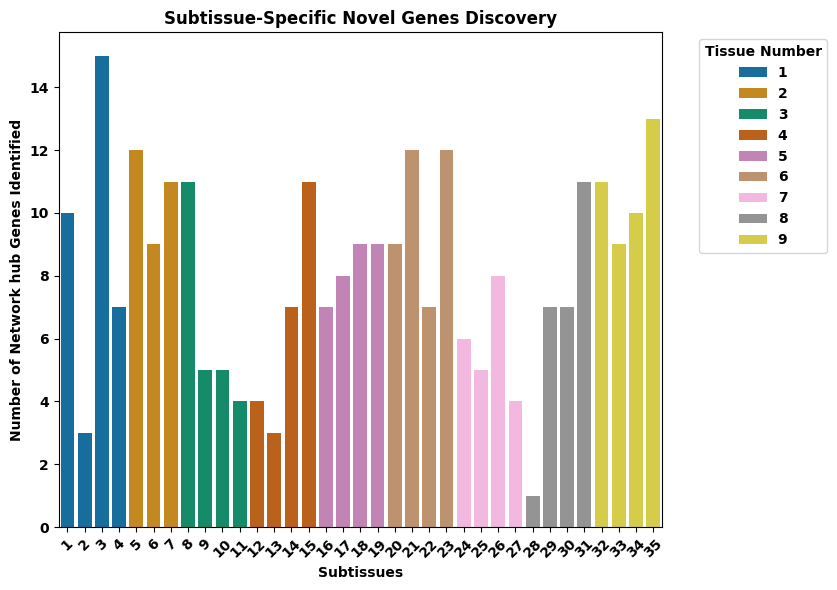

In [24]:
# Step 1: Count unique genes in each subtissue (cluster)
subtissue_counts = {cluster: len(set([gene[0] for gene in gene_list])) for cluster, gene_list in gene_dict.items()}

# Step 2: Convert the subtissue counts to a DataFrame
df = pd.DataFrame(list(subtissue_counts.items()), columns=['Subtissue', 'Novel Gene Count'])

# Step 3: Extract tissue number from the 'Subtissue' column
df['Tissue'] = df['Subtissue'].apply(lambda x: x.split('_')[0])

# Step 4: Map the 'Subtissue' column to numeric labels (1 to N)
df['cluster_label'] = range(1, len(df) + 1)

# Step 5: Define a custom color palette with distinct colors for each tissue
palette = sns.color_palette("colorblind", len(df['Tissue'].unique()))

# Step 6: Create the bar plot using Seaborn
plt.figure(figsize=(8.5, 6))
ax = sns.barplot(x='cluster_label', y='Novel Gene Count', data=df, hue='Tissue', palette=palette, dodge=False)

# Step 7: Set the labels and title
ax.set_xlabel('Subtissues', fontweight='bold')
ax.set_ylabel('Number of Network hub Genes Identified', fontweight='bold')
ax.set_title('Subtissue-Specific Novel Genes Discovery', fontweight='bold')

# Adjust the x-ticks to show subtissue numbering starting from 1
ax.set_xticklabels(df['cluster_label'], rotation=45, fontweight='bold')

# Display legend for tissue groups
plt.legend(title='Tissue Number', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add this line before plt.tight_layout() to make all text bold
plt.rcParams["font.weight"] = "bold"

# Show the plot
plt.tight_layout()
plt.savefig("./figures/novel_genes_subtissues_oct13_24.png", dpi=1200)
plt.show()

# Identification of Drug-Hubgenes (Bioteque embeddings)

## 1. Extracting info from four embedding spaces

In [60]:
# Union of the novel hub genes

import pickle
import os

# Load the dictionary from the pickle file
pickle_dir = os.path.expanduser('~/rnaseq_synapse')
with open(f'{pickle_dir}/novel_hub_genes_by_cluster_oct7_2024.pkl', 'rb') as file:
    higher_ranked_genes_by_cluster = pickle.load(file)



# Get the union of all genes from the higher_ranked_genes_by_cluster dictionary
genes_interest = set()

# Iterate through each cluster and collect all genes
for cluster, gene_info in higher_ranked_genes_by_cluster.items():
    for gene, rank, metric in gene_info:
        genes_interest.add(gene)



In [61]:
genes_interest

{'ABCA8',
 'ABCG4',
 'ABI3',
 'ABTB3',
 'ACACB',
 'ADA2',
 'ADAM12',
 'ADAMTS1',
 'ADGRL1-AS1',
 'ADRA2C',
 'AHNAK',
 'AKAP5',
 'ALDH1L1',
 'AMIGO2',
 'AMZ1',
 'ANO2',
 'ANO6',
 'AP3B2',
 'ARAP2',
 'ARHGAP39',
 'ATOH8',
 'ATP2B3',
 'B2M',
 'BASP1',
 'BEND6',
 'BEST1',
 'BEX1',
 'C1QB',
 'C1QL3',
 'C1orf198',
 'CABP1',
 'CACNG8',
 'CALN1',
 'CBR3',
 'CCDC150',
 'CD82',
 'CDH19',
 'CDH23',
 'CEND1',
 'CERCAM',
 'CFAP300',
 'CGAS',
 'CHD5',
 'CHGA',
 'CHGB',
 'CHST11',
 'CHST3',
 'CHST6',
 'CLIC4',
 'CNTNAP2',
 'COL19A1',
 'COL8A1',
 'CP',
 'CPED1',
 'CPNE9',
 'CRNDE',
 'CTSK',
 'CYBA',
 'CYGB',
 'DCAF12L2',
 'DCDC1',
 'DCLK1',
 'DDIT4',
 'DLC1',
 'DLGAP3',
 'DLX6',
 'DNAI4',
 'DSP',
 'ECHDC2',
 'EDIL3',
 'ELOVL4',
 'EMILIN3',
 'ENAH',
 'EPS8',
 'EVI2A',
 'EXTL1',
 'FENDRR',
 'FGF1',
 'FGF12',
 'FGF17',
 'FJX1',
 'FLI1',
 'FOLH1',
 'FRMPD4',
 'GABRA3',
 'GABRB2',
 'GABRG2',
 'GABRQ',
 'GLTP',
 'GNG12',
 'GNG2',
 'GNMT',
 'GPR22',
 'GPR37',
 'GPRASP2',
 'HBEGF',
 'HEPACAM',
 'HEYL',
 'HLA-

In [62]:
import pandas as pd
embeddings = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD-int-GEN-ppi-GEN/curated_targets-string/embeddings/dists.tsv', sep='\t')
compounds = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD.tsv', sep='\t')
genes = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/GEN.tsv', sep='\t')

In [63]:
embeddings.head(3)

,n1_CPD,n2_GEN,cosine_distance
0,AAAQFGUYHFJNHI-SFHVURJKSA-N,A0AVK6,0.5572
1,AAAQFGUYHFJNHI-SFHVURJKSA-N,A6NHQ4,0.4944
2,AAAQFGUYHFJNHI-SFHVURJKSA-N,A6NLF2,0.5491


In [33]:
compounds.head(3)

,code,name,mw,ro5,qed,embedding_universe
0,AAAAZQPHATYWOK-JXMROGBWSA-N,CHEMBL175513,613.14,2.0,0.127,"(CLL-sns-CPD-sim-CPD,ctrpv2_sens-fp2d_CC);(CLL..."
1,AAABMNXUOFPYQK-GRMLSQNXSA-N,MYCALAMIDE B,517.62,1.0,0.237,"(CLL-sns-CPD-sim-CPD,nci60_sens-cc_sim);(CLL-s..."
2,AAABMNXUOFPYQK-WMBKCNCTSA-N,124512-46-5,NaN,NaN,NaN,"(CHE-has-CPD,chebi);(CLL-sns-CPD-sim-CPD,nci60..."


In [34]:
genes.head(3)

,code,name,geneid,ensemble,desc,embedding_universe
0,A0A024RBG1,NUDT4B,11163,ENSG00000177144,Diphosphoinositol polyphosphate phosphohydrola...,"(CLL-dwr-GEN,ccle_rna);(DOM-has-GEN,interpro);..."
1,A0A075B6H7,IGKV3-7,NaN,ENSG00000243063|ENSG00000282310,Probable non-functional immunoglobulin kappa v...,"(DOM-has-GEN,interpro)"
2,A0A075B6H8,IGKV1D-42,NaN,ENSG00000211633,Probable non-functional immunoglobulin kappa v...,"(DOM-has-GEN,interpro)"


In [64]:
# Map compounds and genes to their names
embeddings = embeddings.merge(compounds, left_on='n1_CPD', right_on='code', how='left')
embeddings = embeddings.merge(genes, left_on='n2_GEN', right_on='code', how='left')
# Rename columns for clarity
embeddings.rename(columns={'name_x': 'compound_name', 'name_y': 'gene_name'}, inplace=True)
embeddings.head(3)

,n1_CPD,n2_GEN,cosine_distance,code_x,compound_name,mw,ro5,qed,embedding_universe_x,code_y,gene_name,geneid,ensemble,desc,embedding_universe_y
0,AAAQFGUYHFJNHI-SFHVURJKSA-N,A0AVK6,0.5572,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK 525762A,423.9,0.0,0.462,"(CHE-has-CPD,chebi);(CLL-sns-CPD,ctrpv2_sens);...",A0AVK6,E2F8,79733,ENSG00000129173,"Transcription factor E2F8, E2F-8","(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
1,AAAQFGUYHFJNHI-SFHVURJKSA-N,A6NHQ4,0.4944,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK 525762A,423.9,0.0,0.462,"(CHE-has-CPD,chebi);(CLL-sns-CPD,ctrpv2_sens);...",A6NHQ4,EPOP,100170841,ENSG00000277303|ENSG00000273604,Elongin BC and Polycomb repressive complex 2-a...,"(CLL-cnd-GEN,cclecnv_HMZ);(CLL-cnu-GEN,cclecnv..."
2,AAAQFGUYHFJNHI-SFHVURJKSA-N,A6NLF2,0.5491,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK 525762A,423.9,0.0,0.462,"(CHE-has-CPD,chebi);(CLL-sns-CPD,ctrpv2_sens);...",A6NLF2,ELOA3D,100506888,NaN,Elongin-A3 member D (EloA3D) (Elongin-A3-like-...,"(CLL-cnd-GEN,cclecnv_HMZ);(CLL-cnu-GEN,cclecnv..."


In [65]:
embeddings_filtered = embeddings[embeddings['gene_name'].isin(genes_interest)]
embeddings_filtered

,n1_CPD,n2_GEN,cosine_distance,code_x,compound_name,mw,ro5,qed,embedding_universe_x,code_y,gene_name,geneid,ensemble,desc,embedding_universe_y
78,AAAQFGUYHFJNHI-SFHVURJKSA-N,Q8TDI0,0.4571,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK 525762A,423.90,0.0,0.462,"(CHE-has-CPD,chebi);(CLL-sns-CPD,ctrpv2_sens);...",Q8TDI0,CHD5,26038,ENSG00000116254,"Chromodomain-helicase-DNA-binding protein 5, C...","(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
116,AAKJLRGGTJKAMG-UHFFFAOYSA-N,O43157,0.4385,AAKJLRGGTJKAMG-UHFFFAOYSA-N,ERLOTINIB HYDROCHLORIDE,393.44,0.0,0.410,"(CHE-has-CPD,chebi);(CLL-sns-CPD,ctrpv2_sens);...",O43157,PLXNB1,5364,ENSG00000164050,Plexin-B1 (Semaphorin receptor SEP),"(CLL-dwr+upr-GEN-dwr+upr-CLL-gfn-PGN-pdw-GEN,c..."
118,AAKJLRGGTJKAMG-UHFFFAOYSA-N,O60258,0.4360,AAKJLRGGTJKAMG-UHFFFAOYSA-N,ERLOTINIB HYDROCHLORIDE,393.44,0.0,0.410,"(CHE-has-CPD,chebi);(CLL-sns-CPD,ctrpv2_sens);...",O60258,FGF17,8822,ENSG00000158815,"Fibroblast growth factor 17, FGF-17","(CLL-dwr+upr-GEN-dwr+upr-CLL-gfn-PGN-pdw-GEN,c..."
152,AAKJLRGGTJKAMG-UHFFFAOYSA-N,P27701,0.3800,AAKJLRGGTJKAMG-UHFFFAOYSA-N,ERLOTINIB HYDROCHLORIDE,393.44,0.0,0.410,"(CHE-has-CPD,chebi);(CLL-sns-CPD,ctrpv2_sens);...",P27701,CD82,3732,ENSG00000085117,CD82 antigen (C33 antigen) (IA4) (Inducible me...,"(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
194,AAKJLRGGTJKAMG-UHFFFAOYSA-N,Q8WWG1,0.4913,AAKJLRGGTJKAMG-UHFFFAOYSA-N,ERLOTINIB HYDROCHLORIDE,393.44,0.0,0.410,"(CHE-has-CPD,chebi);(CLL-sns-CPD,ctrpv2_sens);...",Q8WWG1,NRG4,145957,ENSG00000169752,"Pro-neuregulin-4, membrane-bound isoform, Pro-...","(CLL-cnd-GEN,cclecnv_HMZ);(CLL-cnu-GEN,cclecnv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791584,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,Q12791,0.5570,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,FUROSEMIDE,330.75,0.0,0.774,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",Q12791,KCNMA1,3778,ENSG00000156113,Calcium-activated potassium channel subunit al...,"(GEN-pdw-PGN-dwr+upr-GEN-dwr+upr-PGN-pdw-GEN,l..."
791621,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,Q9NQ90,0.6084,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,FUROSEMIDE,330.75,0.0,0.774,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",Q9NQ90,ANO2,57101,ENSG00000047617,Anoctamin-2 (Transmembrane protein 16B),"(CLL-cnd-GEN,cclecnv_HMZ);(CLL-cnu-GEN,cclecnv..."
791869,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,Q9NX09,0.5619,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,PIFITHRIN-MU,181.22,0.0,0.598,"(CHE-has-CPD,chebi);(CLL-sns-CPD,ctrpv2_sens);...",Q9NX09,DDIT4,54541,ENSG00000168209,DNA damage-inducible transcript 4 protein (HIF...,"(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
791884,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,Q9UJY1,0.5088,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,PIFITHRIN-MU,181.22,0.0,0.598,"(CHE-has-CPD,chebi);(CLL-sns-CPD,ctrpv2_sens);...",Q9UJY1,HSPB8,26353,ENSG00000152137,"Heat shock protein beta-8, HspB8 (Alpha-crysta...","(GEN-pdw-PGN-dwr+upr-GEN-dwr+upr-PGN-pdw-GEN,l..."


In [66]:
# Rank compounds for each gene based on cosine similarity and select top 5
top_compounds = embeddings_filtered.groupby('gene_name').apply(
    lambda x: x.nlargest(5, 'cosine_distance')
).reset_index(drop=True)
top_compounds

/tmp/ipykernel_15821/1260738539.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_compounds = embeddings_filtered.groupby('gene_name').apply(


,n1_CPD,n2_GEN,cosine_distance,code_x,compound_name,mw,ro5,qed,embedding_universe_x,code_y,gene_name,geneid,ensemble,desc,embedding_universe_y
0,MFZWMTSUNYWVBU-UHFFFAOYSA-N,O94911,0.6241,MFZWMTSUNYWVBU-UHFFFAOYSA-N,HYCANTHONE,356.49,0.0,0.618,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",O94911,ABCA8,10351,ENSG00000141338,"ABC-type organic anion transporter ABCA8, EC 7...","(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
1,IHOVFYSQUDPMCN-DBEBIPAYSA-N,O94911,0.6174,IHOVFYSQUDPMCN-DBEBIPAYSA-N,NaN,527.62,2.0,0.359,"(CPD-dwr-GEN,lincs_hetionet);(CPD-int-GEN,cura...",O94911,ABCA8,10351,ENSG00000141338,"ABC-type organic anion transporter ABCA8, EC 7...","(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
2,WVTKBKWTSCPRNU-KYJUHHDHSA-N,O94911,0.6171,WVTKBKWTSCPRNU-KYJUHHDHSA-N,TETRANDRINE,622.76,2.0,0.238,"(CHE-has-CPD,chebi);(CLL-sns-CPD,prism);(CPD-i...",O94911,ABCA8,10351,ENSG00000141338,"ABC-type organic anion transporter ABCA8, EC 7...","(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
3,SGTNSNPWRIOYBX-HHHXNRCGSA-N,O94911,0.6118,SGTNSNPWRIOYBX-HHHXNRCGSA-N,DEXVERAPAMIL,454.61,1.0,0.403,"(CHE-has-CPD,chebi);(CPD-int-GEN,curated_targe...",O94911,ABCA8,10351,ENSG00000141338,"ABC-type organic anion transporter ABCA8, EC 7...","(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
4,LGGHDPFKSSRQNS-UHFFFAOYSA-N,O94911,0.6104,LGGHDPFKSSRQNS-UHFFFAOYSA-N,TARIQUIDAR,646.74,2.0,0.121,"(CPD-int-GEN,curated_targets);(CPD-int-GEN,dru...",O94911,ABCA8,10351,ENSG00000141338,"ABC-type organic anion transporter ABCA8, EC 7...","(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,KKADPXVIOXHVKN-UHFFFAOYSA-N,Q15942,0.6261,KKADPXVIOXHVKN-UHFFFAOYSA-N,3-(4-HYDROXY-PHENYL)PYRUVIC ACID,180.16,0.0,0.680,"(CHE-has-CPD,chebi);(CPD-int-GEN,curated_targe...",Q15942,ZYX,7791,ENSG00000159840|ENSG00000285443,Zyxin (Zyxin-2),"(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
826,JPZXHKDZASGCLU-LBPRGKRZSA-N,Q15942,0.5945,JPZXHKDZASGCLU-LBPRGKRZSA-N,BETA-(2-NAPHTHYL)-ALANINE,215.25,0.0,0.826,"(CPD-int-GEN,curated_targets);(CPD-int-GEN,dru...",Q15942,ZYX,7791,ENSG00000159840|ENSG00000285443,Zyxin (Zyxin-2),"(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
827,MXQYDIIKDPMYMF-QMMMGPOBSA-N,Q15942,0.5203,MXQYDIIKDPMYMF-QMMMGPOBSA-N,PD150606,308.14,0.0,0.665,"(CLL-dwr-GEN-int-CPD,ccle_rna-curated_targets)...",Q15942,ZYX,7791,ENSG00000159840|ENSG00000285443,Zyxin (Zyxin-2),"(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."
828,MBJYEMUMDMGQQC-UHFFFAOYSA-N,Q15942,0.4978,MBJYEMUMDMGQQC-UHFFFAOYSA-N,4-({[4-(3-METHYLBENZOYL)PYRIDIN-2-YL]AMINO}MET...,344.42,0.0,0.354,"(CPD-int-GEN,curated_targets);(CPD-int-GEN,dru...",Q15942,ZYX,7791,ENSG00000159840|ENSG00000285443,Zyxin (Zyxin-2),"(CLL-dwr+upr-GEN-dwr+upr-CLL-bfn-PGN-pdw-GEN,c..."


In [67]:
top_compounds['rank'] = top_compounds.groupby('gene_name').cumcount() + 1
top_compounds['embedding_file'] = 'CPD-int-GEN-ppi-GEN'  # Add a constant column with the same value

# Select and order the final columns
final_df = top_compounds[['gene_name', 'compound_name', 'rank', 'cosine_distance', 'embedding_file']]
final_df

,gene_name,compound_name,rank,cosine_distance,embedding_file
0,ABCA8,HYCANTHONE,1,0.6241,CPD-int-GEN-ppi-GEN
1,ABCA8,NaN,2,0.6174,CPD-int-GEN-ppi-GEN
2,ABCA8,TETRANDRINE,3,0.6171,CPD-int-GEN-ppi-GEN
3,ABCA8,DEXVERAPAMIL,4,0.6118,CPD-int-GEN-ppi-GEN
4,ABCA8,TARIQUIDAR,5,0.6104,CPD-int-GEN-ppi-GEN
...,...,...,...,...,...
825,ZYX,3-(4-HYDROXY-PHENYL)PYRUVIC ACID,1,0.6261,CPD-int-GEN-ppi-GEN
826,ZYX,BETA-(2-NAPHTHYL)-ALANINE,2,0.5945,CPD-int-GEN-ppi-GEN
827,ZYX,PD150606,3,0.5203,CPD-int-GEN-ppi-GEN
828,ZYX,4-({[4-(3-METHYLBENZOYL)PYRIDIN-2-YL]AMINO}MET...,4,0.4978,CPD-int-GEN-ppi-GEN


In [68]:
final_df.to_csv("~/rnaseq_synapse/novelgene_compound_4.csv")

## 2. Filtering the gene-drugs from embedding spaces

In [73]:
df = pd.read_csv("novelgenes_compounds_total.csv", index_col=0)
df

,gene_name,compound_name,rank,cosine_distance,embedding_file
0,ACACB,MARAVIROC,1,0.4780,CPD-int-GEN
1,ACACB,SITAXSENTAN,2,0.4780,CPD-int-GEN
2,ACACB,1-(9-ETHYL-9H-CARBAZOL-3-YL)-N-METHYLMETHANAMINE,3,0.4776,CPD-int-GEN
3,ACACB,CLAZOSENTAN,4,0.4773,CPD-int-GEN
4,ACACB,NQDI-1,5,0.4771,CPD-int-GEN
...,...,...,...,...,...
825,ZYX,3-(4-HYDROXY-PHENYL)PYRUVIC ACID,1,0.6261,CPD-int-GEN-ppi-GEN
826,ZYX,BETA-(2-NAPHTHYL)-ALANINE,2,0.5945,CPD-int-GEN-ppi-GEN
827,ZYX,PD150606,3,0.5203,CPD-int-GEN-ppi-GEN
828,ZYX,4-({[4-(3-METHYLBENZOYL)PYRIDIN-2-YL]AMINO}MET...,4,0.4978,CPD-int-GEN-ppi-GEN


In [74]:
# Drop rows with any NaN values
df_clean = df.dropna()

# Group by 'embedding_file' and count unique 'gene_name'
unique_genes_per_embedding = df_clean.groupby('embedding_file')['gene_name'].nunique()
unique_genes_per_embedding

embedding_file
CPD-int-GEN             36
CPD-int-GEN-cdp-GEN     86
CPD-int-GEN-cex-GEN    183
CPD-int-GEN-ppi-GEN    166
Name: gene_name, dtype: int64

In [75]:
# Step 1: Filter for CPD-int-GEN
cpd_int_gen = df[df['embedding_file'] == 'CPD-int-GEN']
df = df[~df['gene_name'].isin(cpd_int_gen['gene_name'])]

# Step 1.5: Filter for CPD-int-GEN-cex-GEN
cpd_int_gen_ppi_gen = df[df['embedding_file'] == 'CPD-int-GEN-ppi-GEN']
df = df[~df['gene_name'].isin(cpd_int_gen_ppi_gen['gene_name'])]

# Step 2: Filter for CPD-int-GEN-cex-GEN
cpd_int_gen_cex_gen = df[df['embedding_file'] == 'CPD-int-GEN-cex-GEN']
df = df[~df['gene_name'].isin(cpd_int_gen_cex_gen['gene_name'])]

# Step 3: Filter for CPD-int-GEN-cdp-GEN
cpd_int_gen_cdp_gen = df[df['embedding_file'] == 'CPD-int-GEN-cdp-GEN']
df = df[~df['gene_name'].isin(cpd_int_gen_cdp_gen['gene_name'])]

# Combine all the filtered DataFrames
final_df = pd.concat([cpd_int_gen, cpd_int_gen_ppi_gen, cpd_int_gen_cex_gen, cpd_int_gen_cdp_gen], ignore_index=True)

final_df

,gene_name,compound_name,rank,cosine_distance,embedding_file
0,ACACB,MARAVIROC,1,0.4780,CPD-int-GEN
1,ACACB,SITAXSENTAN,2,0.4780,CPD-int-GEN
2,ACACB,1-(9-ETHYL-9H-CARBAZOL-3-YL)-N-METHYLMETHANAMINE,3,0.4776,CPD-int-GEN
3,ACACB,CLAZOSENTAN,4,0.4773,CPD-int-GEN
4,ACACB,NQDI-1,5,0.4771,CPD-int-GEN
...,...,...,...,...,...
1120,CPED1,[(1S)-1-(5-CHLORO-1-BENZOTHIEN-3-YL)-2-(2-NAPH...,1,0.5984,CPD-int-GEN-cdp-GEN
1121,CPED1,MENADIONE,2,0.5652,CPD-int-GEN-cdp-GEN
1122,CPED1,PYRIDOSTIGMINE,3,0.5649,CPD-int-GEN-cdp-GEN
1123,CPED1,MALATHION,4,0.5646,CPD-int-GEN-cdp-GEN


In [76]:
# Group by 'embedding_file' and count unique 'gene_name'
unique_genes_per_embedding = final_df.groupby('embedding_file')['gene_name'].nunique()
unique_genes_per_embedding

embedding_file
CPD-int-GEN             36
CPD-int-GEN-cdp-GEN      3
CPD-int-GEN-cex-GEN     55
CPD-int-GEN-ppi-GEN    131
Name: gene_name, dtype: int64

In [77]:
# Set of genes currently in the final DataFrame
genes_in_df = set(final_df['gene_name'])

# Find genes from your list that are NOT in the DataFrame
missing_genes = genes_interest.difference(genes_in_df)

# Number of missing genes
num_missing_genes = len(missing_genes)

print("Number of all novel genes:", len(genes_interest))
print("Number of missing genes:", num_missing_genes)
print("Missing genes:", missing_genes)

Number of all novel genes: 262
Number of missing genes: 37
Missing genes: {'LOC105372432', 'LOC105371735', 'LOC107986669', 'PNMA5', 'DCDC1', 'ADGRL1-AS1', 'P2RX5-TAX1BP3', 'PRR18', 'MIR3667HG', 'FENDRR', 'LINC00320', 'RPS18P5', 'EXTL1', 'RPL23AP5', 'TMTC2', 'LOC107984948', 'CRNDE', 'NRSN2', 'SATB2-AS1', 'SOX2-OT', 'LOC400553', 'ST18', 'EMILIN3', 'DLX6', 'WDR49', 'LINC03025', 'MEI1', 'TEX29', 'ATOH8', 'TTC23-AS1', 'ABTB3', 'PKD1P3', 'RAVER2', 'LINC00877', 'PRDM16-DT', 'SH3TC2', 'LINC03122'}


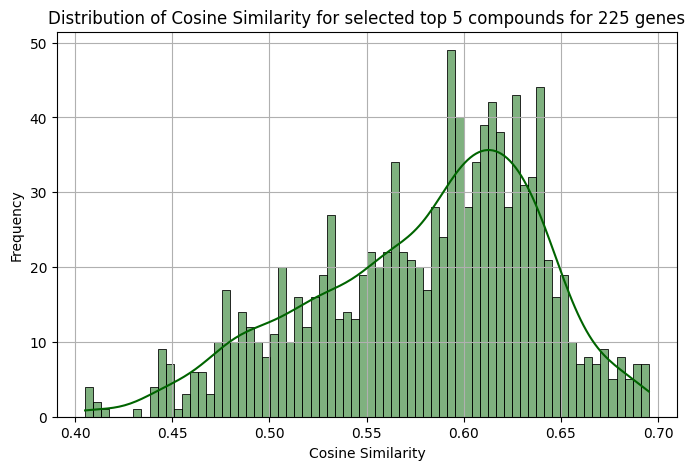

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with seaborn for a more polished histogram
plt.figure(figsize=(8, 5))
sns.histplot(final_df['cosine_distance'], bins=70, kde=True, color='darkgreen')  # KDE adds a density curve
plt.title('Distribution of Cosine Similarity for selected top 5 compounds for 225 genes')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
# plt.savefig("./figures/novelgenes_compounds_top5_similarity_nov4.png", dpi=1000)
plt.show()

In [83]:
final_df.dropna(inplace=True)
final_df

,gene_name,compound_name,rank,cosine_distance,embedding_file
0,ACACB,MARAVIROC,1,0.4780,CPD-int-GEN
1,ACACB,SITAXSENTAN,2,0.4780,CPD-int-GEN
2,ACACB,1-(9-ETHYL-9H-CARBAZOL-3-YL)-N-METHYLMETHANAMINE,3,0.4776,CPD-int-GEN
3,ACACB,CLAZOSENTAN,4,0.4773,CPD-int-GEN
4,ACACB,NQDI-1,5,0.4771,CPD-int-GEN
...,...,...,...,...,...
1119,BEND6,"2-[(2-CHLORO-4-IODOPHENYL)AMINO]-N-{[(2R)-2,3-...",5,0.6054,CPD-int-GEN-cdp-GEN
1120,CPED1,[(1S)-1-(5-CHLORO-1-BENZOTHIEN-3-YL)-2-(2-NAPH...,1,0.5984,CPD-int-GEN-cdp-GEN
1121,CPED1,MENADIONE,2,0.5652,CPD-int-GEN-cdp-GEN
1122,CPED1,PYRIDOSTIGMINE,3,0.5649,CPD-int-GEN-cdp-GEN


In [ ]:
final_df.to_csv("~/rnaseq_synapse/novelgenes_compounds_top5_nov4.csv")

Filtering by similarity threshold

In [2]:
import pandas as pd
df = pd.read_csv("~/rnaseq_synapse/novelgenes_compounds_top5_nov4.csv", index_col=0)
df

,gene_name,compound_name,rank,cosine_distance,embedding_file
0,ACACB,MARAVIROC,1,0.4780,CPD-int-GEN
1,ACACB,SITAXSENTAN,2,0.4780,CPD-int-GEN
2,ACACB,1-(9-ETHYL-9H-CARBAZOL-3-YL)-N-METHYLMETHANAMINE,3,0.4776,CPD-int-GEN
3,ACACB,CLAZOSENTAN,4,0.4773,CPD-int-GEN
4,ACACB,NQDI-1,5,0.4771,CPD-int-GEN
...,...,...,...,...,...
1119,BEND6,"2-[(2-CHLORO-4-IODOPHENYL)AMINO]-N-{[(2R)-2,3-...",5,0.6054,CPD-int-GEN-cdp-GEN
1120,CPED1,[(1S)-1-(5-CHLORO-1-BENZOTHIEN-3-YL)-2-(2-NAPH...,1,0.5984,CPD-int-GEN-cdp-GEN
1121,CPED1,MENADIONE,2,0.5652,CPD-int-GEN-cdp-GEN
1122,CPED1,PYRIDOSTIGMINE,3,0.5649,CPD-int-GEN-cdp-GEN


In [9]:
# Count the occurrences of each compound
compound_counts = df['compound_name'].value_counts()

# Filter for compounds that appear more than twice
compounds_more_than_two = compound_counts[compound_counts >= 2]

# Print the compounds and their counts
print(compounds_more_than_two)

compound_name
FLUOXETINE                                                   5
N-METHYL-N-[(1R)-1-METHYL-2-PHENYLETHYL]PROP-2-EN-1-AMINE    4
ALECTINIB                                                    4
ALPHA-NEU5AC                                                 3
LATRUNCULIN A                                                3
                                                            ..
HALOFANTRINE                                                 2
CID10649524                                                  2
THIAMYLAL                                                    2
SELEGILINE                                                   2
WEB 2086                                                     2
Name: count, Length: 135, dtype: int64


In [14]:
# Further filter for cosine similarity greater than 0.65
fil_df = df[df['cosine_distance'] >= 0.65]
fil_df

,gene_name,compound_name,rank,cosine_distance,embedding_file
285,CDH23,BROMAZEPAM,1,0.6759,CPD-int-GEN-ppi-GEN
286,CDH23,"5,7,2'-TRIHYDROXY-6,8-DIMETHOXYFLAVONE",2,0.6755,CPD-int-GEN-ppi-GEN
287,CDH23,CHEMBL456163,3,0.6754,CPD-int-GEN-ppi-GEN
288,CDH23,ALLOPREGNANOLONE,4,0.6740,CPD-int-GEN-ppi-GEN
289,CDH23,CLORAZEPATE,5,0.6738,CPD-int-GEN-ppi-GEN
...,...,...,...,...,...
1080,TSPAN12,BMSTBP,1,0.6858,CPD-int-GEN-cex-GEN
1081,TSPAN12,VITAMIN A,2,0.6841,CPD-int-GEN-cex-GEN
1082,TSPAN12,"3,6,9,12-TETRAOXAEICOSAN-1-OL",3,0.6839,CPD-int-GEN-cex-GEN
1083,TSPAN12,"2-(3-AMINO-2,5,6-TRIMETHOXYPHENYL)ETHYL 5-CHLO...",4,0.6826,CPD-int-GEN-cex-GEN


In [5]:
# Filter the DataFrame to get compounds with cosine similarity greater than 0.65
high_similarity_compounds = df[df['cosine_distance'] >= 0.65]['compound_name']

# Count occurrences and filter for compounds that appear more than once
compound_counts = df['compound_name'].value_counts()
repeated_compounds = compound_counts[compound_counts > 1].index


# Convert both filters to sets and find the intersection
high_similarity_set = set(high_similarity_compounds)
repeated_compounds_set = set(repeated_compounds)

# Intersection of both sets
intersection_compounds = high_similarity_set.intersection(repeated_compounds_set)

# Print the result
print("Compounds with high similarity > 0.65 and repeated more than once:")
print(intersection_compounds)
print(len(intersection_compounds))

Compounds with high similarity > 0.65 and repeated more than once:
{'TERT-BUTYL ALCOHOL', 'DISOPYRAMIDE', "7-METHYL-GUANOSINE-5'-TRIPHOSPHATE-5'-GUANOSINE", 'N-AMINOETHYLMORPHOLINE', 'N-METHYL-N-[(1R)-1-METHYL-2-PHENYLETHYL]PROP-2-EN-1-AMINE', 'N-OXO-2-[(4-PHENYLPHENYL)SULFONYLAMINO]ETHANAMIDE', 'MOLPORT-039-101-288', 'N-OXO-2-(PHENYLSULFONYLAMINO)ETHANAMIDE', 'OR073698', 'PYRANTEL', 'SCHEMBL15421446', 'NICARDIPINE', 'PROMETHAZINE', '(3R)-3-HYDROXYMYRISTATE', 'PAGOCLONE', '1-BENZYLIMIDAZOLE'}
16


In [6]:
for i in intersection_compounds:
    print(i)

TERT-BUTYL ALCOHOL
DISOPYRAMIDE
7-METHYL-GUANOSINE-5'-TRIPHOSPHATE-5'-GUANOSINE
N-AMINOETHYLMORPHOLINE
N-METHYL-N-[(1R)-1-METHYL-2-PHENYLETHYL]PROP-2-EN-1-AMINE
N-OXO-2-[(4-PHENYLPHENYL)SULFONYLAMINO]ETHANAMIDE
MOLPORT-039-101-288
N-OXO-2-(PHENYLSULFONYLAMINO)ETHANAMIDE
OR073698
PYRANTEL
SCHEMBL15421446
NICARDIPINE
PROMETHAZINE
(3R)-3-HYDROXYMYRISTATE
PAGOCLONE
1-BENZYLIMIDAZOLE


# Identification of Drug relations to other entities (Biotque)

In [ ]:
# Input is a list of drugs
# Different entities to be investigated

## 1. Test

In [11]:
compound_interest = {'TERT-BUTYL ALCOHOL', 'DISOPYRAMIDE', "7-METHYL-GUANOSINE-5'-TRIPHOSPHATE-5'-GUANOSINE", 'N-AMINOETHYLMORPHOLINE', 'N-METHYL-N-[(1R)-1-METHYL-2-PHENYLETHYL]PROP-2-EN-1-AMINE', 'N-OXO-2-[(4-PHENYLPHENYL)SULFONYLAMINO]ETHANAMIDE', 'MOLPORT-039-101-288', 'N-OXO-2-(PHENYLSULFONYLAMINO)ETHANAMIDE', 'OR073698', 'PYRANTEL', 'SCHEMBL15421446', 'NICARDIPINE', 'PROMETHAZINE', '(3R)-3-HYDROXYMYRISTATE', 'PAGOCLONE', '1-BENZYLIMIDAZOLE'}

In [21]:
import pandas as pd
embeddings = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD-trt-DIS/ctdchemdis/embeddings/dists.tsv', sep='\t')
compounds = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD.tsv', sep='\t')
genes = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/DIS.tsv', sep='\t')

In [22]:
embeddings.head(3)

,n1_CPD,n2_DIS,cosine_distance
0,AABLMOXKAOXTGJ-UHFFFAOYSA-N,DOID:0050013,0.2044
1,AABLMOXKAOXTGJ-UHFFFAOYSA-N,DOID:0050585,0.6693
2,AABLMOXKAOXTGJ-UHFFFAOYSA-N,DOID:0050659,0.3747


In [19]:
compounds.head(3)

,code,name,mw,ro5,qed,embedding_universe
0,AAAAZQPHATYWOK-JXMROGBWSA-N,CHEMBL175513,613.14,2.0,0.127,"(CLL-sns-CPD-sim-CPD,ctrpv2_sens-fp2d_CC);(CLL..."
1,AAABMNXUOFPYQK-GRMLSQNXSA-N,MYCALAMIDE B,517.62,1.0,0.237,"(CLL-sns-CPD-sim-CPD,nci60_sens-cc_sim);(CLL-s..."
2,AAABMNXUOFPYQK-WMBKCNCTSA-N,124512-46-5,NaN,NaN,NaN,"(CHE-has-CPD,chebi);(CLL-sns-CPD-sim-CPD,nci60..."


In [18]:
genes.head(3)

,code,name,ic_do,embedding_universe
0,DOID:0001816,angiosarcoma,0.751,"(CPD-cau-DIS,ctdchemdis);(CPD-trt-DIS,ctdchemd..."
1,DOID:0002116,pterygium,0.826,"(CPD-trt-DIS,ctdchemdis);(DIS-ass-GEN,ctddisea..."
2,DOID:0040001,shrimp allergy,0.826,"(DIS-ass-GEN,disgenet_curated);(DIS-ass-GEN,di..."


In [23]:
# Map compounds and genes to their names
embeddings = embeddings.merge(compounds, left_on='n1_CPD', right_on='code', how='left')
embeddings = embeddings.merge(genes, left_on='n2_DIS', right_on='code', how='left')
# Rename columns for clarity
embeddings.rename(columns={'name_x': 'compound_name', 'name_y': 'gene_name'}, inplace=True)
embeddings.head(3)

,n1_CPD,n2_DIS,cosine_distance,code_x,compound_name,mw,ro5,qed,embedding_universe_x,code_y,gene_name,ic_do,embedding_universe_y
0,AABLMOXKAOXTGJ-UHFFFAOYSA-N,DOID:0050013,0.2044,AABLMOXKAOXTGJ-UHFFFAOYSA-N,"4B,5,9B,10-TETRAHYDROINDENO[1,2-B]INDOLE",207.28,0.0,0.681,"(CPD-trt-DIS,ctdchemdis);(CLL-sns-CPD-sim-CPD,...",DOID:0050013,carbohydrate metabolism disease,0.570,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."
1,AABLMOXKAOXTGJ-UHFFFAOYSA-N,DOID:0050585,0.6693,AABLMOXKAOXTGJ-UHFFFAOYSA-N,"4B,5,9B,10-TETRAHYDROINDENO[1,2-B]INDOLE",207.28,0.0,0.681,"(CPD-trt-DIS,ctdchemdis);(CLL-sns-CPD-sim-CPD,...",DOID:0050585,congenital generalized lipodystrophy,0.826,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."
2,AABLMOXKAOXTGJ-UHFFFAOYSA-N,DOID:0050659,0.3747,AABLMOXKAOXTGJ-UHFFFAOYSA-N,"4B,5,9B,10-TETRAHYDROINDENO[1,2-B]INDOLE",207.28,0.0,0.681,"(CPD-trt-DIS,ctdchemdis);(CLL-sns-CPD-sim-CPD,...",DOID:0050659,biotin-responsive basal ganglia disease,1.000,"(CPD-trt-DIS,ctdchemdis);(DIS-ass-GEN,ctddisea..."


In [24]:
embeddings_filtered = embeddings[embeddings['compound_name'].isin(compound_interest)]
embeddings_filtered

,n1_CPD,n2_DIS,cosine_distance,code_x,compound_name,mw,ro5,qed,embedding_universe_x,code_y,gene_name,ic_do,embedding_universe_y
6838,BKJIXTWSNXCKJH-UHFFFAOYSA-N,DOID:0050771,0.6384,BKJIXTWSNXCKJH-UHFFFAOYSA-N,OR073698,400.53,0.0,0.324,"(CHE-has-CPD,chebi);(CLL-sns-CPD,drugcell);(CL...",DOID:0050771,pheochromocytoma,0.925,"(CPD-cau-DIS,ctdchemdis);(CPD-trt-DIS,ctdchemd..."
6839,BKJIXTWSNXCKJH-UHFFFAOYSA-N,DOID:0050773,0.6156,BKJIXTWSNXCKJH-UHFFFAOYSA-N,OR073698,400.53,0.0,0.324,"(CHE-has-CPD,chebi);(CLL-sns-CPD,drugcell);(CL...",DOID:0050773,paraganglioma,1.000,"(CPD-cau-DIS,ctdchemdis);(CPD-trt-DIS,ctdchemd..."
6840,BKJIXTWSNXCKJH-UHFFFAOYSA-N,DOID:0060100,0.5652,BKJIXTWSNXCKJH-UHFFFAOYSA-N,OR073698,400.53,0.0,0.324,"(CHE-has-CPD,chebi);(CLL-sns-CPD,drugcell);(CL...",DOID:0060100,musculoskeletal system cancer,0.389,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."
6841,BKJIXTWSNXCKJH-UHFFFAOYSA-N,DOID:1115,0.2594,BKJIXTWSNXCKJH-UHFFFAOYSA-N,OR073698,400.53,0.0,0.324,"(CHE-has-CPD,chebi);(CLL-sns-CPD,drugcell);(CL...",DOID:1115,sarcoma,0.460,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."
6842,BKJIXTWSNXCKJH-UHFFFAOYSA-N,DOID:11482,0.7076,BKJIXTWSNXCKJH-UHFFFAOYSA-N,OR073698,400.53,0.0,0.324,"(CHE-has-CPD,chebi);(CLL-sns-CPD,drugcell);(CL...",DOID:11482,hemopericardium,1.000,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123053,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,DOID:2348,0.6070,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,NICARDIPINE,479.53,0.0,0.320,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:2348,arteriosclerotic cardiovascular disease,0.806,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."
123054,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,DOID:2745,0.5271,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,NICARDIPINE,479.53,0.0,0.320,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:2745,narcissistic personality disorder,1.000,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."
123055,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,DOID:2841,0.5654,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,NICARDIPINE,479.53,0.0,0.320,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:2841,asthma,0.681,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."
123056,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,DOID:6000,0.5962,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,NICARDIPINE,479.53,0.0,0.320,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:6000,congestive heart failure,0.731,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."


In [27]:
# Rank compounds for each gene based on cosine similarity and select top 5
top_compounds = embeddings_filtered.groupby('compound_name').apply(
    lambda x: x.nlargest(5, 'cosine_distance')
).reset_index(drop=True)
top_compounds

/tmp/ipykernel_22134/646421327.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_compounds = embeddings_filtered.groupby('compound_name').apply(


,n1_CPD,n2_DIS,cosine_distance,code_x,compound_name,mw,ro5,qed,embedding_universe_x,code_y,gene_name,ic_do,embedding_universe_y
0,UVTNFZQICZKOEM-UHFFFAOYSA-N,DOID:12704,0.7005,UVTNFZQICZKOEM-UHFFFAOYSA-N,DISOPYRAMIDE,339.48,0.0,0.529,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:12704,ataxia telangiectasia,1.000,"(CPD-trt-DIS,ctdchemdis);(DIS-ass-GEN,ctddisea..."
1,UVTNFZQICZKOEM-UHFFFAOYSA-N,DOID:3720,0.7003,UVTNFZQICZKOEM-UHFFFAOYSA-N,DISOPYRAMIDE,339.48,0.0,0.529,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:3720,extramedullary plasmacytoma,1.000,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."
2,UVTNFZQICZKOEM-UHFFFAOYSA-N,DOID:0080299,0.6976,UVTNFZQICZKOEM-UHFFFAOYSA-N,DISOPYRAMIDE,339.48,0.0,0.529,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:0080299,partial lipodystrophy,0.775,"(CPD-trt-DIS,ctdchemdis);(DIS-ass-GEN,ctddisea..."
3,UVTNFZQICZKOEM-UHFFFAOYSA-N,DOID:0110273,0.6959,UVTNFZQICZKOEM-UHFFFAOYSA-N,DISOPYRAMIDE,339.48,0.0,0.529,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:0110273,autosomal dominant limb-girdle muscular dystrophy,0.826,"(CPD-cau-DIS,ctdchemdis);(CPD-trt-DIS,ctdchemd..."
4,UVTNFZQICZKOEM-UHFFFAOYSA-N,DOID:0110276,0.6903,UVTNFZQICZKOEM-UHFFFAOYSA-N,DISOPYRAMIDE,339.48,0.0,0.529,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:0110276,autosomal recessive limb-girdle muscular dystr...,1.000,"(CPD-cau-DIS,ctdchemdis);(CPD-trt-DIS,ctdchemd..."
5,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,DOID:0050828,0.6183,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,NICARDIPINE,479.53,0.0,0.320,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:0050828,artery disease,0.480,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."
6,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,DOID:0111151,0.6179,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,NICARDIPINE,479.53,0.0,0.320,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:0111151,Prinzmetal angina,1.000,"(CPD-cau-DIS,ctdchemdis);(CPD-trt-DIS,ctdchemd..."
7,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,DOID:0090019,0.6158,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,NICARDIPINE,479.53,0.0,0.320,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:0090019,sitosterolemia,1.000,"(CPD-cau-DIS,ctdchemdis);(CPD-trt-DIS,ctdchemd..."
8,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,DOID:1936,0.6118,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,NICARDIPINE,479.53,0.0,0.320,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:1936,atherosclerosis,0.826,"(CPD-cau-DIS,ctdchemdis);(CPD-cau-DIS,offsides..."
9,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,DOID:11088,0.6100,ZBBHBTPTTSWHBA-UHFFFAOYSA-N,NICARDIPINE,479.53,0.0,0.320,"(CHE-has-CPD,chebi);(CPD-cau-DIS,ctdchemdis);(...",DOID:11088,asphyxia neonatorum,1.000,"(CPD-trt-DIS,ctdchemdis);(DIS-ass-GEN,ctddisea..."


In [ ]:
top_compounds['rank'] = top_compounds.groupby('compound_name').cumcount() + 1
top_compounds['embedding_file'] = 'CPD-trt-DIS-ctdchemdis'  # Add a constant column with the same value

# Select and order the final columns
x = 'gene_name'
final_df = top_compounds[[x, 'compound_name', 'rank', 'cosine_distance', 'embedding_file']]
final_df

## 2. Diseases

In [54]:
import pandas as pd

# Define the entities of interest
entity_interest = {'TERT-BUTYL ALCOHOL', 'DISOPYRAMIDE', "7-METHYL-GUANOSINE-5'-TRIPHOSPHATE-5'-GUANOSINE", 'N-AMINOETHYLMORPHOLINE', 'N-METHYL-N-[(1R)-1-METHYL-2-PHENYLETHYL]PROP-2-EN-1-AMINE', 'N-OXO-2-[(4-PHENYLPHENYL)SULFONYLAMINO]ETHANAMIDE', 'MOLPORT-039-101-288', 'N-OXO-2-(PHENYLSULFONYLAMINO)ETHANAMIDE', 'OR073698', 'PYRANTEL', 'SCHEMBL15421446', 'NICARDIPINE', 'PROMETHAZINE', '(3R)-3-HYDROXYMYRISTATE', 'PAGOCLONE', '1-BENZYLIMIDAZOLE'}
target_type = 'disease'  # This can be 'gene' or 'disease' or any other entity
target_file = '/home/vmottaqi/rnaseq_synapse/Bioteque/DIS.tsv'  # Path to the target entity file

# Load data
embeddings = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD-trt-DIS/ctdchemdis/embeddings/dists.tsv', sep='\t')
compounds = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD.tsv', sep='\t')
targets = pd.read_csv(target_file, sep='\t')

# Map compounds and targets to their names
embeddings = embeddings.merge(compounds, left_on='n1_CPD', right_on='code', how='left')
embeddings = embeddings.merge(targets, left_on='n2_DIS', right_on='code', how='left')

# Rename columns for clarity
embeddings.rename(columns={'name_x': 'compound_name', 'name_y': f'{target_type}_name'}, inplace=True)

# Filter embeddings to only include items of interest
embeddings_filtered = embeddings[embeddings['compound_name'].isin(entity_interest)]

# Rank compounds for each target based on cosine similarity and select top 5
top_entities = embeddings_filtered.groupby('compound_name').apply(
    lambda x: x.nlargest(5, 'cosine_distance')
).reset_index(drop=True)

# Add a rank column
top_entities['rank'] = top_entities.groupby('compound_name').cumcount() + 1
top_entities['embedding_file'] = 'CPD-trt-DIS-ctdchemdis'  # Add a constant column with the same value

# Select and order the final columns
df1 = top_entities[['compound_name', f'{target_type}_name', 'rank', 'cosine_distance', 'embedding_file']]

# Display the DataFrame
df1


/tmp/ipykernel_22134/1444394981.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_entities = embeddings_filtered.groupby('compound_name').apply(


,compound_name,disease_name,rank,cosine_distance,embedding_file
0,DISOPYRAMIDE,ataxia telangiectasia,1,0.7005,CPD-trt-DIS-ctdchemdis
1,DISOPYRAMIDE,extramedullary plasmacytoma,2,0.7003,CPD-trt-DIS-ctdchemdis
2,DISOPYRAMIDE,partial lipodystrophy,3,0.6976,CPD-trt-DIS-ctdchemdis
3,DISOPYRAMIDE,autosomal dominant limb-girdle muscular dystrophy,4,0.6959,CPD-trt-DIS-ctdchemdis
4,DISOPYRAMIDE,autosomal recessive limb-girdle muscular dystr...,5,0.6903,CPD-trt-DIS-ctdchemdis
5,NICARDIPINE,artery disease,1,0.6183,CPD-trt-DIS-ctdchemdis
6,NICARDIPINE,Prinzmetal angina,2,0.6179,CPD-trt-DIS-ctdchemdis
7,NICARDIPINE,sitosterolemia,3,0.6158,CPD-trt-DIS-ctdchemdis
8,NICARDIPINE,atherosclerosis,4,0.6118,CPD-trt-DIS-ctdchemdis
9,NICARDIPINE,asphyxia neonatorum,5,0.6100,CPD-trt-DIS-ctdchemdis


In [ ]:
# Concatenate rows
combined_df = pd.concat([df1, df2], ignore_index=True)

# Display the combined DataFrame
print(combined_df.head())

In [32]:
# Get the unique number of values in each of the first two columns
unique_diseases = final_df.iloc[:, 0].nunique()
unique_compounds = final_df.iloc[:, 1].nunique()

# Display the unique counts
print(f"Unique values in {final_df.columns[0]}: {unique_diseases}")
print(f"Unique values in {final_df.columns[1]}: {unique_compounds}")

# Check for values repeated more than once in the second column (compound_name)
repeated_compounds = final_df.iloc[:, 1].value_counts()
repeated_compounds = repeated_compounds[repeated_compounds > 1]

# Display if there are repeated compounds and their counts
if not repeated_compounds.empty:
    print("Diseases repeated more than once and their counts:")
    print(repeated_compounds)
else:
    print("No Diseases are repeated more than once.")

Unique values in compound_name: 4
Unique values in disease_name: 20
No Diseases are repeated more than once.


In [55]:
df1.to_csv("/home/vmottaqi/rnaseq_synapse/interestcompounds_disease_nov5.csv")

## 2. Pathways

In [56]:
import pandas as pd

# Define the entities of interest
entity_interest = {'TERT-BUTYL ALCOHOL', 'DISOPYRAMIDE', "7-METHYL-GUANOSINE-5'-TRIPHOSPHATE-5'-GUANOSINE", 'N-AMINOETHYLMORPHOLINE', 'N-METHYL-N-[(1R)-1-METHYL-2-PHENYLETHYL]PROP-2-EN-1-AMINE', 'N-OXO-2-[(4-PHENYLPHENYL)SULFONYLAMINO]ETHANAMIDE', 'MOLPORT-039-101-288', 'N-OXO-2-(PHENYLSULFONYLAMINO)ETHANAMIDE', 'OR073698', 'PYRANTEL', 'SCHEMBL15421446', 'NICARDIPINE', 'PROMETHAZINE', '(3R)-3-HYDROXYMYRISTATE', 'PAGOCLONE', '1-BENZYLIMIDAZOLE'}
target_type = 'pathway'  # This can be 'gene' or 'disease' or any other entity
target_file = '/home/vmottaqi/rnaseq_synapse/Bioteque/PWY.tsv'  # Path to the target entity file

# Load data
embeddings = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD-int-GEN-ass-PWY/embeddings/dists.tsv', sep='\t')
compounds = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD.tsv', sep='\t')
targets = pd.read_csv(target_file, sep='\t')

# Map compounds and targets to their names
embeddings = embeddings.merge(compounds, left_on='n1_CPD', right_on='code', how='left')
embeddings = embeddings.merge(targets, left_on='n2_PWY', right_on='code', how='left')

# Rename columns for clarity
embeddings.rename(columns={'name_x': 'compound_name', 'name_y': f'{target_type}_name'}, inplace=True)

# Filter embeddings to only include items of interest
embeddings_filtered = embeddings[embeddings['compound_name'].isin(entity_interest)]

# Rank compounds for each target based on cosine similarity and select top 5
top_entities = embeddings_filtered.groupby('compound_name').apply(
    lambda x: x.nlargest(5, 'cosine_distance')
).reset_index(drop=True)

# Add a rank column
top_entities['rank'] = top_entities.groupby('compound_name').cumcount() + 1
top_entities['embedding_file'] = 'CPD-int-GEN-ass-PWY'  # Add a constant column with the same value

# Select and order the final columns
df1 = top_entities[['compound_name', f'{target_type}_name', 'rank', 'cosine_distance', 'embedding_file']]

# Display the DataFrame
df1


/tmp/ipykernel_22134/1770587587.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_entities = embeddings_filtered.groupby('compound_name').apply(


,compound_name,pathway_name,rank,cosine_distance,embedding_file
0,(3R)-3-HYDROXYMYRISTATE,NOTCH2 intracellular domain regulates transcri...,1,0.6603,CPD-int-GEN-ass-PWY
1,(3R)-3-HYDROXYMYRISTATE,Nectin/Necl trans heterodimerization,2,0.6352,CPD-int-GEN-ass-PWY
2,(3R)-3-HYDROXYMYRISTATE,2-LTR circle formation,3,0.6040,CPD-int-GEN-ass-PWY
3,(3R)-3-HYDROXYMYRISTATE,TRAF3-dependent IRF activation pathway,4,0.5945,CPD-int-GEN-ass-PWY
4,(3R)-3-HYDROXYMYRISTATE,Negative regulators of DDX58/IFIH1 signaling,5,0.5844,CPD-int-GEN-ass-PWY
...,...,...,...,...,...
75,TERT-BUTYL ALCOHOL,Virus Assembly and Release,1,0.6328,CPD-int-GEN-ass-PWY
76,TERT-BUTYL ALCOHOL,Glycogen metabolism,2,0.6159,CPD-int-GEN-ass-PWY
77,TERT-BUTYL ALCOHOL,Glycogen breakdown (glycogenolysis),3,0.5867,CPD-int-GEN-ass-PWY
78,TERT-BUTYL ALCOHOL,Striated Muscle Contraction,4,0.5845,CPD-int-GEN-ass-PWY


In [57]:
# Get the unique number of values in each of the first two columns
unique_diseases = df1.iloc[:, 0].nunique()
unique_compounds = df1.iloc[:, 1].nunique()

# Display the unique counts
print(f"Unique values in {df1.columns[0]}: {unique_diseases}")
print(f"Unique values in {df1.columns[1]}: {unique_compounds}")

# Check for values repeated more than once in the second column (compound_name)
repeated_compounds = df1.iloc[:, 1].value_counts()
repeated_compounds = repeated_compounds[repeated_compounds > 1]

# Display if there are repeated compounds and their counts
if not repeated_compounds.empty:
    print("pathways repeated more than once and their counts:")
    print(repeated_compounds)
else:
    print("No pathways are repeated more than once.")

Unique values in compound_name: 16
Unique values in pathway_name: 70
pathways repeated more than once and their counts:
pathway_name
Striated Muscle Contraction                 4
Glycogen breakdown (glycogenolysis)         3
Elastic fibre formation                     2
HuR (ELAVL1) binds and stabilizes mRNA      2
Protein methylation                         2
Molecules associated with elastic fibres    2
RHO GTPases activate PAKs                   2
Name: count, dtype: int64


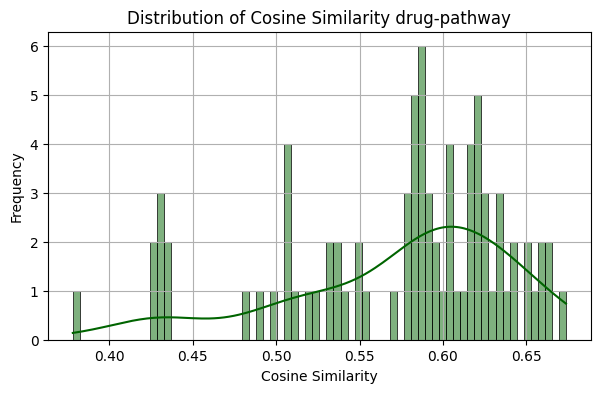

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with seaborn for a more polished histogram
plt.figure(figsize=(7, 4))
sns.histplot(df1['cosine_distance'], bins=70, kde=True, color='darkgreen')  # KDE adds a density curve
plt.title('Distribution of Cosine Similarity drug-pathway')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
# plt.savefig("./figures/novelgenes_compounds_top5_similarity_nov4.png", dpi=1000)
plt.show()

In [58]:
df1.to_csv("/home/vmottaqi/rnaseq_synapse/interestcompounds_pathways_nov5.csv")

## 3. Tissues

In [59]:
import pandas as pd

# Define the entities of interest
entity_interest = {'TERT-BUTYL ALCOHOL', 'DISOPYRAMIDE', "7-METHYL-GUANOSINE-5'-TRIPHOSPHATE-5'-GUANOSINE", 'N-AMINOETHYLMORPHOLINE', 'N-METHYL-N-[(1R)-1-METHYL-2-PHENYLETHYL]PROP-2-EN-1-AMINE', 'N-OXO-2-[(4-PHENYLPHENYL)SULFONYLAMINO]ETHANAMIDE', 'MOLPORT-039-101-288', 'N-OXO-2-(PHENYLSULFONYLAMINO)ETHANAMIDE', 'OR073698', 'PYRANTEL', 'SCHEMBL15421446', 'NICARDIPINE', 'PROMETHAZINE', '(3R)-3-HYDROXYMYRISTATE', 'PAGOCLONE', '1-BENZYLIMIDAZOLE'}
target_type = 'tissue'  # This can be 'gene' or 'disease' or any other entity
target_file = '/home/vmottaqi/rnaseq_synapse/Bioteque/TIS.tsv'  # Path to the target entity file

# Load data
embeddings = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD-int-GEN-ass-TIS/embeddings/dists.tsv', sep='\t')
compounds = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD.tsv', sep='\t')
targets = pd.read_csv(target_file, sep='\t')

# Map compounds and targets to their names
embeddings = embeddings.merge(compounds, left_on='n1_CPD', right_on='code', how='left')
embeddings = embeddings.merge(targets, left_on='n2_TIS', right_on='code', how='left')

# Rename columns for clarity
embeddings.rename(columns={'name_x': 'compound_name', 'name_y': f'{target_type}_name'}, inplace=True)

# Filter embeddings to only include items of interest
embeddings_filtered = embeddings[embeddings['compound_name'].isin(entity_interest)]

# Rank compounds for each target based on cosine similarity and select top 5
top_entities = embeddings_filtered.groupby('compound_name').apply(
    lambda x: x.nlargest(5, 'cosine_distance')
).reset_index(drop=True)

# Add a rank column
top_entities['rank'] = top_entities.groupby('compound_name').cumcount() + 1
top_entities['embedding_file'] = 'CPD-int-GEN-ass-PWY'  # Add a constant column with the same value

# Select and order the final columns
df1 = top_entities[['compound_name', f'{target_type}_name', 'rank', 'cosine_distance', 'embedding_file']]

# Display the DataFrame
df1


/tmp/ipykernel_22134/850696307.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_entities = embeddings_filtered.groupby('compound_name').apply(


,compound_name,tissue_name,rank,cosine_distance,embedding_file
0,(3R)-3-HYDROXYMYRISTATE,hair,1,0.6786,CPD-int-GEN-ass-PWY
1,(3R)-3-HYDROXYMYRISTATE,hair root,2,0.6755,CPD-int-GEN-ass-PWY
2,(3R)-3-HYDROXYMYRISTATE,scalp,3,0.6708,CPD-int-GEN-ass-PWY
3,(3R)-3-HYDROXYMYRISTATE,marrow cell,4,0.4478,CPD-int-GEN-ass-PWY
4,(3R)-3-HYDROXYMYRISTATE,mononuclear cell,5,0.4015,CPD-int-GEN-ass-PWY
...,...,...,...,...,...
60,SCHEMBL15421446,artery,4,0.3886,CPD-int-GEN-ass-PWY
61,SCHEMBL15421446,aorta,5,0.3783,CPD-int-GEN-ass-PWY
62,TERT-BUTYL ALCOHOL,T-lymphocyte,1,0.5990,CPD-int-GEN-ass-PWY
63,TERT-BUTYL ALCOHOL,interstitial cell of Cajal,2,0.5769,CPD-int-GEN-ass-PWY


In [60]:
# Get the unique number of values in each of the first two columns
unique_diseases = df1.iloc[:, 0].nunique()
unique_compounds = df1.iloc[:, 1].nunique()

# Display the unique counts
print(f"Unique values in {df1.columns[0]}: {unique_diseases}")
print(f"Unique values in {df1.columns[1]}: {unique_compounds}")

# Check for values repeated more than once in the second column (compound_name)
repeated_compounds = df1.iloc[:, 1].value_counts()
repeated_compounds = repeated_compounds[repeated_compounds > 1]

# Display if there are repeated compounds and their counts
if not repeated_compounds.empty:
    print("tissues repeated more than once and their counts:")
    print(repeated_compounds)
else:
    print("No tissues are repeated more than once.")

Unique values in compound_name: 16
Unique values in tissue_name: 58
tissues repeated more than once and their counts:
tissue_name
coronary artery      2
tooth                2
odontoblast          2
esophagus            2
interstitial cell    2
jejunum              2
dental pulp          2
Name: count, dtype: int64


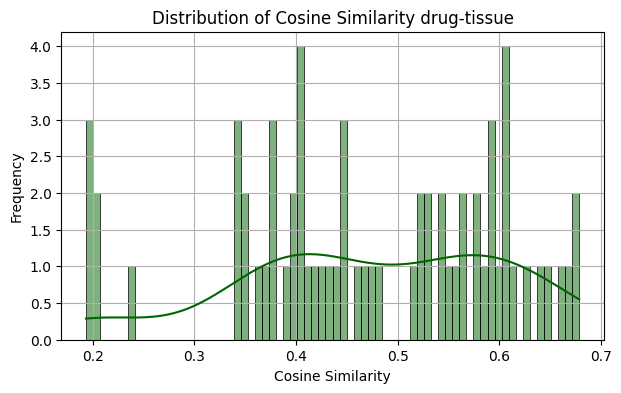

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with seaborn for a more polished histogram
plt.figure(figsize=(7, 4))
sns.histplot(df1['cosine_distance'], bins=70, kde=True, color='darkgreen')  # KDE adds a density curve
plt.title('Distribution of Cosine Similarity drug-tissue')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
# plt.savefig("./figures/novelgenes_compounds_top5_similarity_nov4.png", dpi=1000)
plt.show()

In [61]:
df1.to_csv("/home/vmottaqi/rnaseq_synapse/interestcompounds_tissues_nov5.csv")

## 4. Molecular Function

In [62]:
import pandas as pd

# Define the entities of interest
entity_interest = {'TERT-BUTYL ALCOHOL', 'DISOPYRAMIDE', "7-METHYL-GUANOSINE-5'-TRIPHOSPHATE-5'-GUANOSINE", 'N-AMINOETHYLMORPHOLINE', 'N-METHYL-N-[(1R)-1-METHYL-2-PHENYLETHYL]PROP-2-EN-1-AMINE', 'N-OXO-2-[(4-PHENYLPHENYL)SULFONYLAMINO]ETHANAMIDE', 'MOLPORT-039-101-288', 'N-OXO-2-(PHENYLSULFONYLAMINO)ETHANAMIDE', 'OR073698', 'PYRANTEL', 'SCHEMBL15421446', 'NICARDIPINE', 'PROMETHAZINE', '(3R)-3-HYDROXYMYRISTATE', 'PAGOCLONE', '1-BENZYLIMIDAZOLE'}
target_type = 'molecular function'  # This can be 'gene' or 'disease' or any other entity
target_file = '/home/vmottaqi/rnaseq_synapse/Bioteque/MFN.tsv'  # Path to the target entity file

# Load data
embeddings = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD-int-GEN-has-MFN/embeddings/dists.tsv', sep='\t')
compounds = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD.tsv', sep='\t')
targets = pd.read_csv(target_file, sep='\t')

# Map compounds and targets to their names
embeddings = embeddings.merge(compounds, left_on='n1_CPD', right_on='code', how='left')
embeddings = embeddings.merge(targets, left_on='n2_MFN', right_on='code', how='left')

# Rename columns for clarity
embeddings.rename(columns={'name_x': 'compound_name', 'name_y': f'{target_type}_name'}, inplace=True)

# Filter embeddings to only include items of interest
embeddings_filtered = embeddings[embeddings['compound_name'].isin(entity_interest)]

# Rank compounds for each target based on cosine similarity and select top 5
top_entities = embeddings_filtered.groupby('compound_name').apply(
    lambda x: x.nlargest(5, 'cosine_distance')
).reset_index(drop=True)

# Add a rank column
top_entities['rank'] = top_entities.groupby('compound_name').cumcount() + 1
top_entities['embedding_file'] = 'CPD-int-GEN-has-MFN'  # Add a constant column with the same value

# Select and order the final columns
df1 = top_entities[['compound_name', f'{target_type}_name', 'rank', 'cosine_distance', 'embedding_file']]

# Display the DataFrame
df1


/tmp/ipykernel_22134/719978681.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_entities = embeddings_filtered.groupby('compound_name').apply(


,compound_name,molecular function_name,rank,cosine_distance,embedding_file
0,(3R)-3-HYDROXYMYRISTATE,cyclase regulator activity,1,0.6323,CPD-int-GEN-has-MFN
1,(3R)-3-HYDROXYMYRISTATE,protein-lipid complex binding,2,0.6011,CPD-int-GEN-has-MFN
2,(3R)-3-HYDROXYMYRISTATE,low-density lipoprotein particle binding,3,0.6008,CPD-int-GEN-has-MFN
3,(3R)-3-HYDROXYMYRISTATE,lipoprotein particle binding,4,0.6003,CPD-int-GEN-has-MFN
4,(3R)-3-HYDROXYMYRISTATE,unmethylated CpG binding,5,0.5859,CPD-int-GEN-has-MFN
...,...,...,...,...,...
75,TERT-BUTYL ALCOHOL,cell adhesive protein binding involved in bund...,1,0.6548,CPD-int-GEN-has-MFN
76,TERT-BUTYL ALCOHOL,Ral GTPase binding,2,0.6511,CPD-int-GEN-has-MFN
77,TERT-BUTYL ALCOHOL,oxidative DNA demethylase activity,3,0.6388,CPD-int-GEN-has-MFN
78,TERT-BUTYL ALCOHOL,miRNA binding,4,0.6342,CPD-int-GEN-has-MFN


In [47]:
# Get the unique number of values in each of the first two columns
unique_diseases = df1.iloc[:, 0].nunique()
unique_compounds = df1.iloc[:, 1].nunique()

# Display the unique counts
print(f"Unique values in {df1.columns[0]}: {unique_diseases}")
print(f"Unique values in {df1.columns[1]}: {unique_compounds}")

# Check for values repeated more than once in the second column (compound_name)
repeated_compounds = df1.iloc[:, 1].value_counts()
repeated_compounds = repeated_compounds[repeated_compounds > 1]

# Display if there are repeated compounds and their counts
if not repeated_compounds.empty:
    print("MFN repeated more than once and their counts:")
    print(repeated_compounds)
else:
    print("MFN tissues are repeated more than once.")

Unique values in compound_name: 16
Unique values in molecular function_name: 72
MFN repeated more than once and their counts:
molecular function_name
hydrolase activity, acting on acid phosphorus-nitrogen bonds                       2
myosin binding                                                                     2
extracellular matrix constituent conferring elasticity                             2
structural molecule activity conferring elasticity                                 2
calcium-dependent protein serine/threonine phosphatase regulator activity          2
calcium-dependent protein kinase inhibitor activity                                2
RNA polymerase II transcription regulatory region sequence-specific DNA binding    2
serine-type endopeptidase activity                                                 2
Name: count, dtype: int64


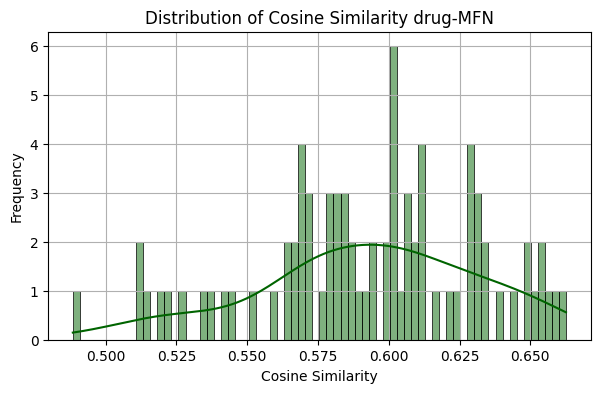

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with seaborn for a more polished histogram
plt.figure(figsize=(7, 4))
sns.histplot(df1['cosine_distance'], bins=70, kde=True, color='darkgreen')  # KDE adds a density curve
plt.title('Distribution of Cosine Similarity drug-MFN')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
# plt.savefig("./figures/novelgenes_compounds_top5_similarity_nov4.png", dpi=1000)
plt.show()

In [63]:
df1.to_csv("/home/vmottaqi/rnaseq_synapse/interestcompounds_MFN_nov5.csv")

## 6. Cellular compartment

In [65]:
import pandas as pd

# Define the entities of interest
entity_interest = {'TERT-BUTYL ALCOHOL', 'DISOPYRAMIDE', "7-METHYL-GUANOSINE-5'-TRIPHOSPHATE-5'-GUANOSINE", 'N-AMINOETHYLMORPHOLINE', 'N-METHYL-N-[(1R)-1-METHYL-2-PHENYLETHYL]PROP-2-EN-1-AMINE', 'N-OXO-2-[(4-PHENYLPHENYL)SULFONYLAMINO]ETHANAMIDE', 'MOLPORT-039-101-288', 'N-OXO-2-(PHENYLSULFONYLAMINO)ETHANAMIDE', 'OR073698', 'PYRANTEL', 'SCHEMBL15421446', 'NICARDIPINE', 'PROMETHAZINE', '(3R)-3-HYDROXYMYRISTATE', 'PAGOCLONE', '1-BENZYLIMIDAZOLE'}
target_type = 'Cellular compartments'  # This can be 'gene' or 'disease' or any other entity
target_file = '/home/vmottaqi/rnaseq_synapse/Bioteque/CMP.tsv'  # Path to the target entity file

# Load data
embeddings = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD-int-GEN-has-CMP/embeddings/dists.tsv', sep='\t')
compounds = pd.read_csv('/home/vmottaqi/rnaseq_synapse/Bioteque/CPD.tsv', sep='\t')
targets = pd.read_csv(target_file, sep='\t')

# Map compounds and targets to their names
embeddings = embeddings.merge(compounds, left_on='n2_CPD', right_on='code', how='left')
embeddings = embeddings.merge(targets, left_on='n1_CMP', right_on='code', how='left')

# Rename columns for clarity
embeddings.rename(columns={'name_x': 'compound_name', 'name_y': f'{target_type}_name'}, inplace=True)

# Filter embeddings to only include items of interest
embeddings_filtered = embeddings[embeddings['compound_name'].isin(entity_interest)]

# Rank compounds for each target based on cosine similarity and select top 5
top_entities = embeddings_filtered.groupby('compound_name').apply(
    lambda x: x.nlargest(5, 'cosine_distance')
).reset_index(drop=True)

# Add a rank column
top_entities['rank'] = top_entities.groupby('compound_name').cumcount() + 1
top_entities['embedding_file'] = 'CPD-int-GEN-has-CMP'  # Add a constant column with the same value

# Select and order the final columns
df1 = top_entities[['compound_name', f'{target_type}_name', 'rank', 'cosine_distance', 'embedding_file']]

# Display the DataFrame
df1


/tmp/ipykernel_22134/3620065931.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_entities = embeddings_filtered.groupby('compound_name').apply(


,compound_name,Cellular compartments_name,rank,cosine_distance,embedding_file
0,(3R)-3-HYDROXYMYRISTATE,serine-pyruvate aminotransferase complex,1,0.6537,CPD-int-GEN-has-CMP
1,(3R)-3-HYDROXYMYRISTATE,early phagosome,2,0.6322,CPD-int-GEN-has-CMP
2,(3R)-3-HYDROXYMYRISTATE,ATF4-CREB1 transcription factor complex,3,0.6188,CPD-int-GEN-has-CMP
3,(3R)-3-HYDROXYMYRISTATE,Weibel-Palade body,4,0.6150,CPD-int-GEN-has-CMP
4,(3R)-3-HYDROXYMYRISTATE,intrinsic component of endosome membrane,5,0.6134,CPD-int-GEN-has-CMP
...,...,...,...,...,...
75,TERT-BUTYL ALCOHOL,U2-type catalytic step 2 spliceosome,1,0.6744,CPD-int-GEN-has-CMP
76,TERT-BUTYL ALCOHOL,cardiac Troponin complex,2,0.6727,CPD-int-GEN-has-CMP
77,TERT-BUTYL ALCOHOL,gamma-tubulin complex,3,0.6395,CPD-int-GEN-has-CMP
78,TERT-BUTYL ALCOHOL,spindle,4,0.5931,CPD-int-GEN-has-CMP


In [66]:
# Get the unique number of values in each of the first two columns
unique_diseases = df1.iloc[:, 0].nunique()
unique_compounds = df1.iloc[:, 1].nunique()

# Display the unique counts
print(f"Unique values in {df1.columns[0]}: {unique_diseases}")
print(f"Unique values in {df1.columns[1]}: {unique_compounds}")

# Check for values repeated more than once in the second column (compound_name)
repeated_compounds = df1.iloc[:, 1].value_counts()
repeated_compounds = repeated_compounds[repeated_compounds > 1]

# Display if there are repeated compounds and their counts
if not repeated_compounds.empty:
    print("CMP repeated more than once and their counts:")
    print(repeated_compounds)
else:
    print("CMP tissues are repeated more than once.")

Unique values in compound_name: 16
Unique values in Cellular compartments_name: 71
CMP repeated more than once and their counts:
Cellular compartments_name
U2-type catalytic step 2 spliceosome            3
cytoplasmic vesicle                             2
integral component of postsynaptic membrane     2
intrinsic component of postsynaptic membrane    2
integral component of synaptic membrane         2
intrinsic component of synaptic membrane        2
cholinergic synapse                             2
cardiac Troponin complex                        2
Name: count, dtype: int64


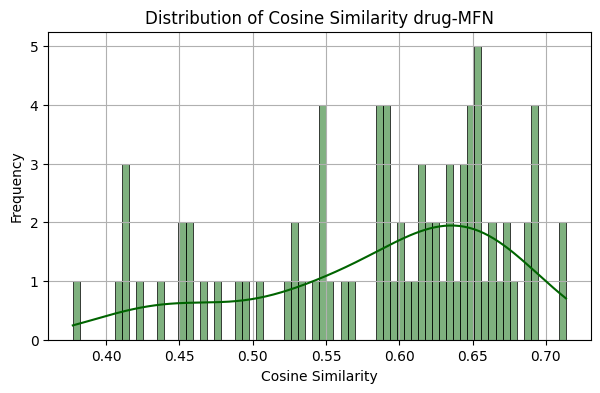

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with seaborn for a more polished histogram
plt.figure(figsize=(7, 4))
sns.histplot(df1['cosine_distance'], bins=70, kde=True, color='darkgreen')  # KDE adds a density curve
plt.title('Distribution of Cosine Similarity drug-MFN')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
# plt.savefig("./figures/novelgenes_compounds_top5_similarity_nov4.png", dpi=1000)
plt.show()

In [ ]:
df1.to_csv("/home/vmottaqi/rnaseq_synapse/interestcompounds_CMP_nov5.csv")